In [1]:
import pandas as pd

In [2]:
from platform import python_version

print(python_version())

3.8.8


In [3]:
conda list freetype

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
freetype                  2.10.4               hd328e21_0  

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('bank-direct-marketing.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
print(df.shape)

(41188, 21)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib as plt
from matplotlib.pyplot import figure
import numpy as np

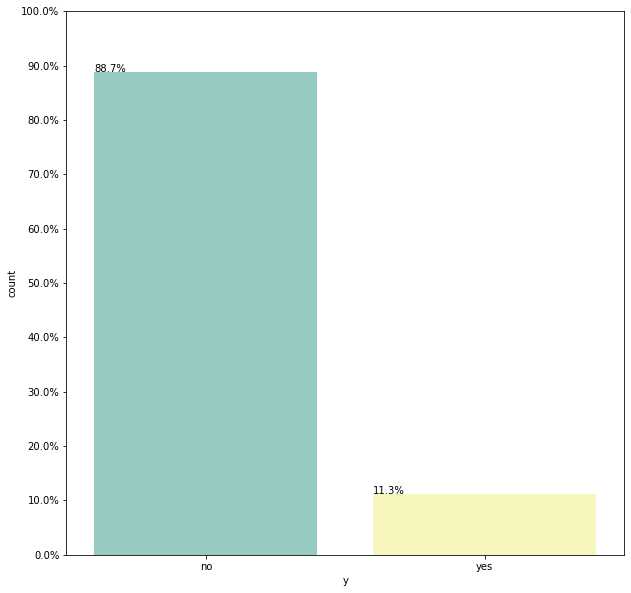

In [11]:
figure(figsize=(10,10))
total=len(df['y'])
plot = sns.countplot(x="y",data=df,palette="Set3")
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.pyplot.show()

In [12]:
plt.pyplot.show()

In [13]:
def countplot_columns(columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=df)
    total=len(df['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()

In [14]:
def countplot_target_varaible(columns,classes):
    figure(figsize=(15,10))
    total=len(df[classes])
    plot=sns.countplot(x=columns,data=df,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()

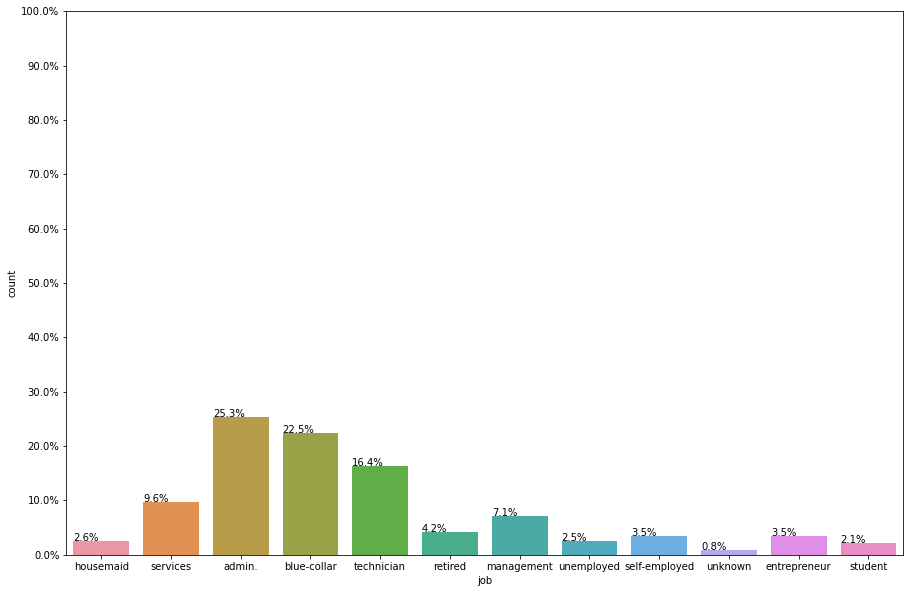

In [15]:
countplot_columns('job')

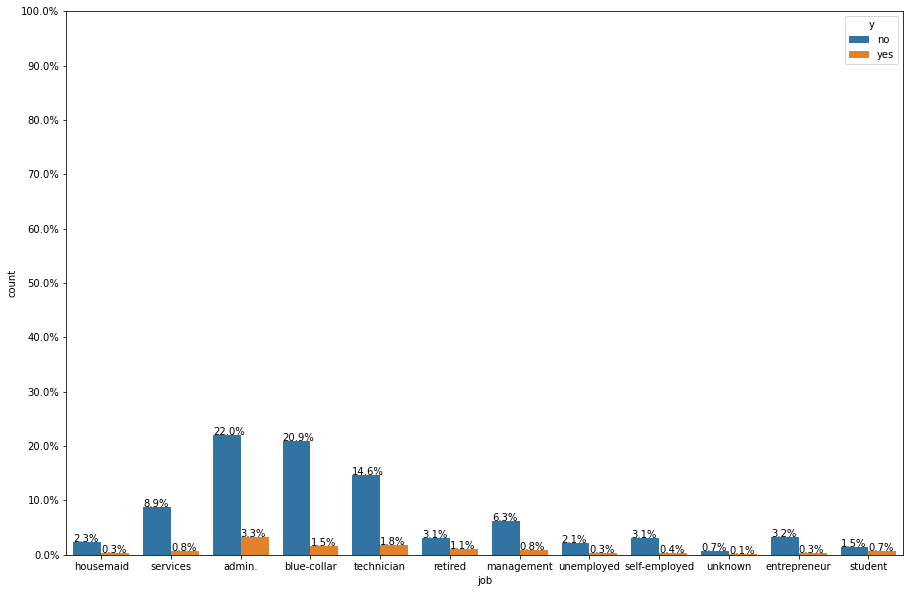

In [16]:
countplot_target_varaible('job','y')

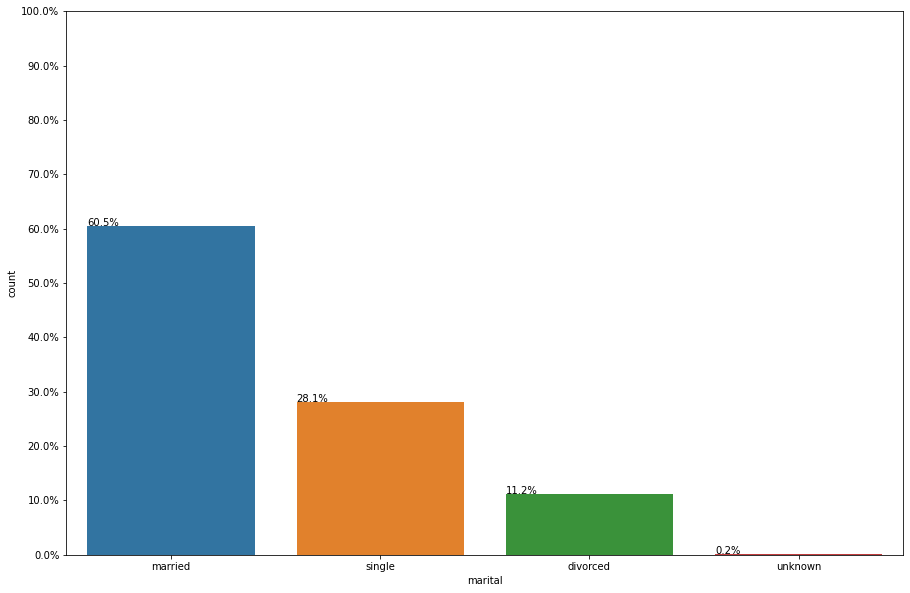

In [17]:
countplot_columns('marital')

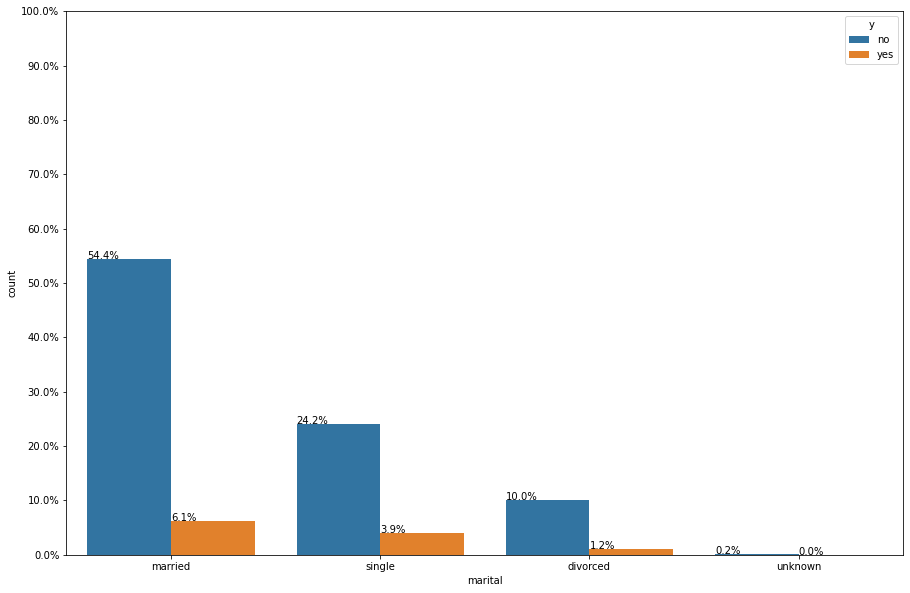

In [18]:
countplot_target_varaible('marital','y')

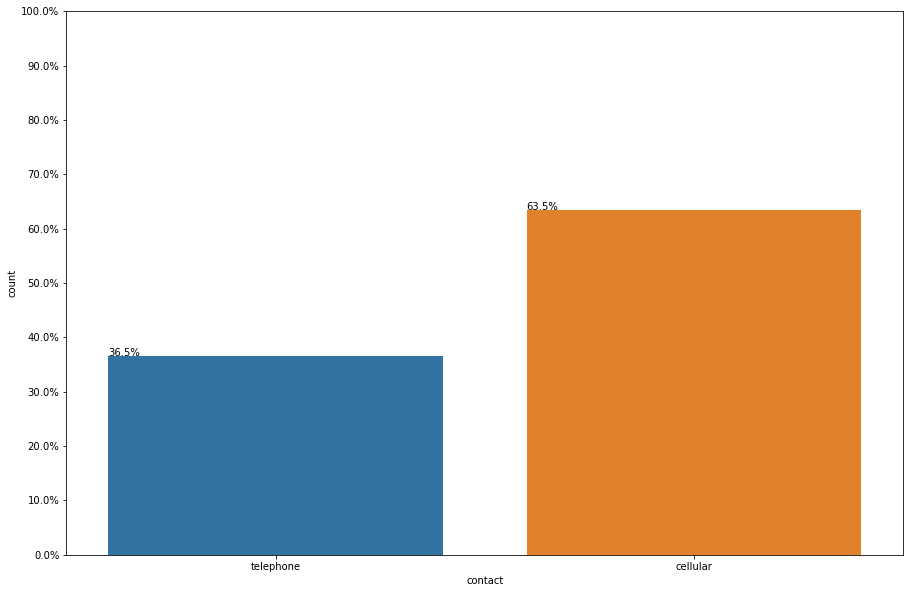

In [19]:
countplot_columns('contact')

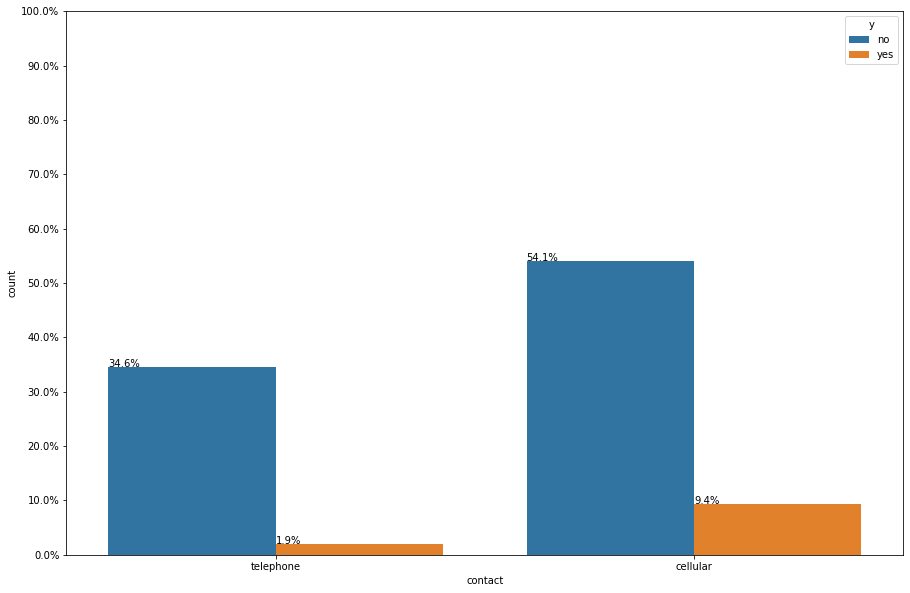

In [20]:
countplot_target_varaible('contact','y')

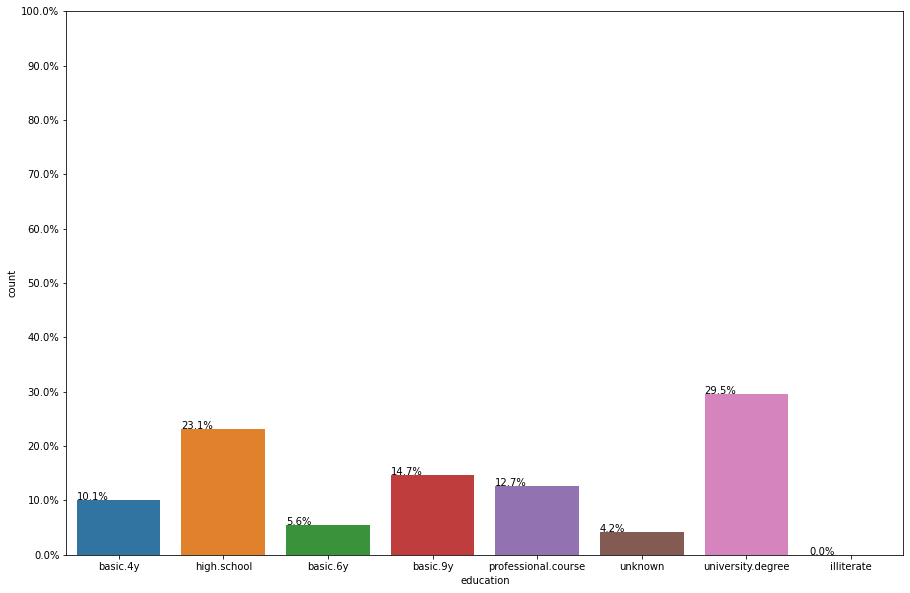

In [21]:
countplot_columns('education')

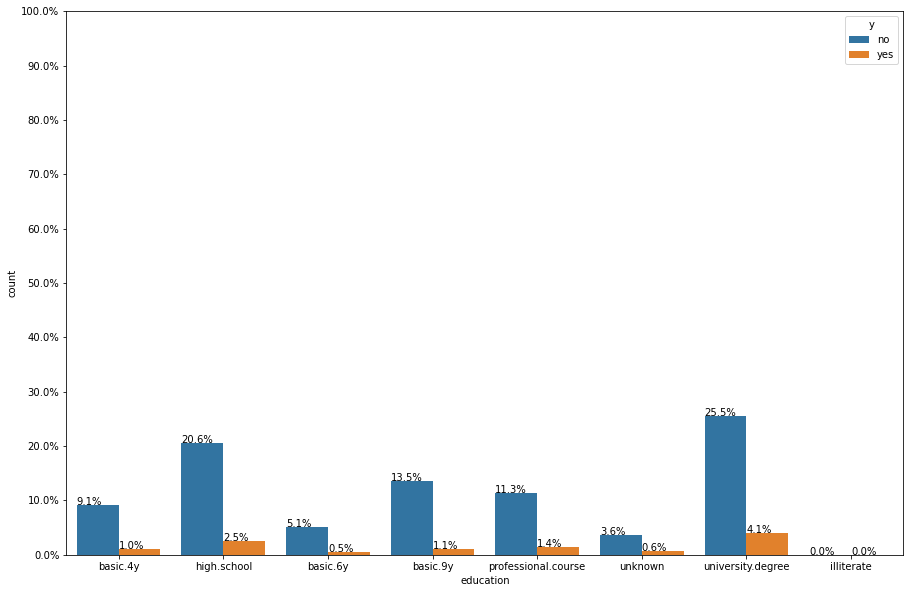

In [22]:
countplot_target_varaible('education','y')

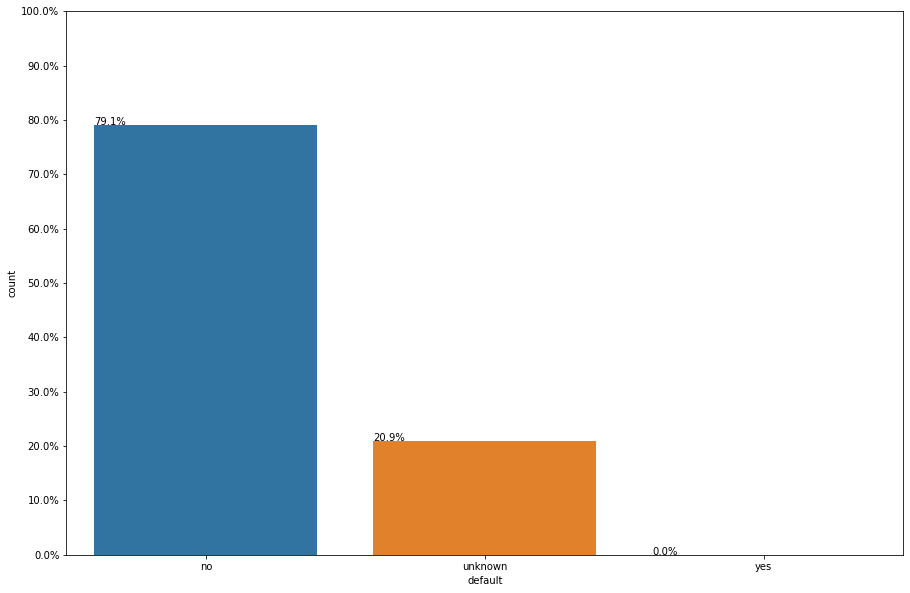

In [23]:
countplot_columns('default')

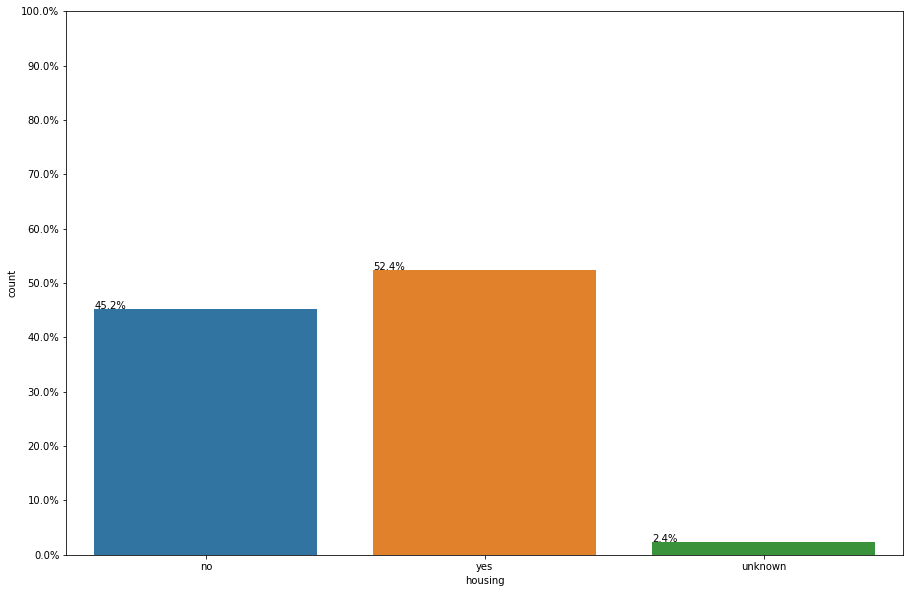

In [24]:
countplot_columns('housing')

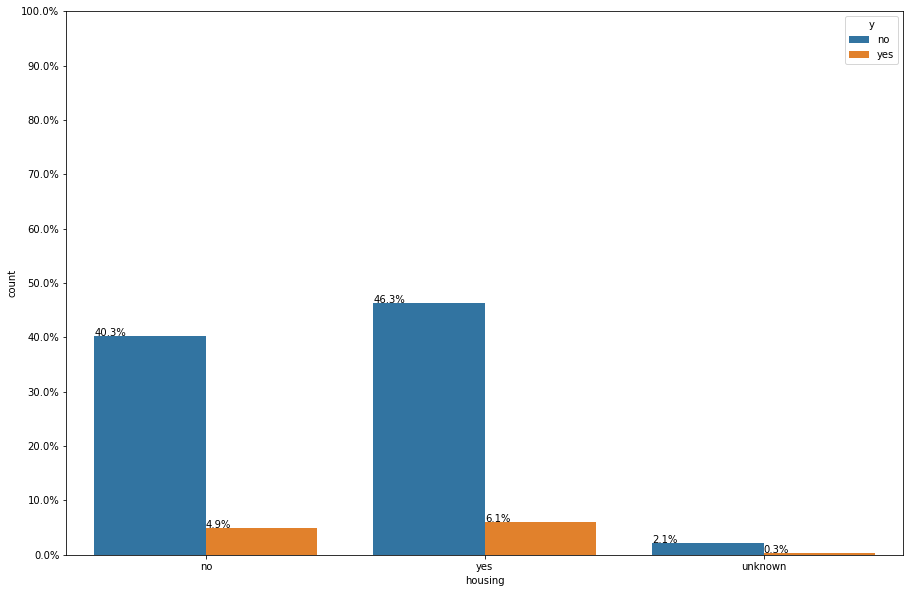

In [25]:
countplot_target_varaible('housing','y')

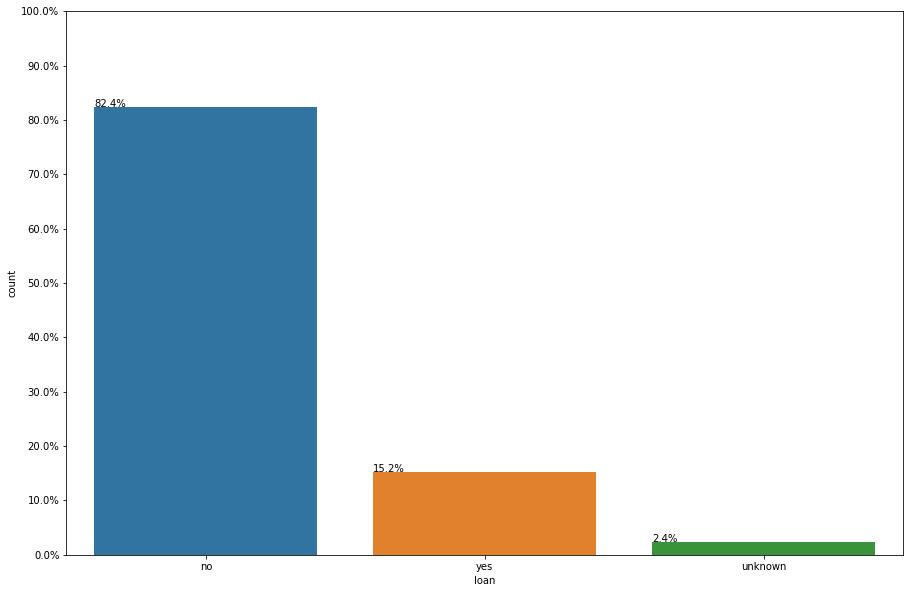

In [26]:
countplot_columns('loan')#

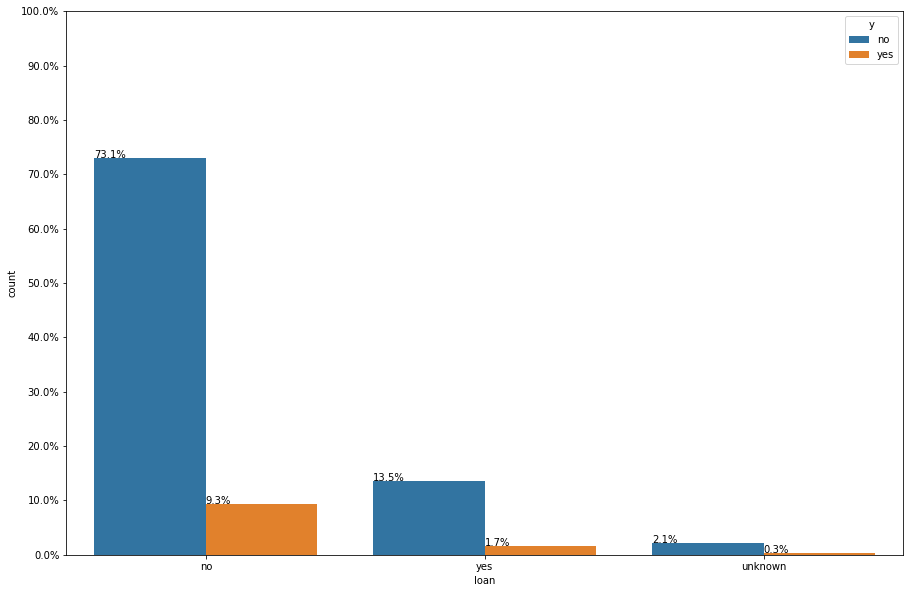

In [27]:
countplot_target_varaible('loan','y')

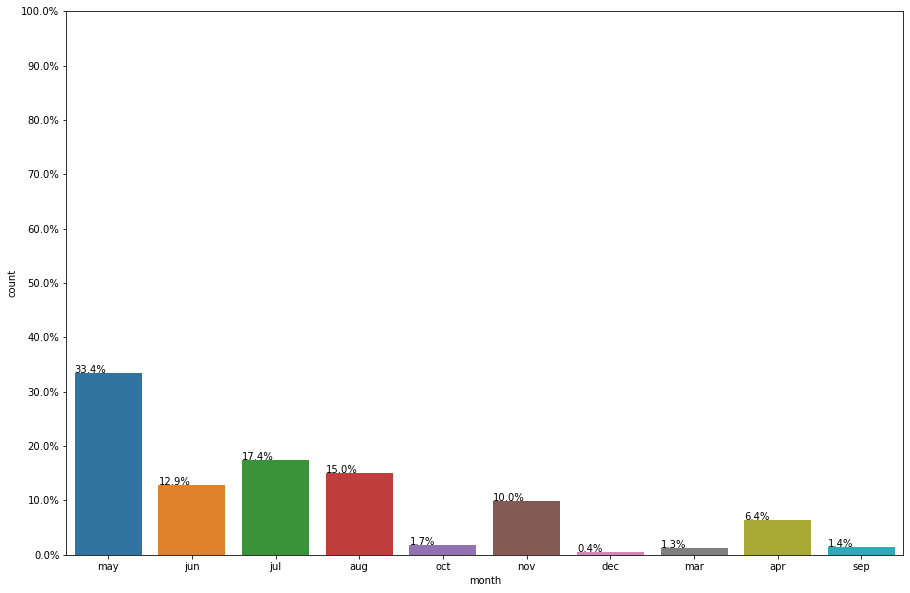

In [28]:
countplot_columns('month')

In [29]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

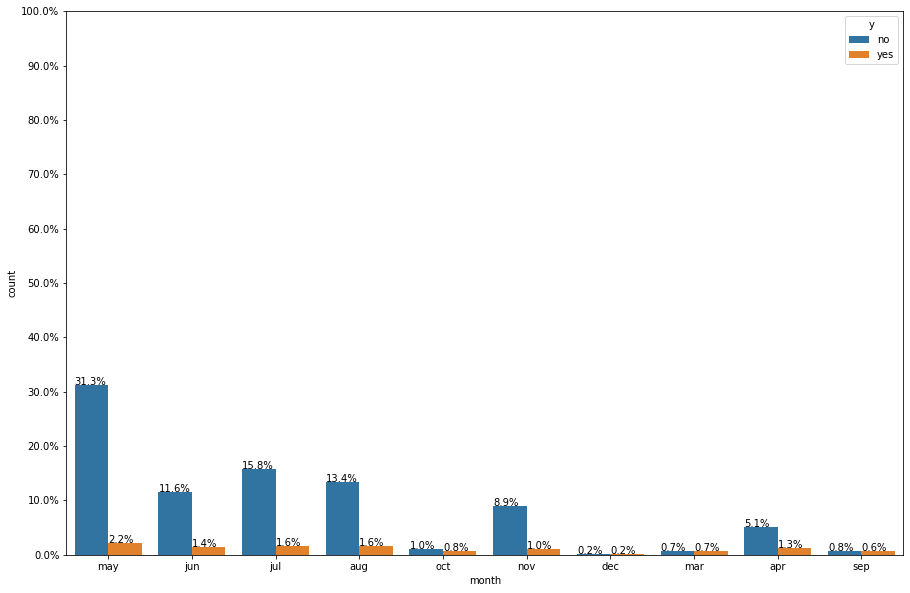

In [30]:
countplot_target_varaible('month','y')

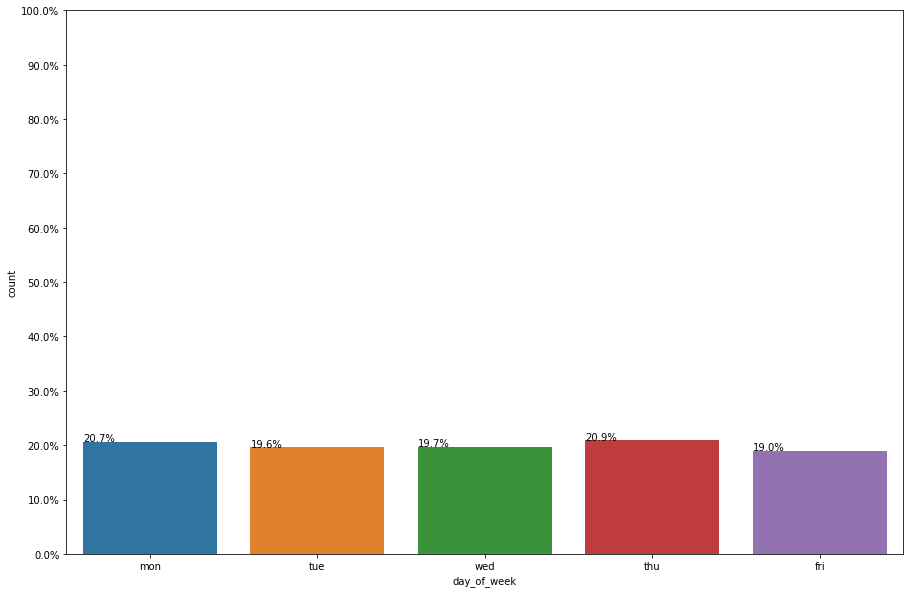

In [31]:
countplot_columns('day_of_week')

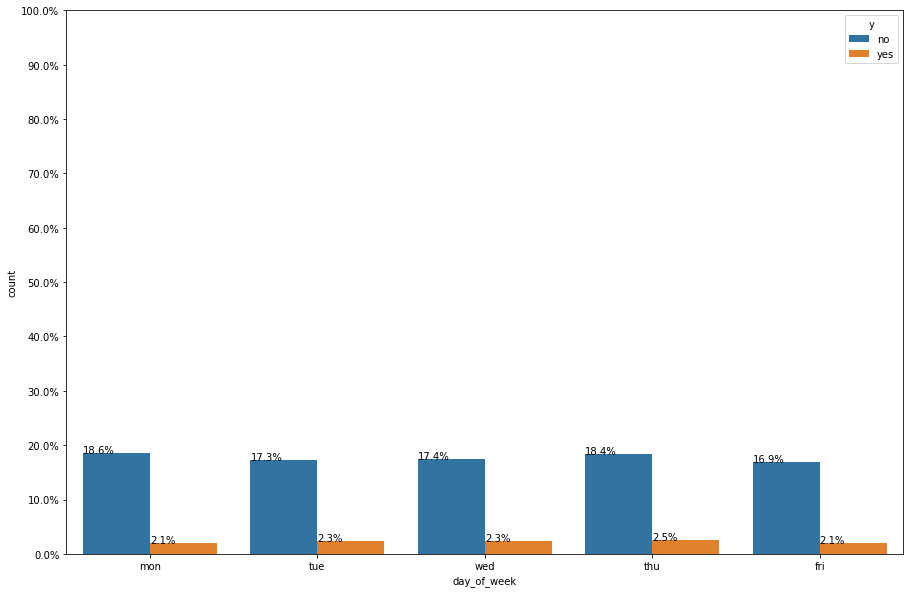

In [32]:
countplot_target_varaible('day_of_week','y')

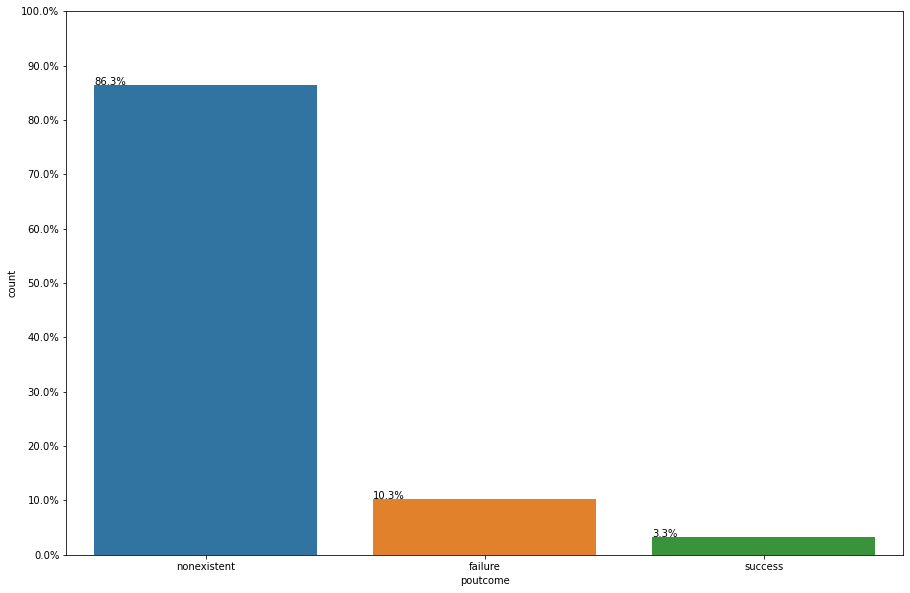

In [33]:
countplot_columns('poutcome')

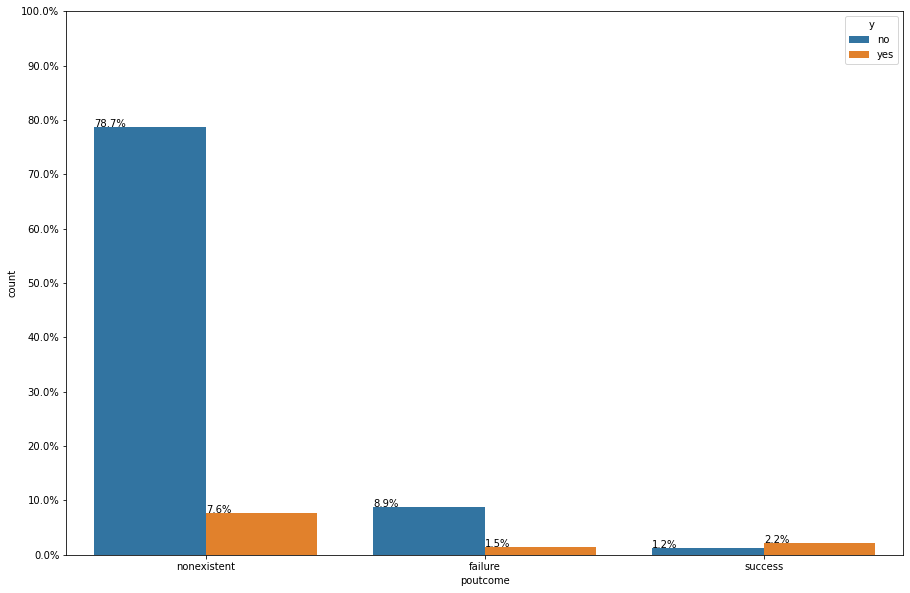

In [34]:
countplot_target_varaible('poutcome','y')

In [35]:
def plotting_kd(data,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(data,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(data,hue=hue,size=10).map(sns.distplot,columns)
        plt.pyplot.legend()

In [36]:
def violinplot_columns(columns,y='y'):
    figure(figsize=(15,10))
    sns.violinplot(x=df[y],y=df[columns],hue=df['y'],showfliers=False)
    plt.pyplot.title(columns.upper())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


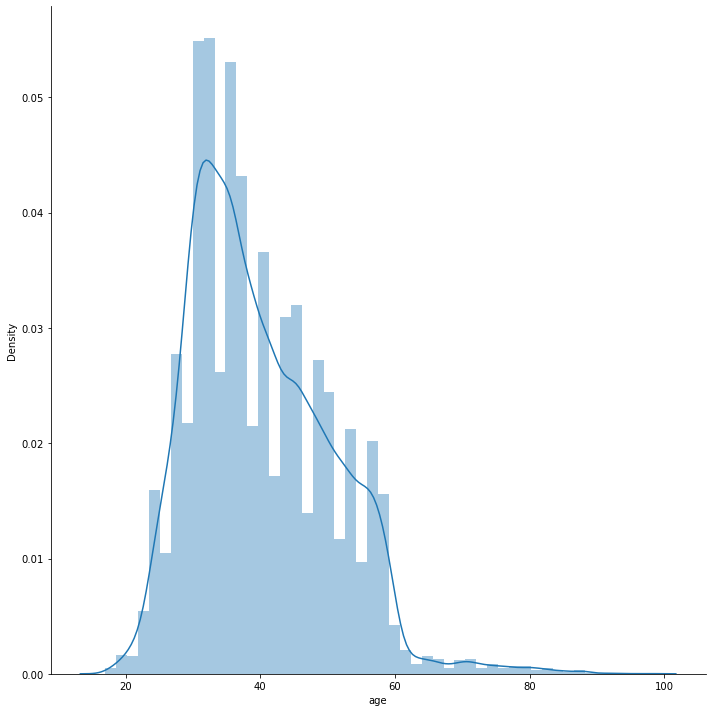

In [37]:
plotting_kd(df,'age')

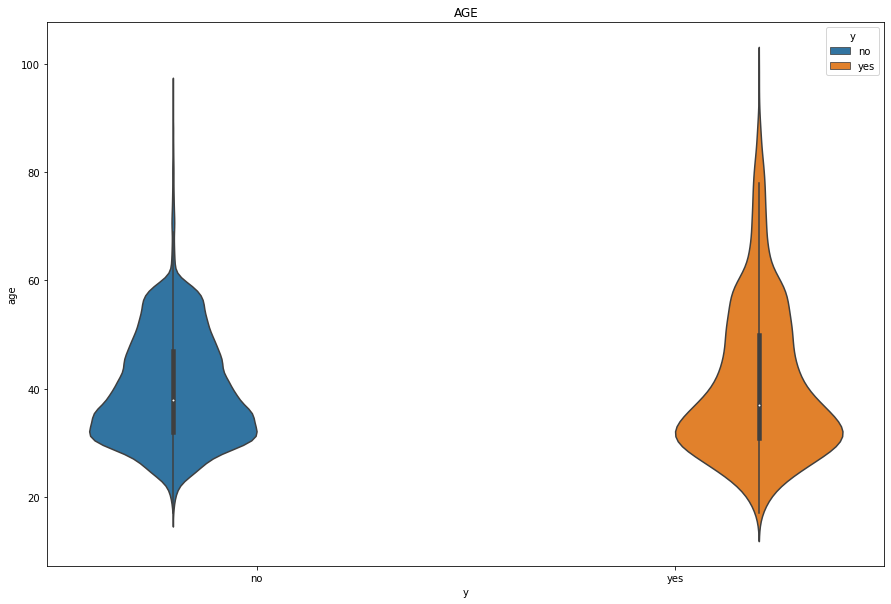

In [38]:
violinplot_columns('age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


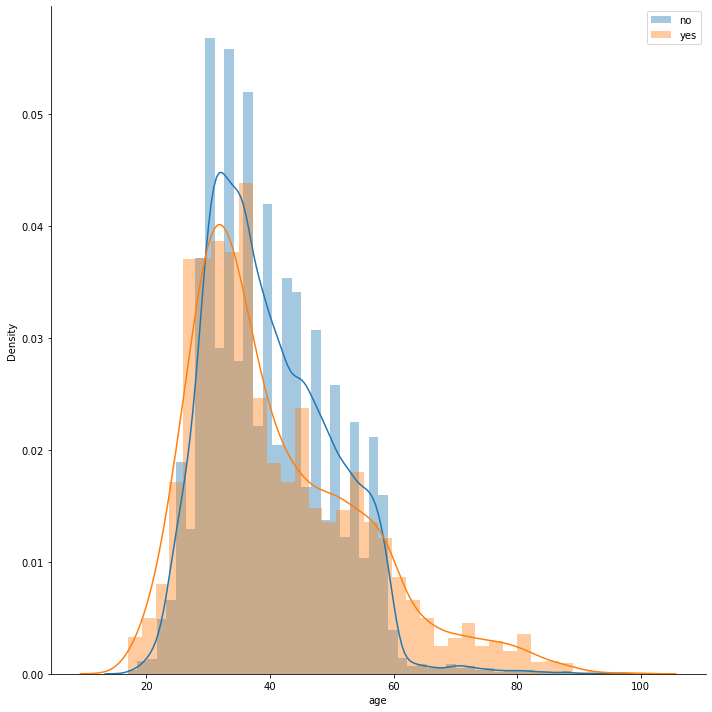

In [39]:
plotting_kd(df,'age',hue='y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


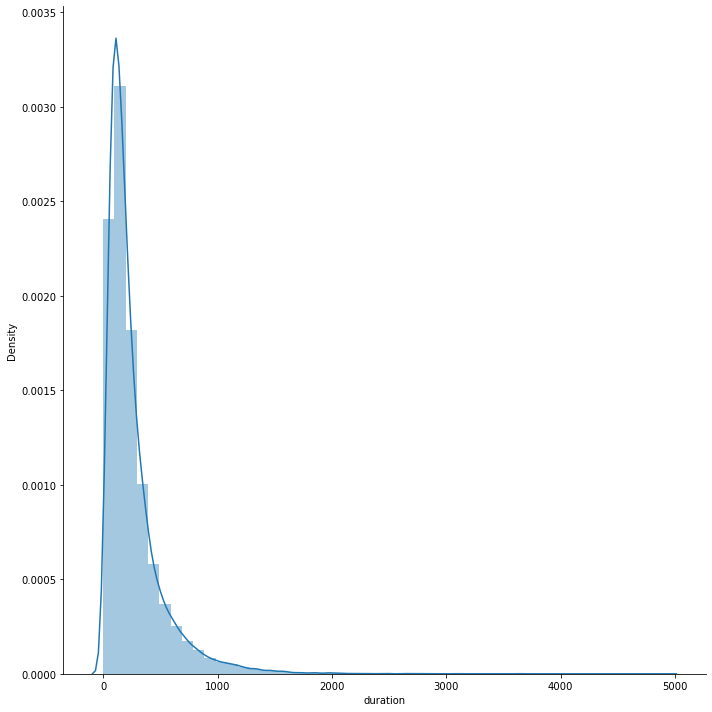

In [40]:
plotting_kd(df,'duration')

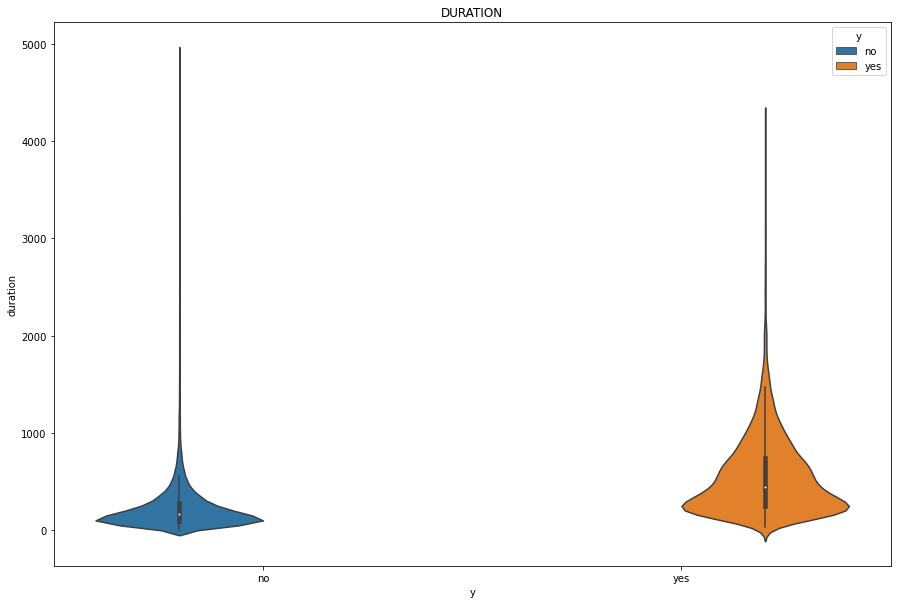

In [41]:
violinplot_columns('duration')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


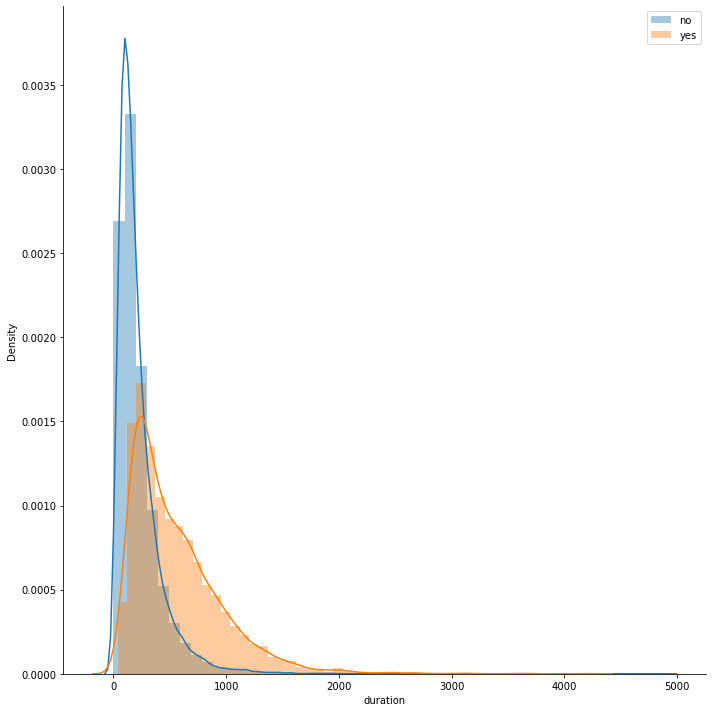

In [42]:
plotting_kd(df,'duration',hue='y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


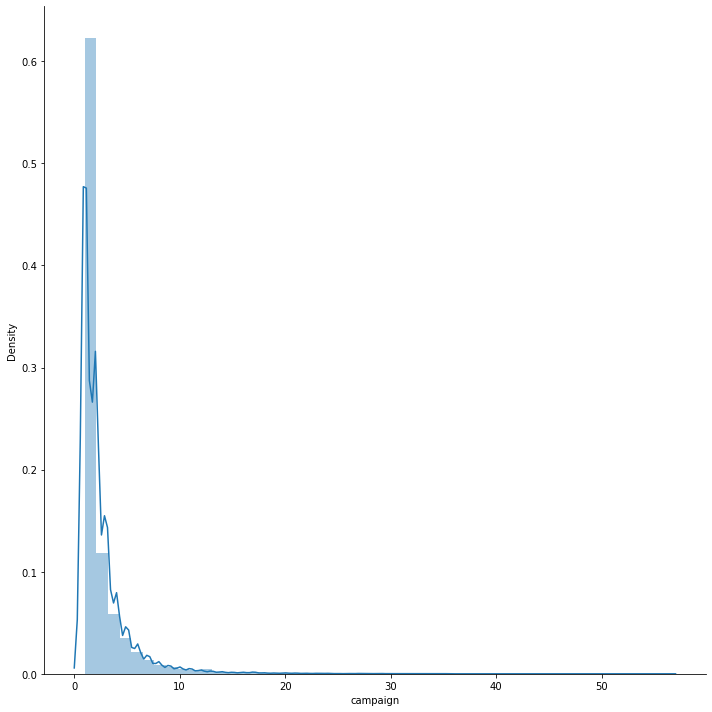

In [43]:
plotting_kd(df,'campaign')

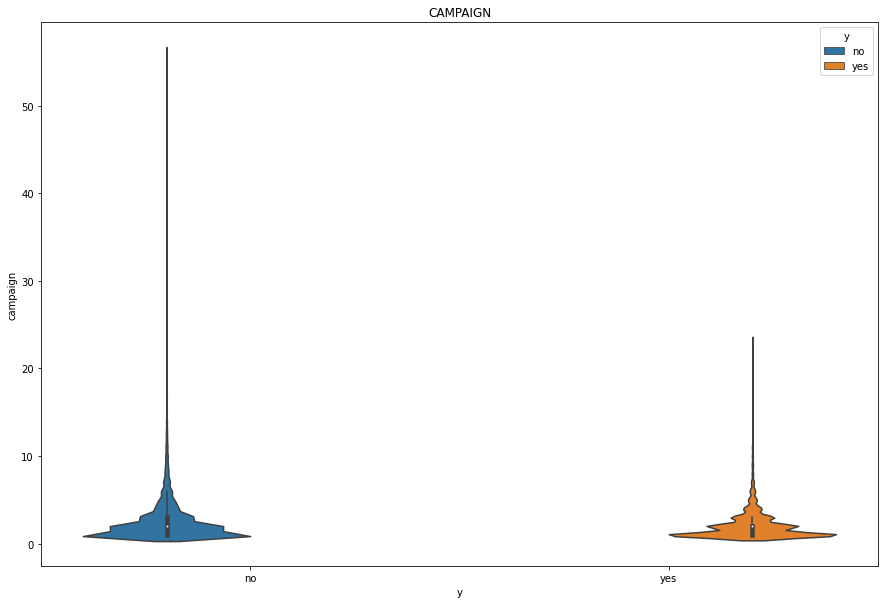

In [44]:
violinplot_columns('campaign')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


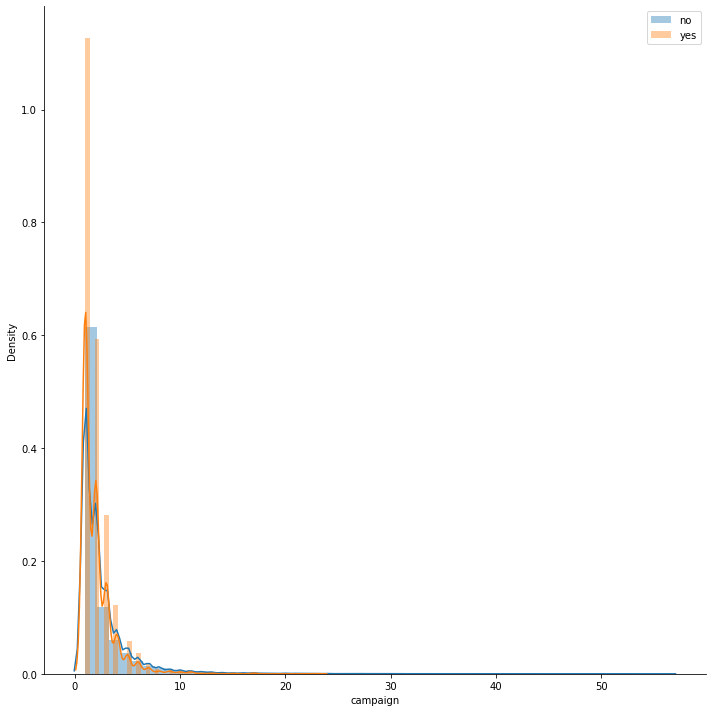

In [45]:
plotting_kd(df,'campaign',hue='y')

In [46]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


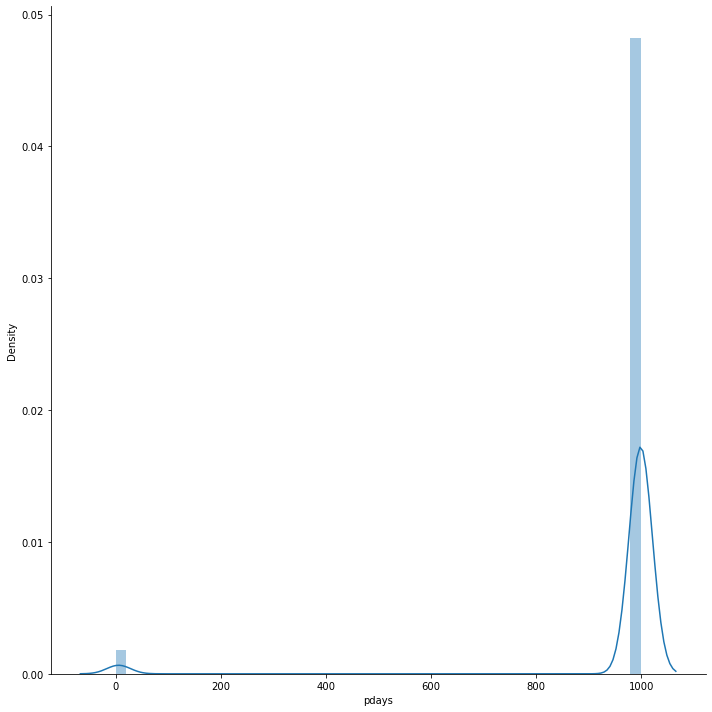

In [47]:
plotting_kd(df,'pdays')

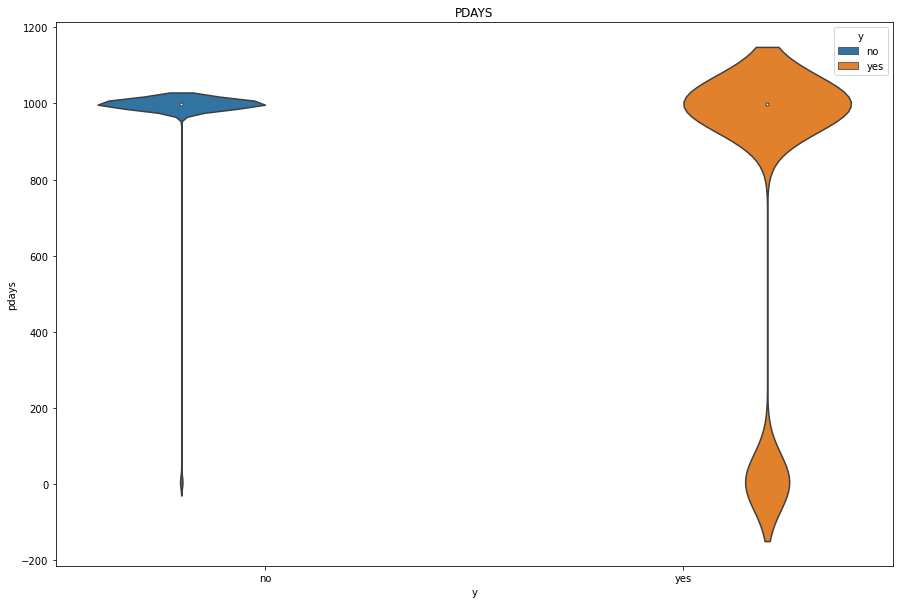

In [48]:
violinplot_columns('pdays')

In [49]:
percentile=[0,25,50,75,99]
for values in percentile:
    print("Percentile values",values)
    print("For yes class")
    print(np.percentile(df[df['y']=='yes'].pdays,values))
    
    print("For No Class")
    print(np.percentile(df[df['y']=='no'].pdays,values))
    print()

Percentile values 0
For yes class
0.0
For No Class
0.0

Percentile values 25
For yes class
999.0
For No Class
999.0

Percentile values 50
For yes class
999.0
For No Class
999.0

Percentile values 75
For yes class
999.0
For No Class
999.0

Percentile values 99
For yes class
999.0
For No Class
999.0



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


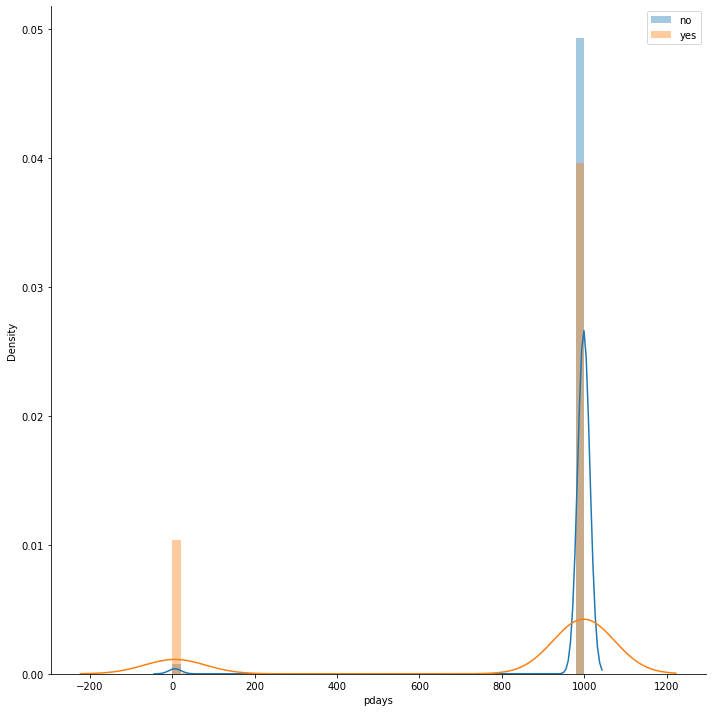

In [50]:
plotting_kd(df,'pdays',hue='y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


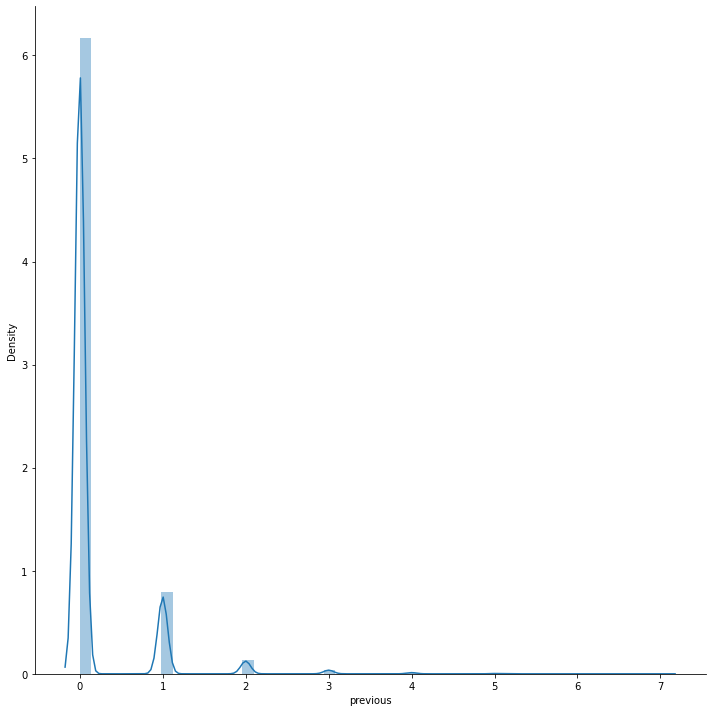

In [51]:
plotting_kd(df,'previous')

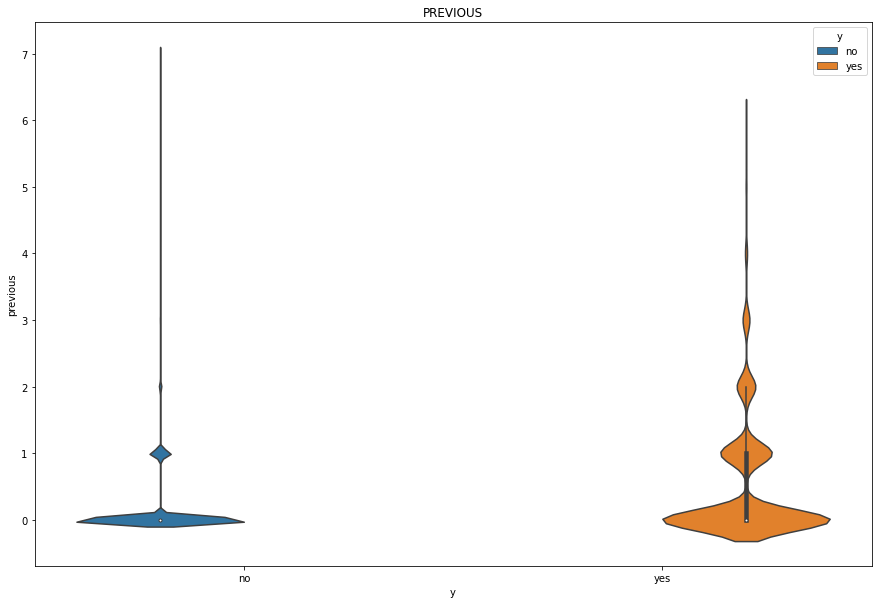

In [52]:
violinplot_columns('previous')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


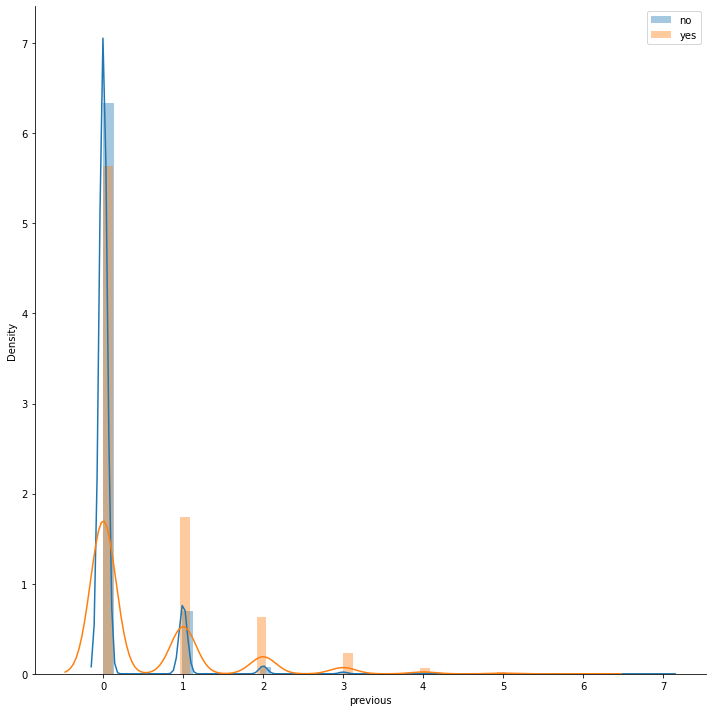

In [53]:
plotting_kd(df,'previous',hue='y')

In [54]:
print(np.percentile(df[df['y']=='yes'].previous,50))
print(np.percentile(df[df['y']=='no'].previous,50))

0.0
0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


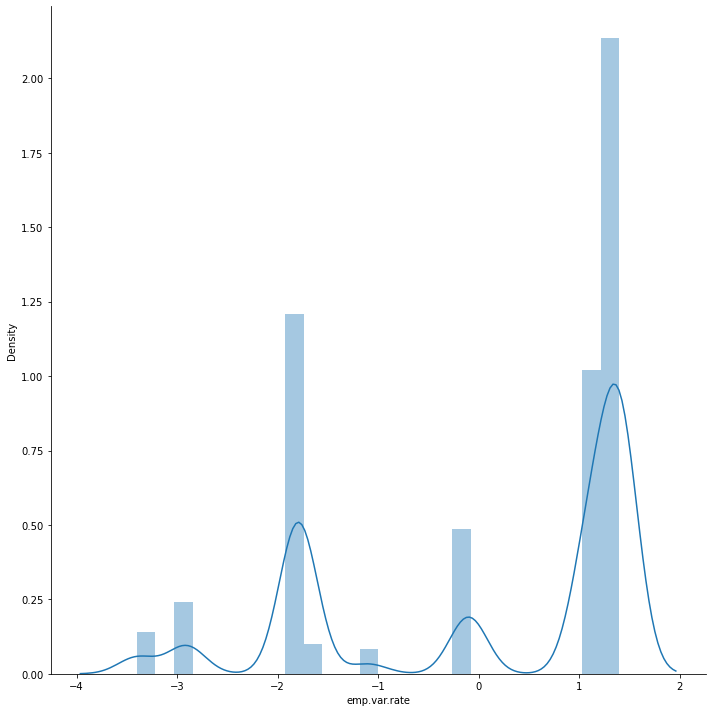

In [55]:
plotting_kd(df,'emp.var.rate')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


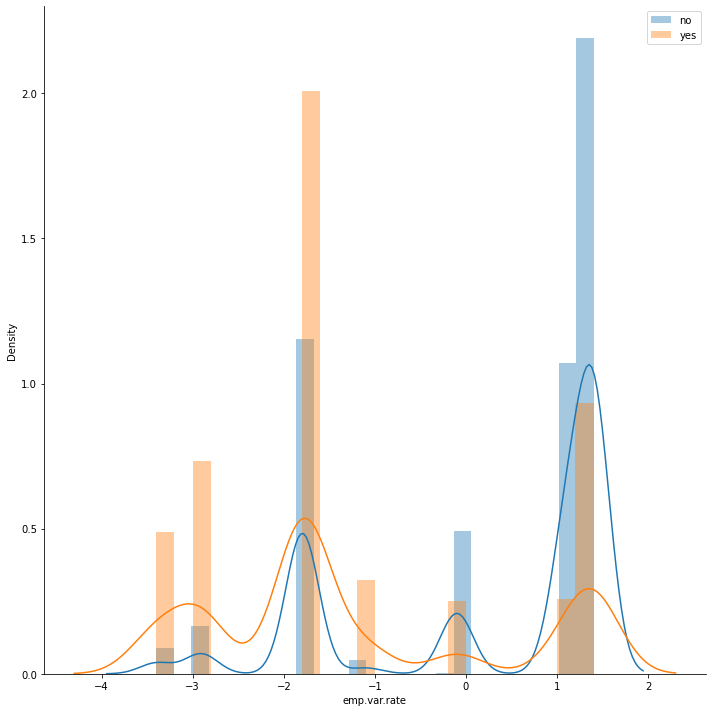

In [56]:
plotting_kd(df,'emp.var.rate',hue='y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


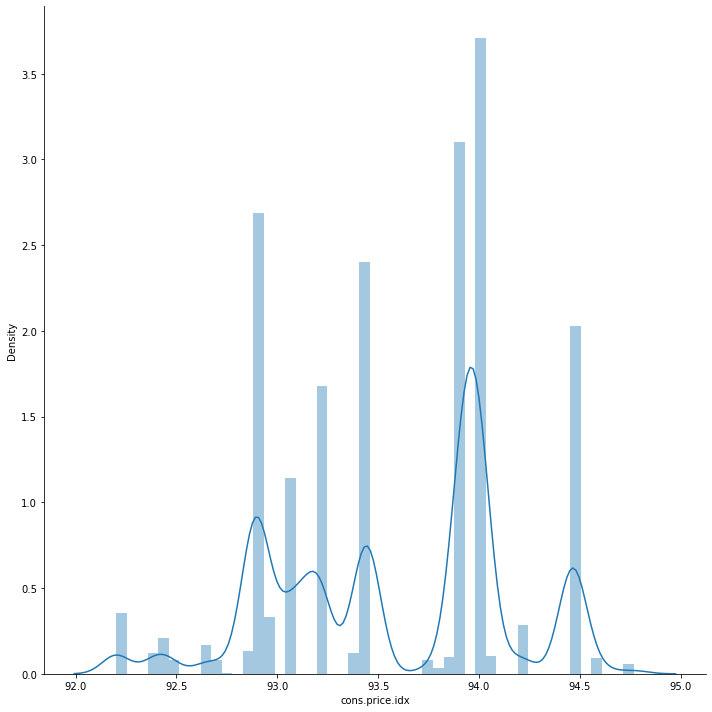

In [57]:
plotting_kd(df,'cons.price.idx')

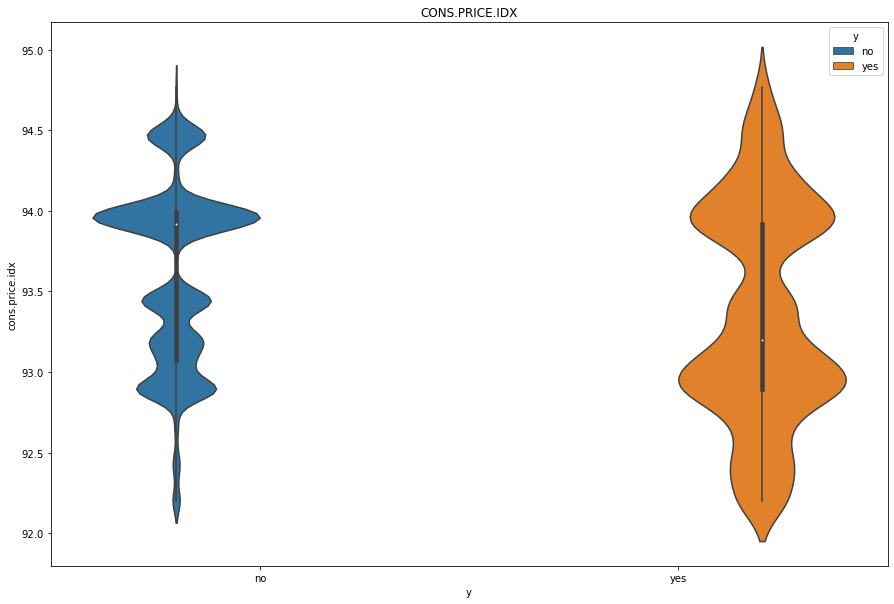

In [58]:
violinplot_columns('cons.price.idx')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


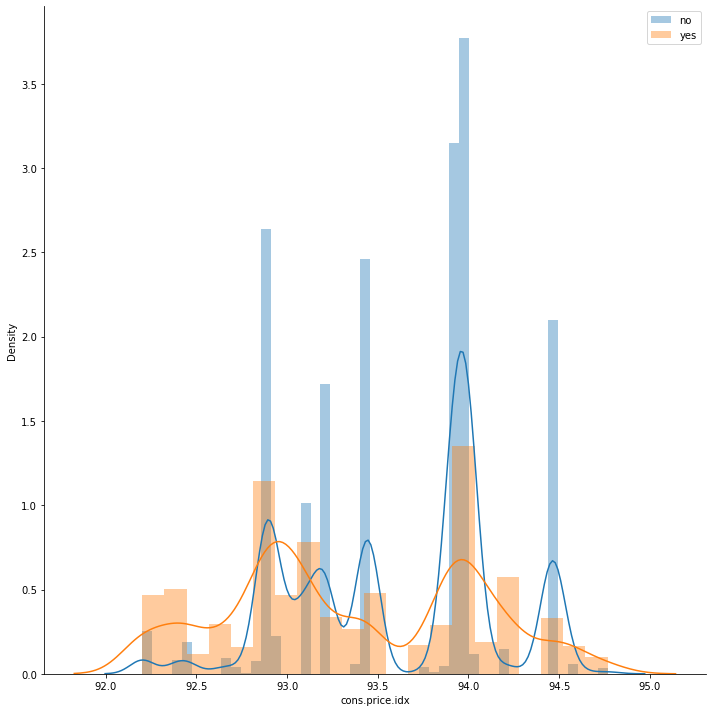

In [59]:
plotting_kd(df,'cons.price.idx',hue='y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


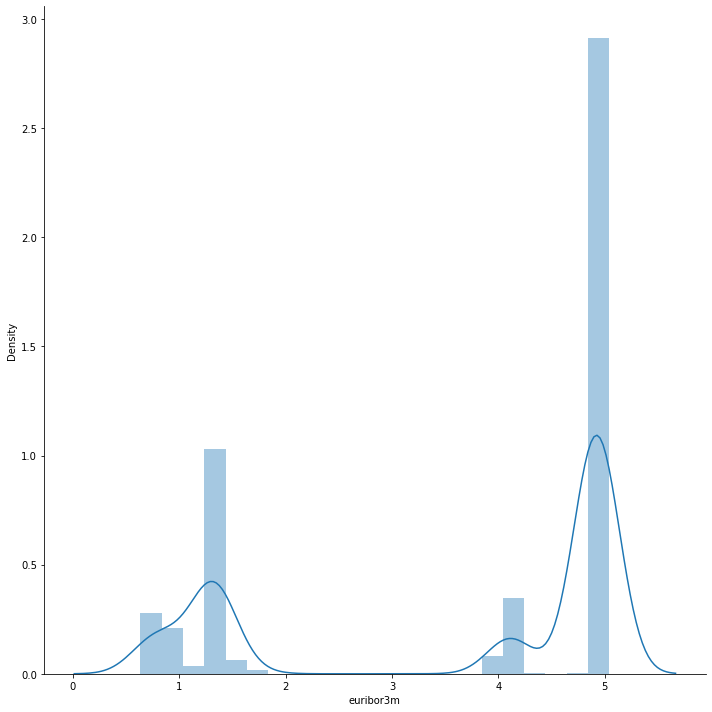

In [60]:
plotting_kd(df,'euribor3m')


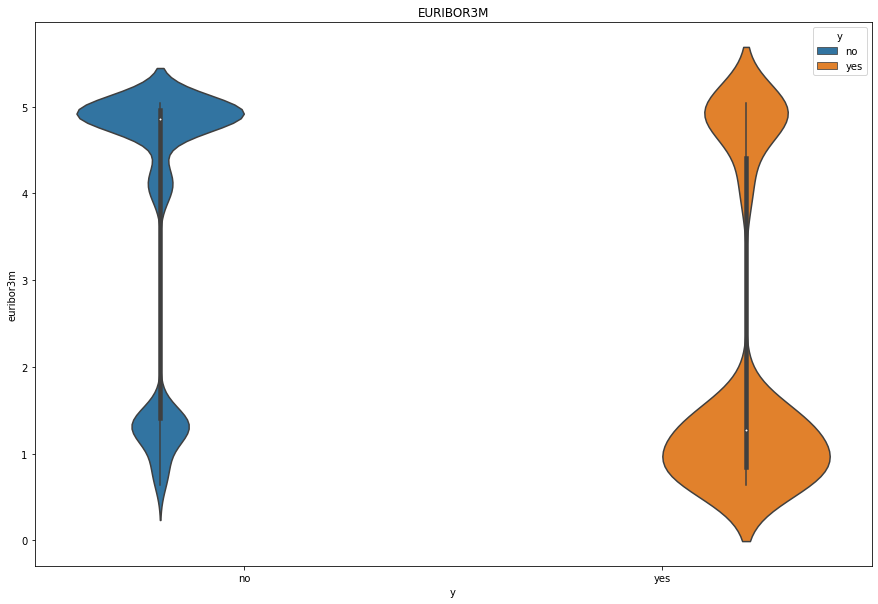

In [61]:
violinplot_columns('euribor3m')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


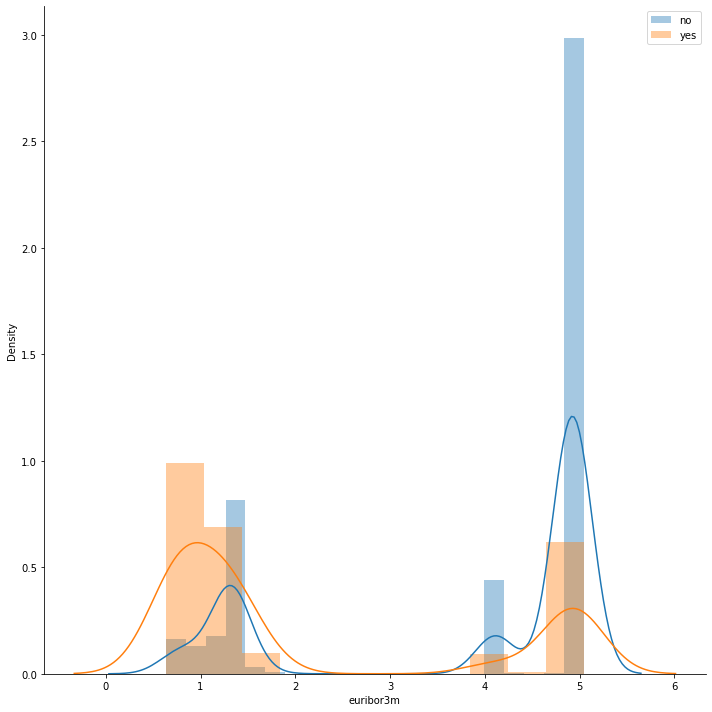

In [62]:
plotting_kd(df,'euribor3m',hue='y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


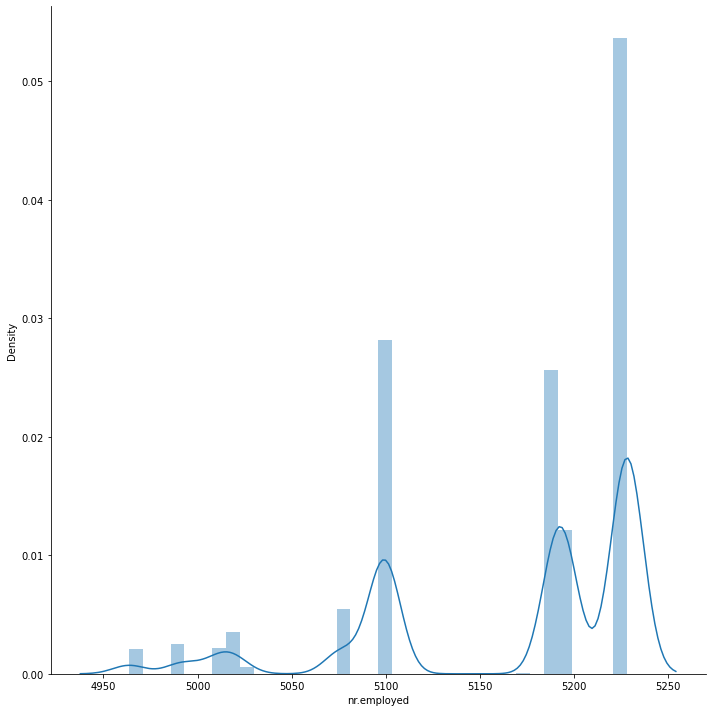

In [63]:
plotting_kd(df,'nr.employed')

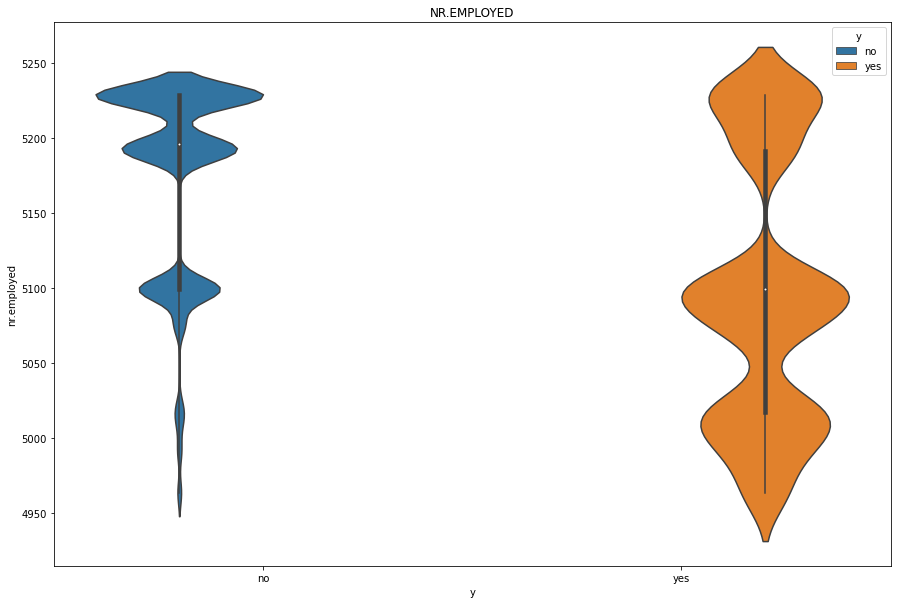

In [64]:
violinplot_columns('nr.employed')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


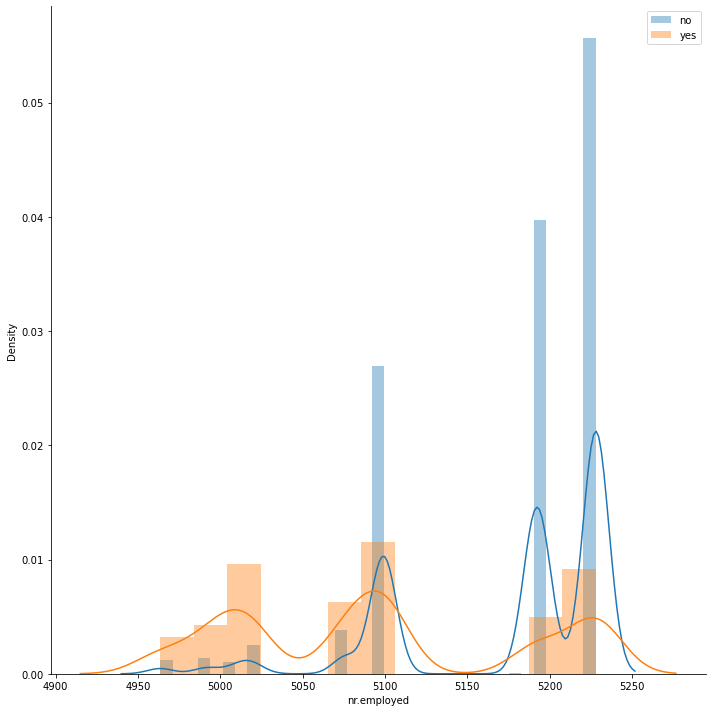

In [65]:
plotting_kd(df,'nr.employed',hue='y')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


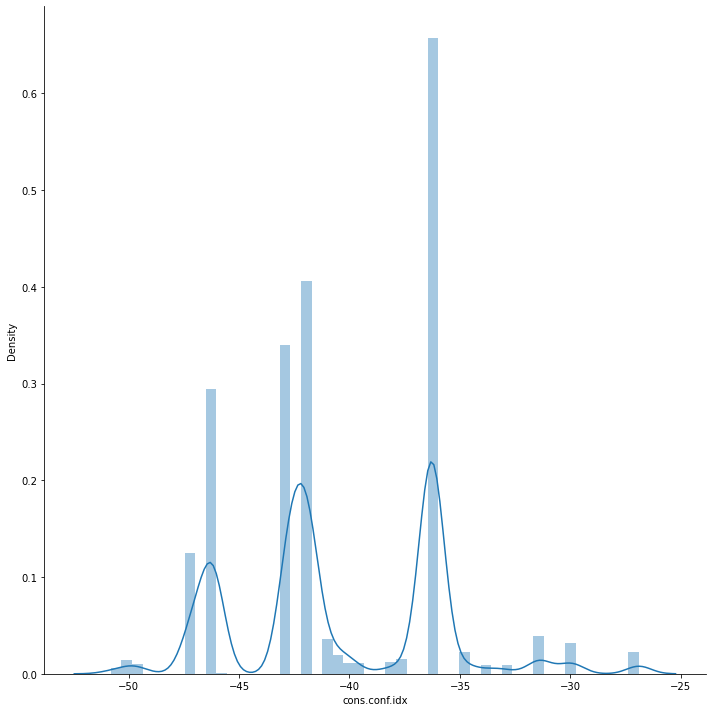

In [66]:
plotting_kd(df,'cons.conf.idx')

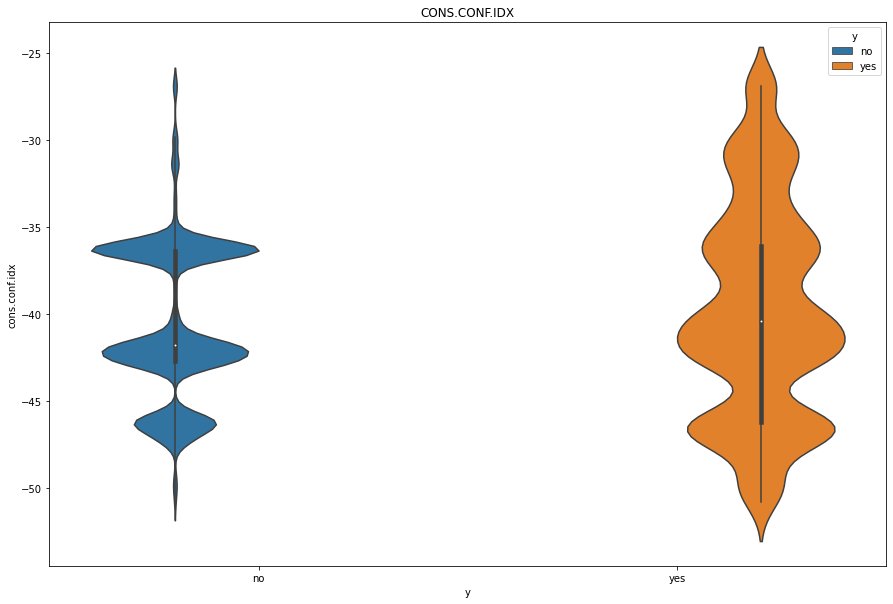

In [67]:
violinplot_columns('cons.conf.idx')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


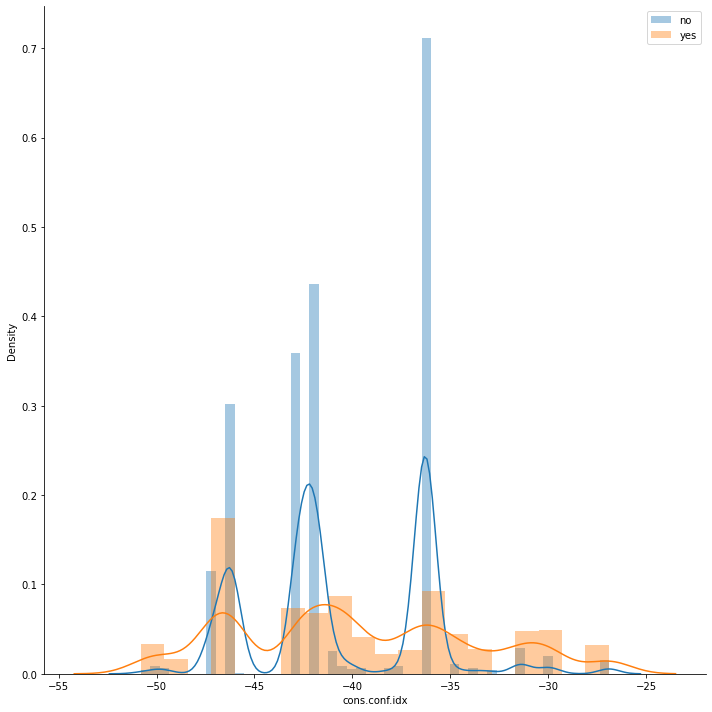

In [68]:
plotting_kd(df,'cons.conf.idx',hue='y')

In [69]:
def plotting_heatmap(data):
    correlation=data.corr()
    figure(figsize=(15,10))
        
        
    sns.heatmap(correlation, annot=True)
    plt.pyplot.show()

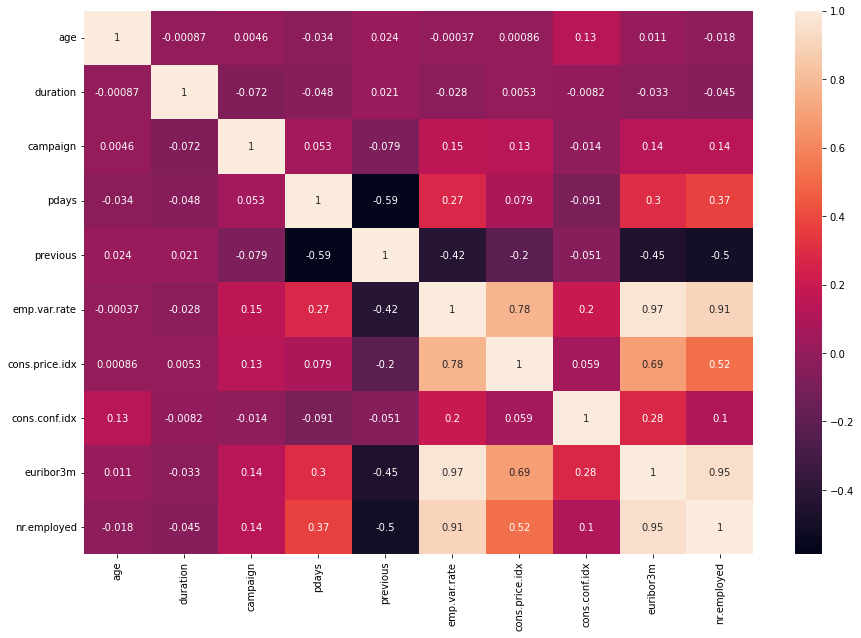

In [70]:
plotting_heatmap(df)

In [78]:
def plotting_violinplot(column1,column2):
    figure(figsize=(15,10))
    sns.violinplot(x=df[column1],y=df[column2],hue=df['y'],showfliers=False)
    plt.pyplot.show()

In [86]:
def plotting_catplot(column1,column2,height=10):
    sns.catplot(x=column1, col=column2,hue='y',col_wrap=2,data=df,kind="count", height=height, aspect=.8)

In [73]:
def age_to_categorical(data1,age):
    age_group=pd.cut(age,bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])
    #inserting the age group after age and deleting it
    data1.insert(1,'age_group',age_group)
    #dropping age column
    data1.drop('age',axis=1,inplace=True)
    
    return data1
df=age_to_categorical(df,df.age)    

In [74]:
def creating_i_loan(data2):
    i_loan=[]
    for index in range(len(data2)):
        if (data2['housing'].loc[index]=='yes' or data2['loan'].loc[index]=='yes'):
            i_loan.append('yes')
        elif (data2['housing'].loc[index]=='no' or data2['loan'].loc[index]=='no'):
            i_loan.append('no')
        
        else:
            i_loan.append('unknown')
    data2.insert(5,'i_loan',i_loan,True)   
    data2.drop(['loan','housing'],axis=1,inplace=True)
    return data2           
df=creating_i_loan(df)

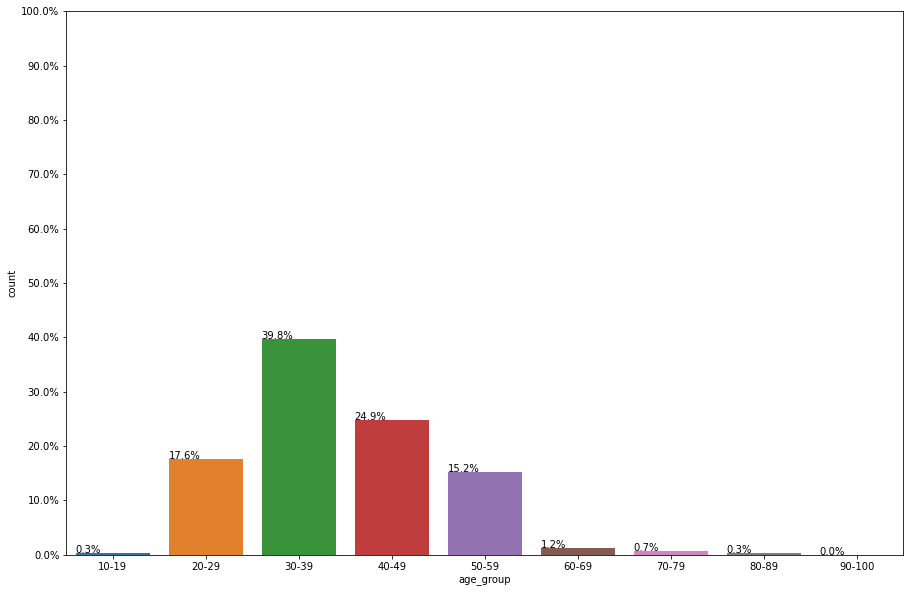

In [75]:
countplot_columns('age_group')

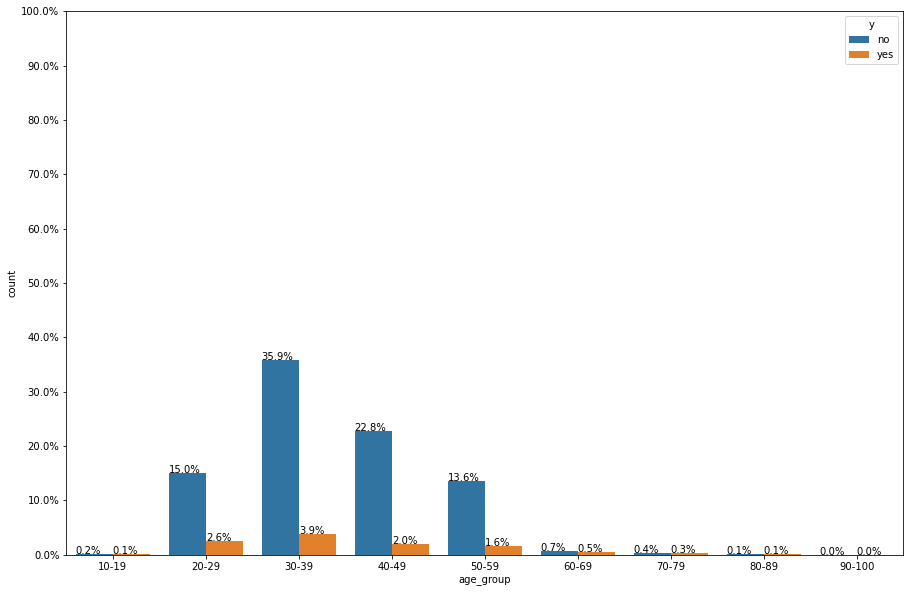

In [76]:
countplot_target_varaible('age_group','y')

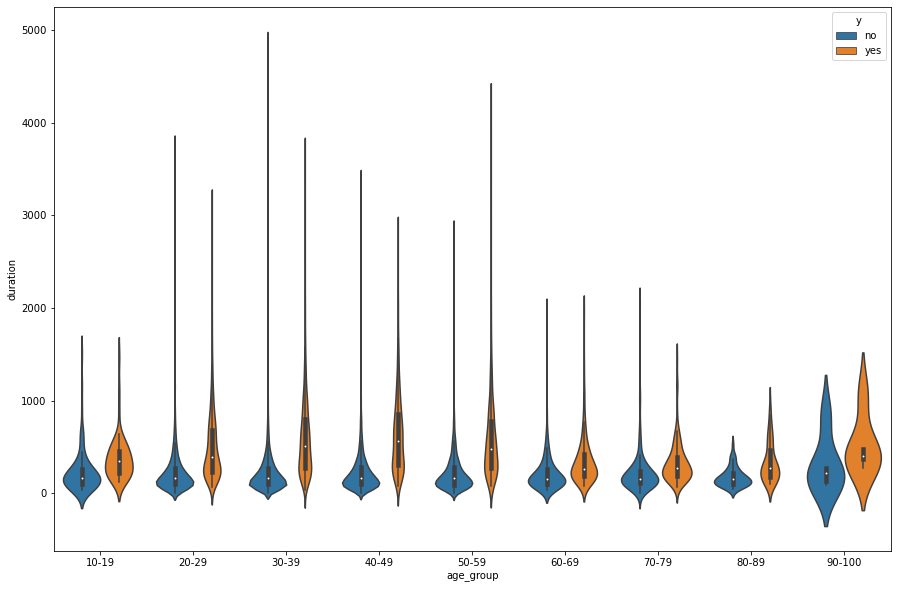

In [79]:
plotting_violinplot('age_group','duration')

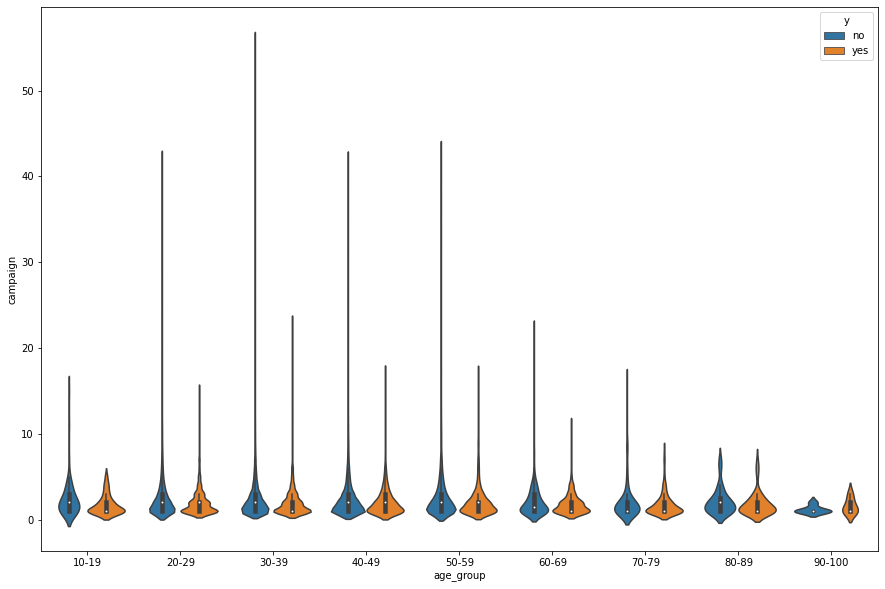

In [80]:
plotting_violinplot('age_group','campaign')

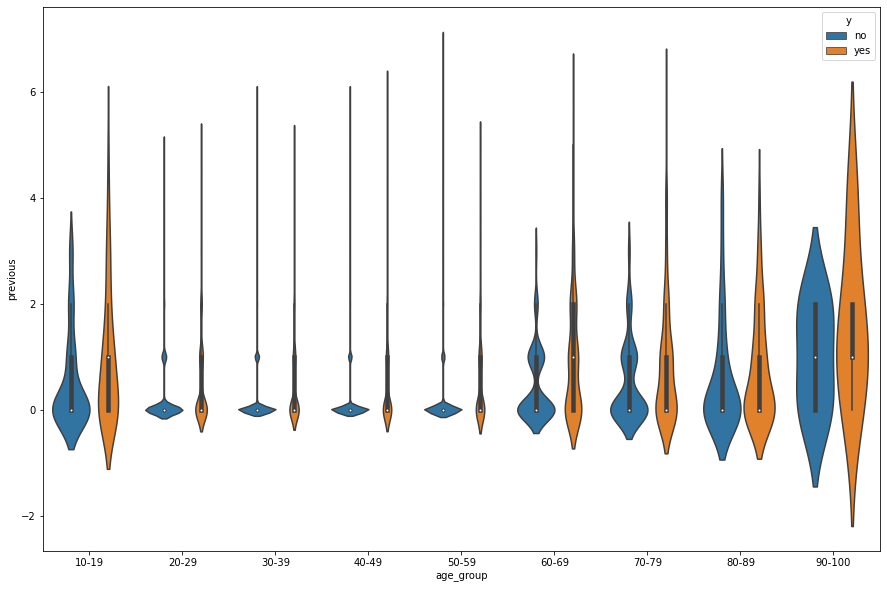

In [81]:
plotting_violinplot('age_group','previous')

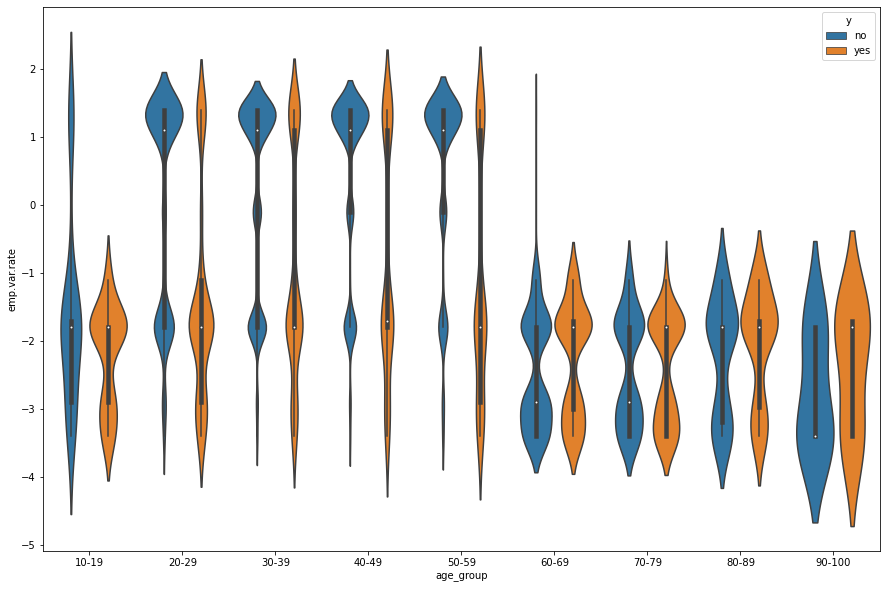

In [82]:
plotting_violinplot('age_group','emp.var.rate')

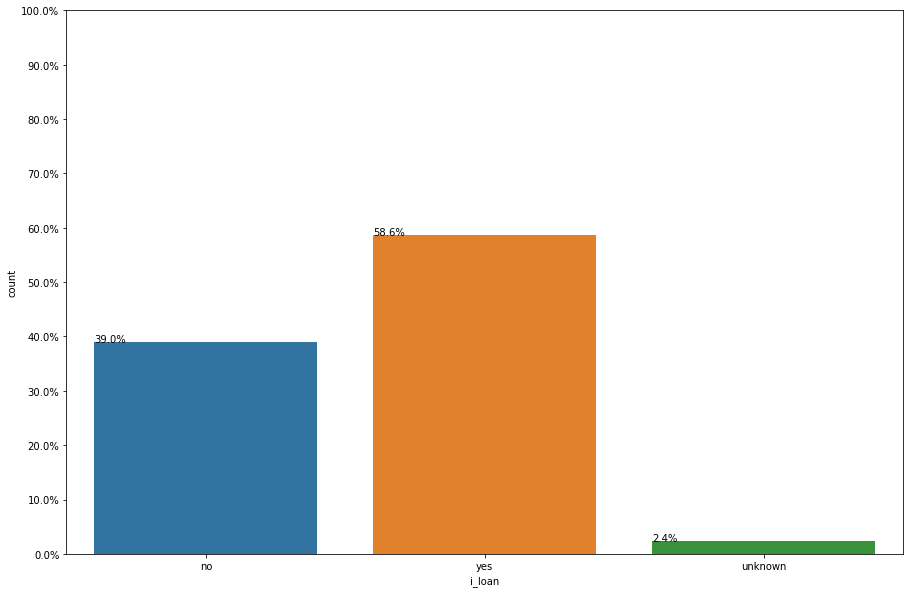

In [83]:
countplot_columns('i_loan')

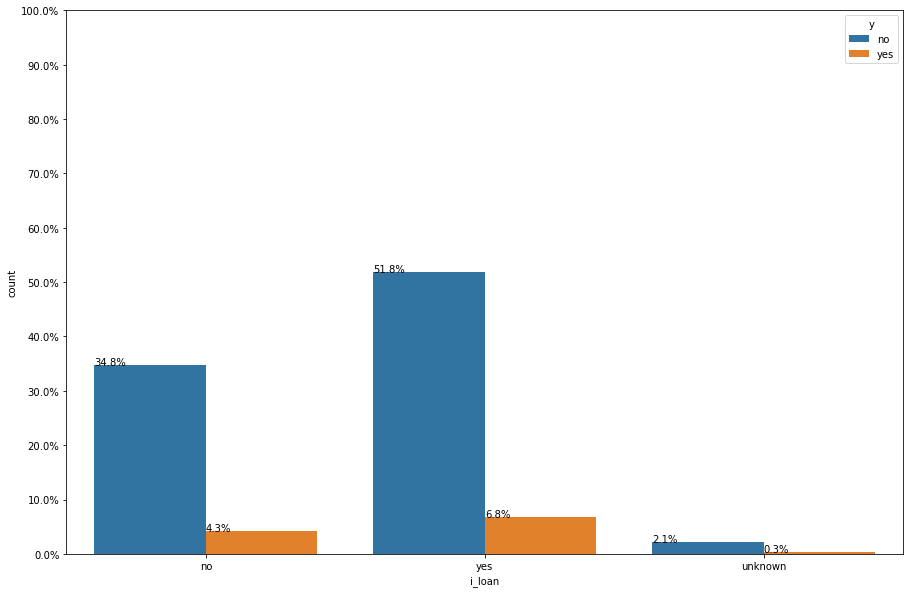

In [84]:
countplot_target_varaible('i_loan','y')

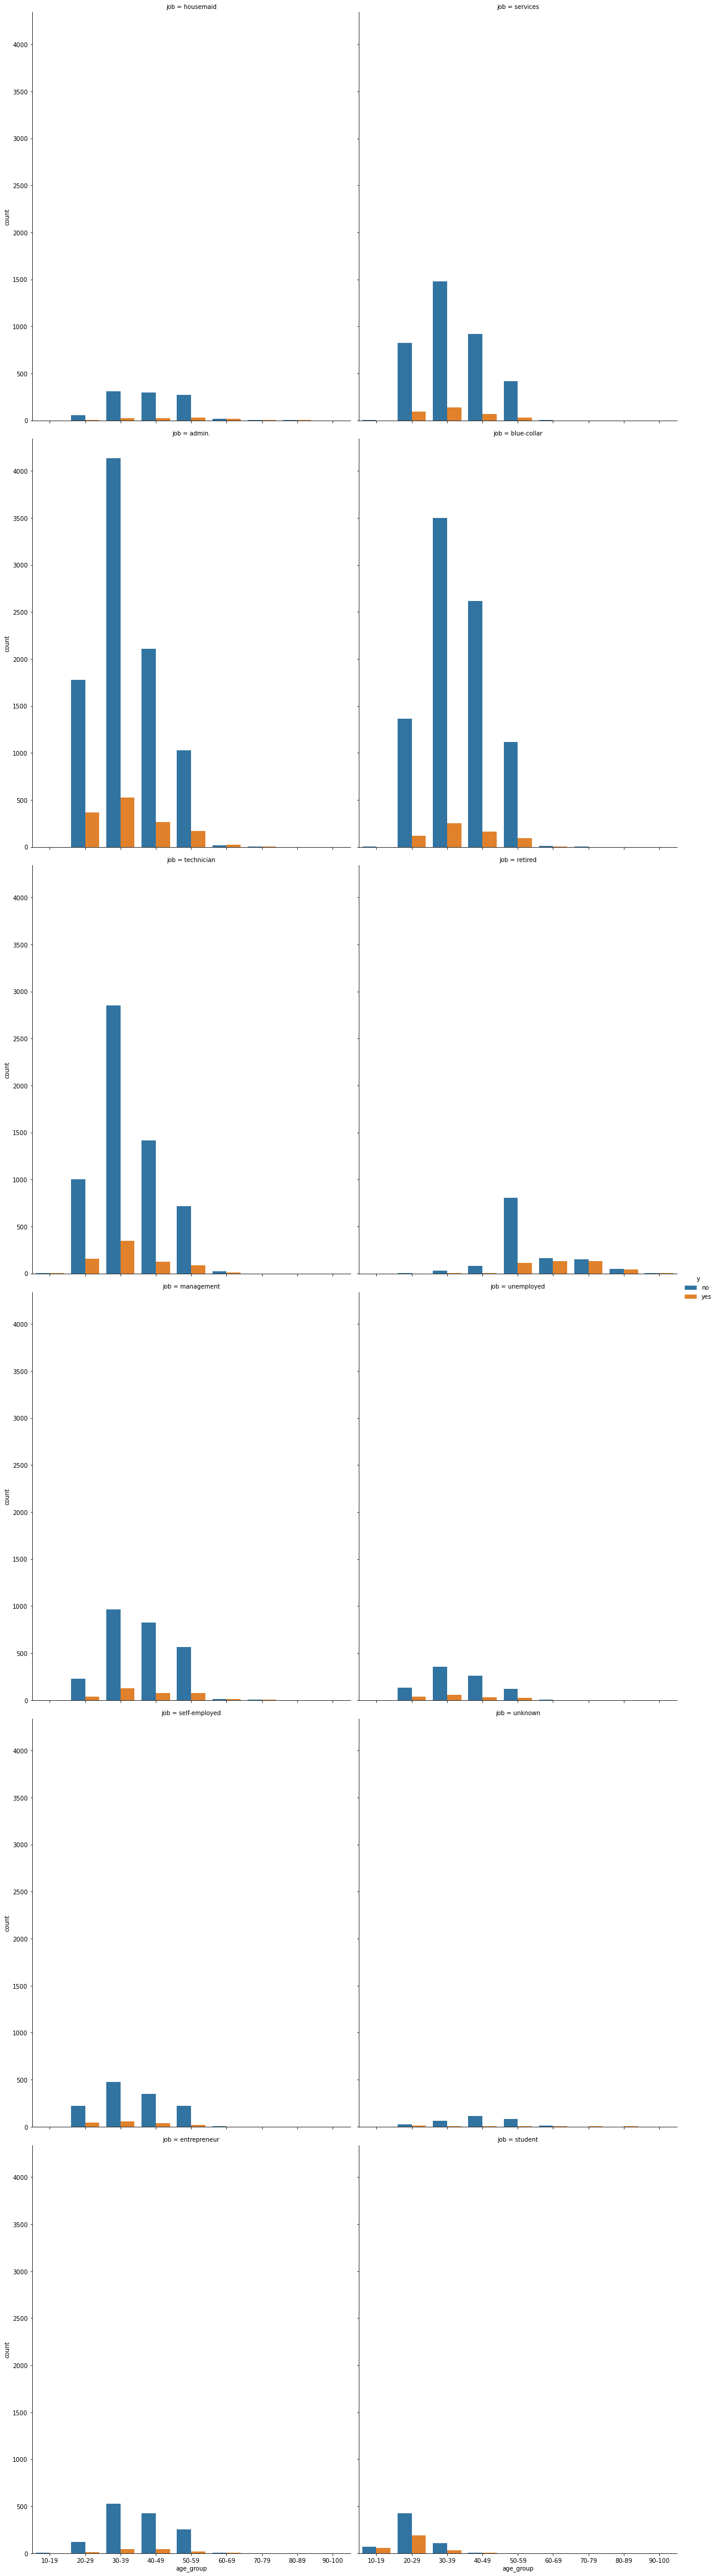

In [87]:
plotting_catplot('age_group','job')

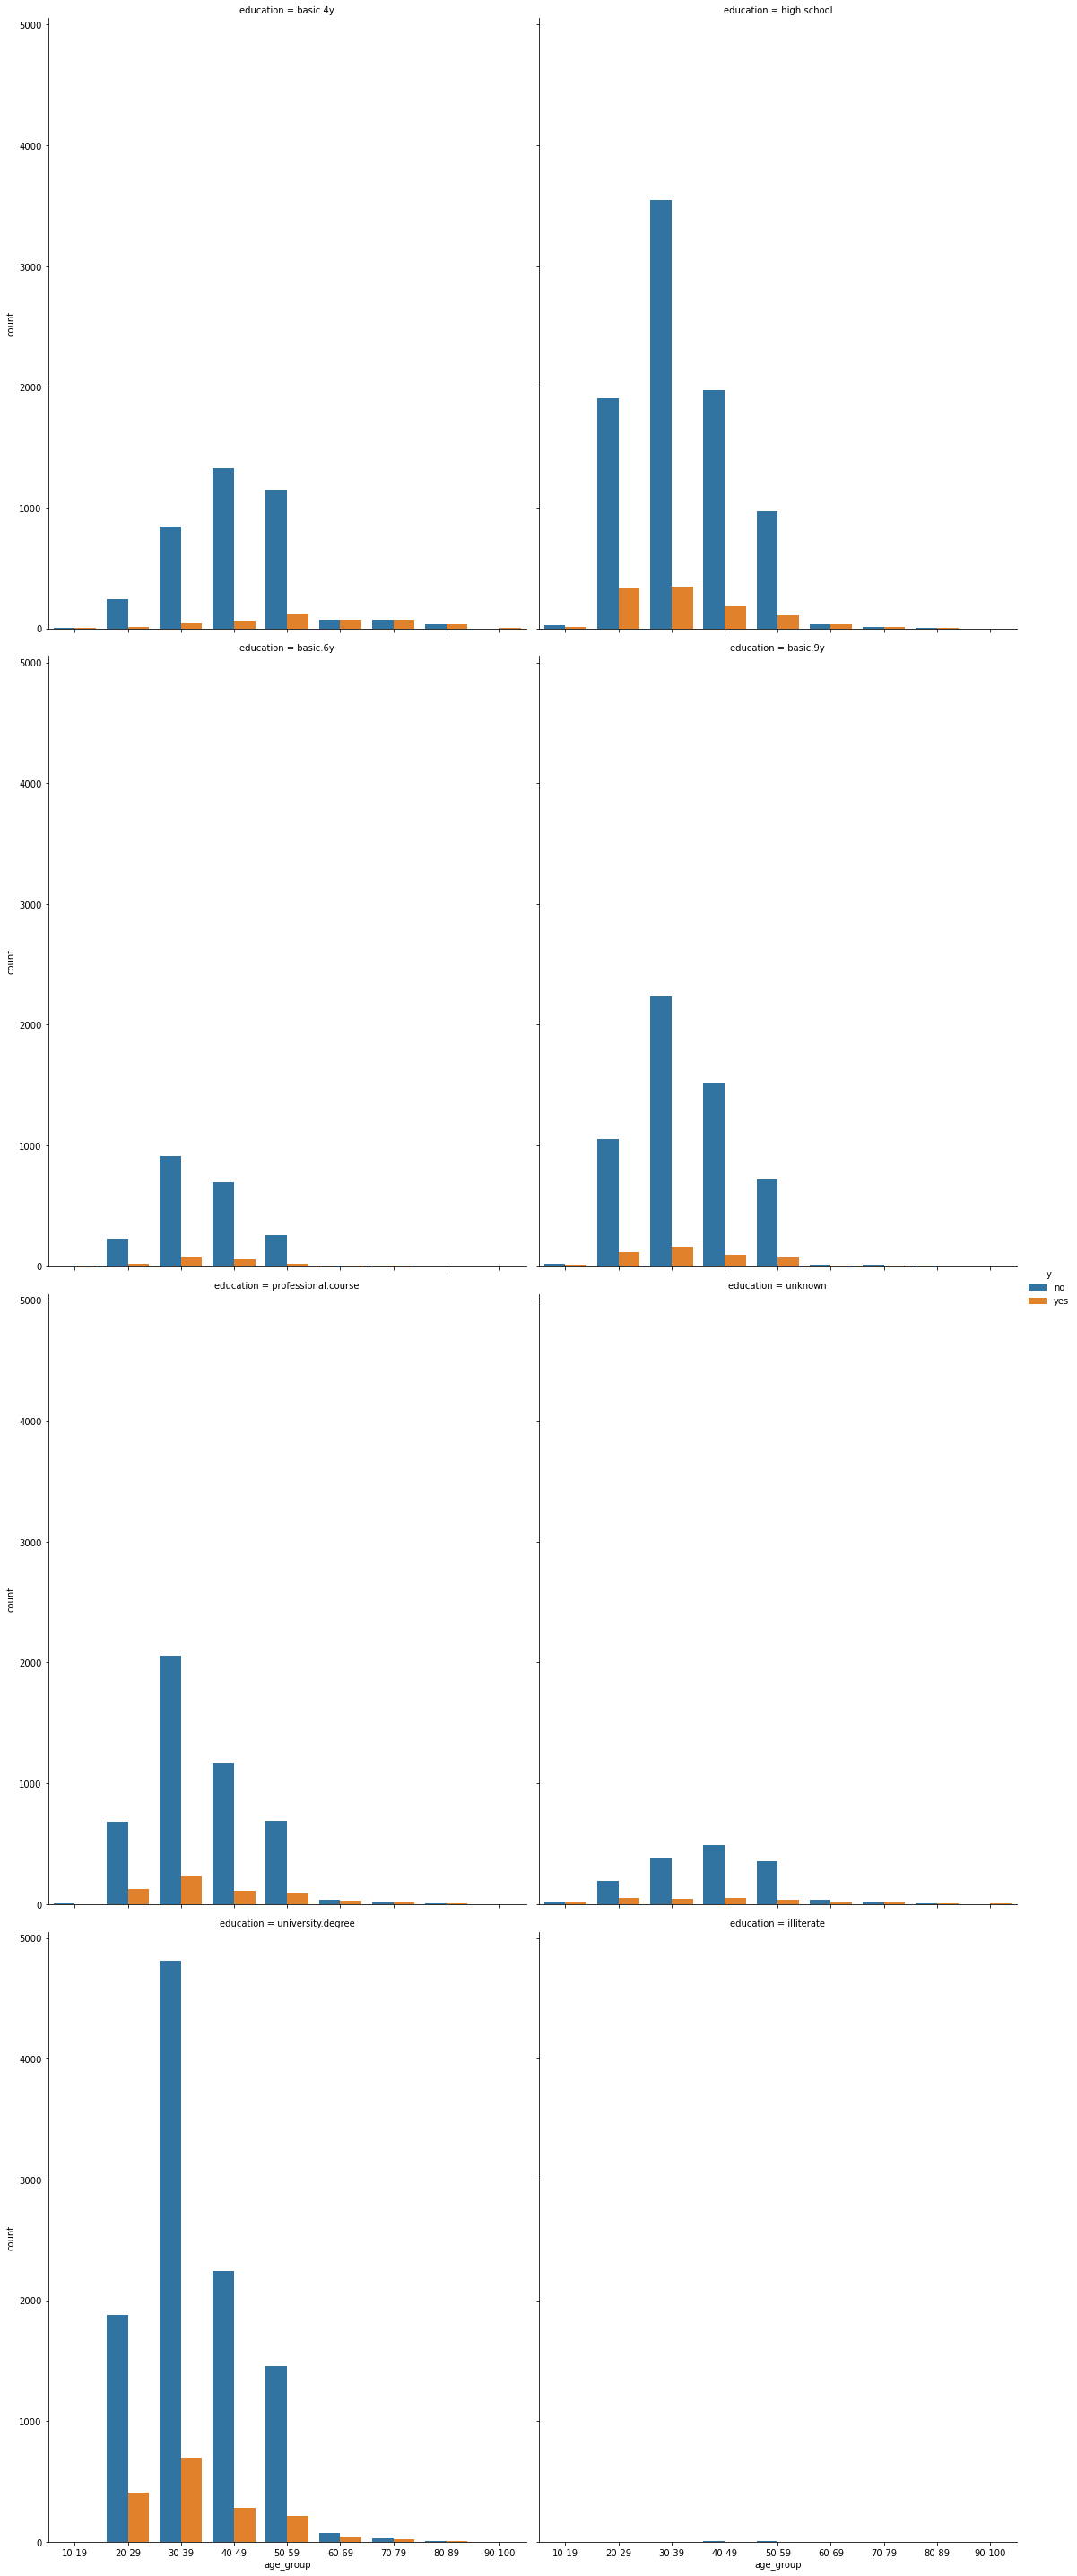

In [88]:
plotting_catplot('age_group','education')

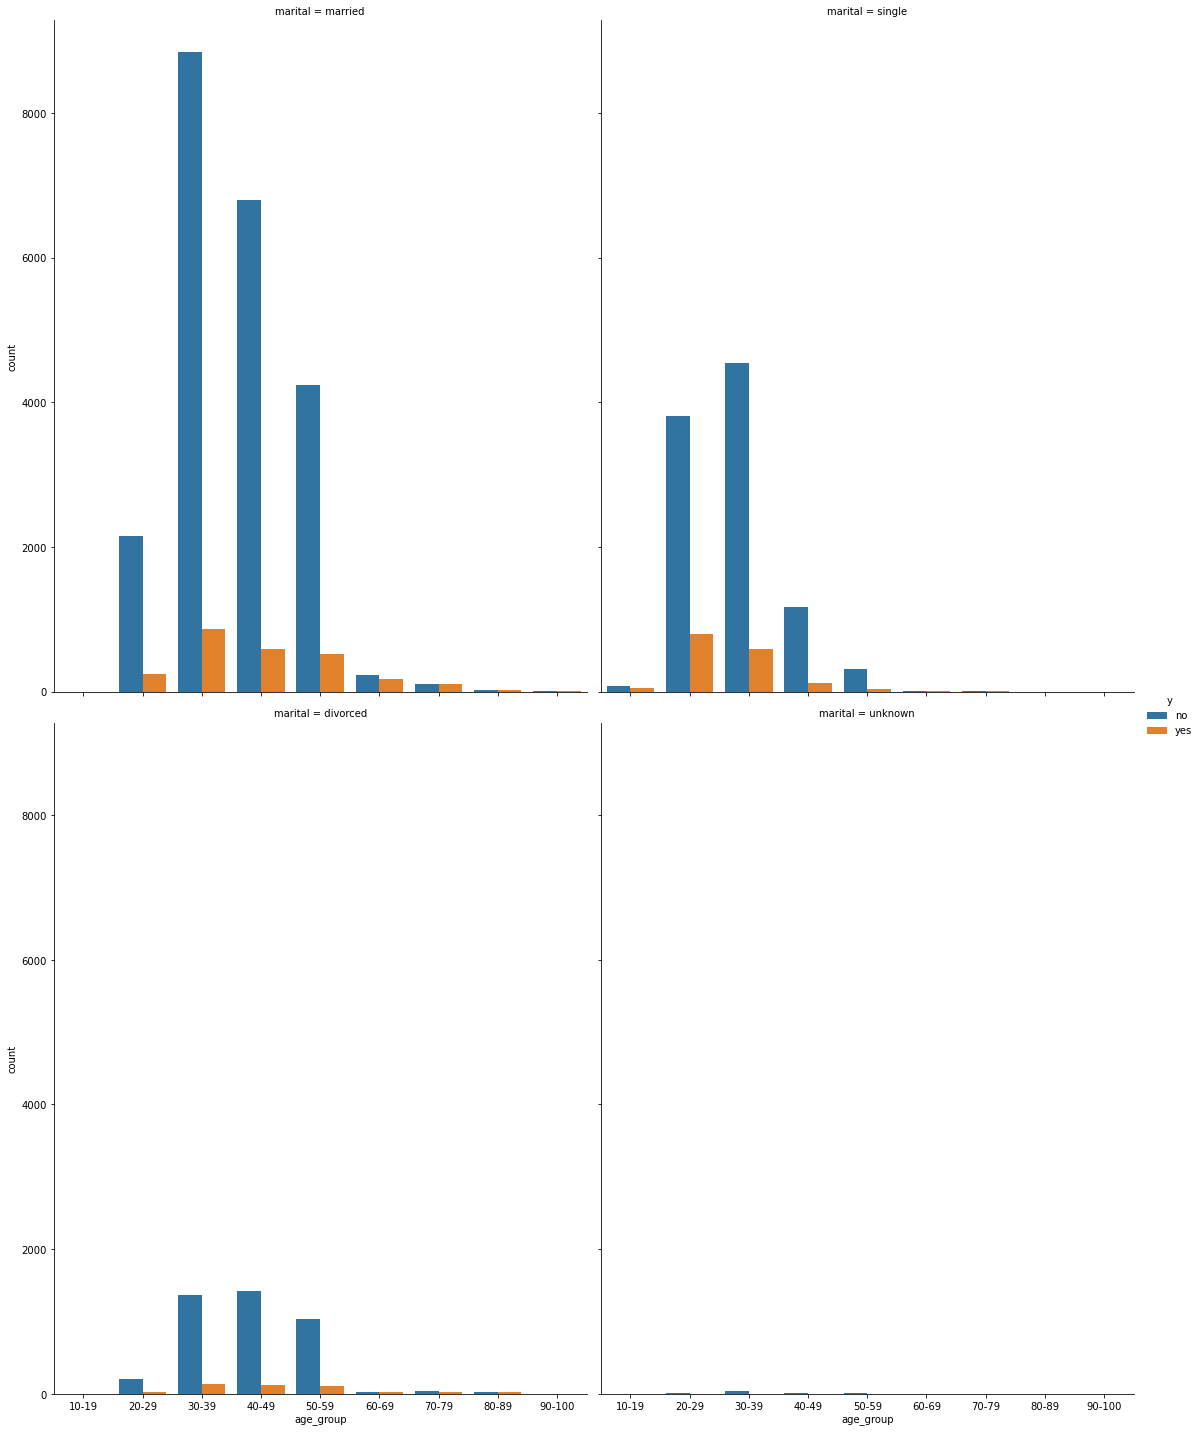

In [89]:
plotting_catplot('age_group','marital')

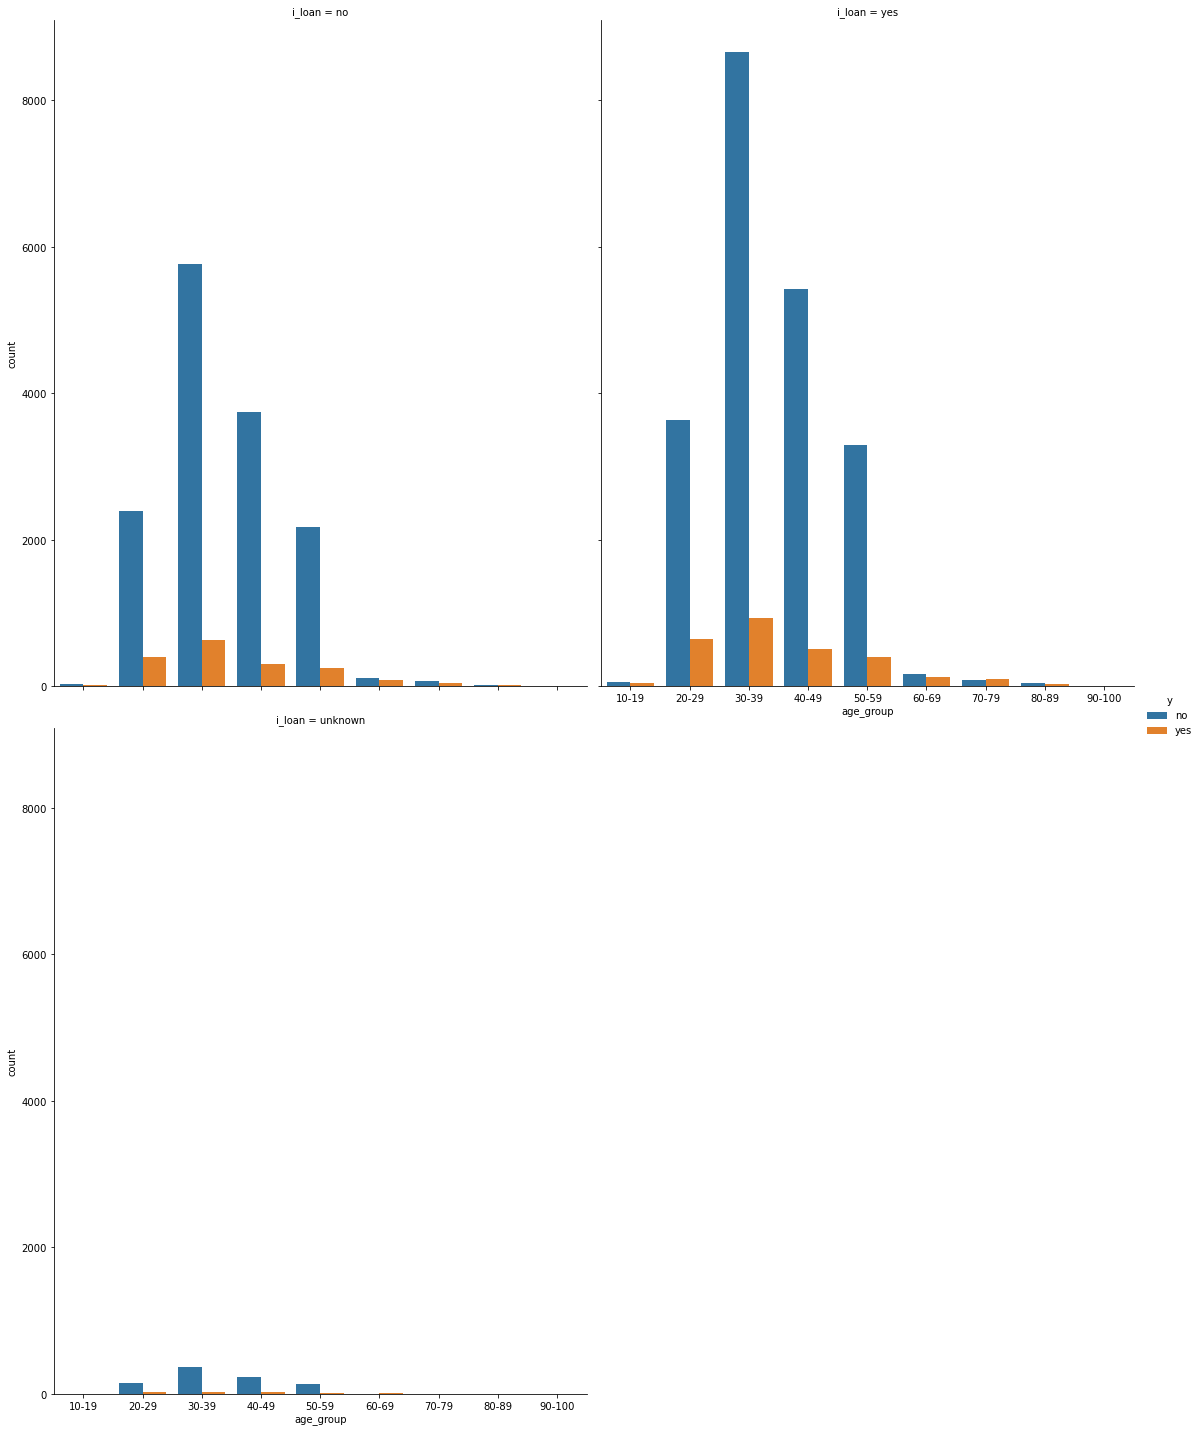

In [90]:
plotting_catplot('age_group','i_loan')

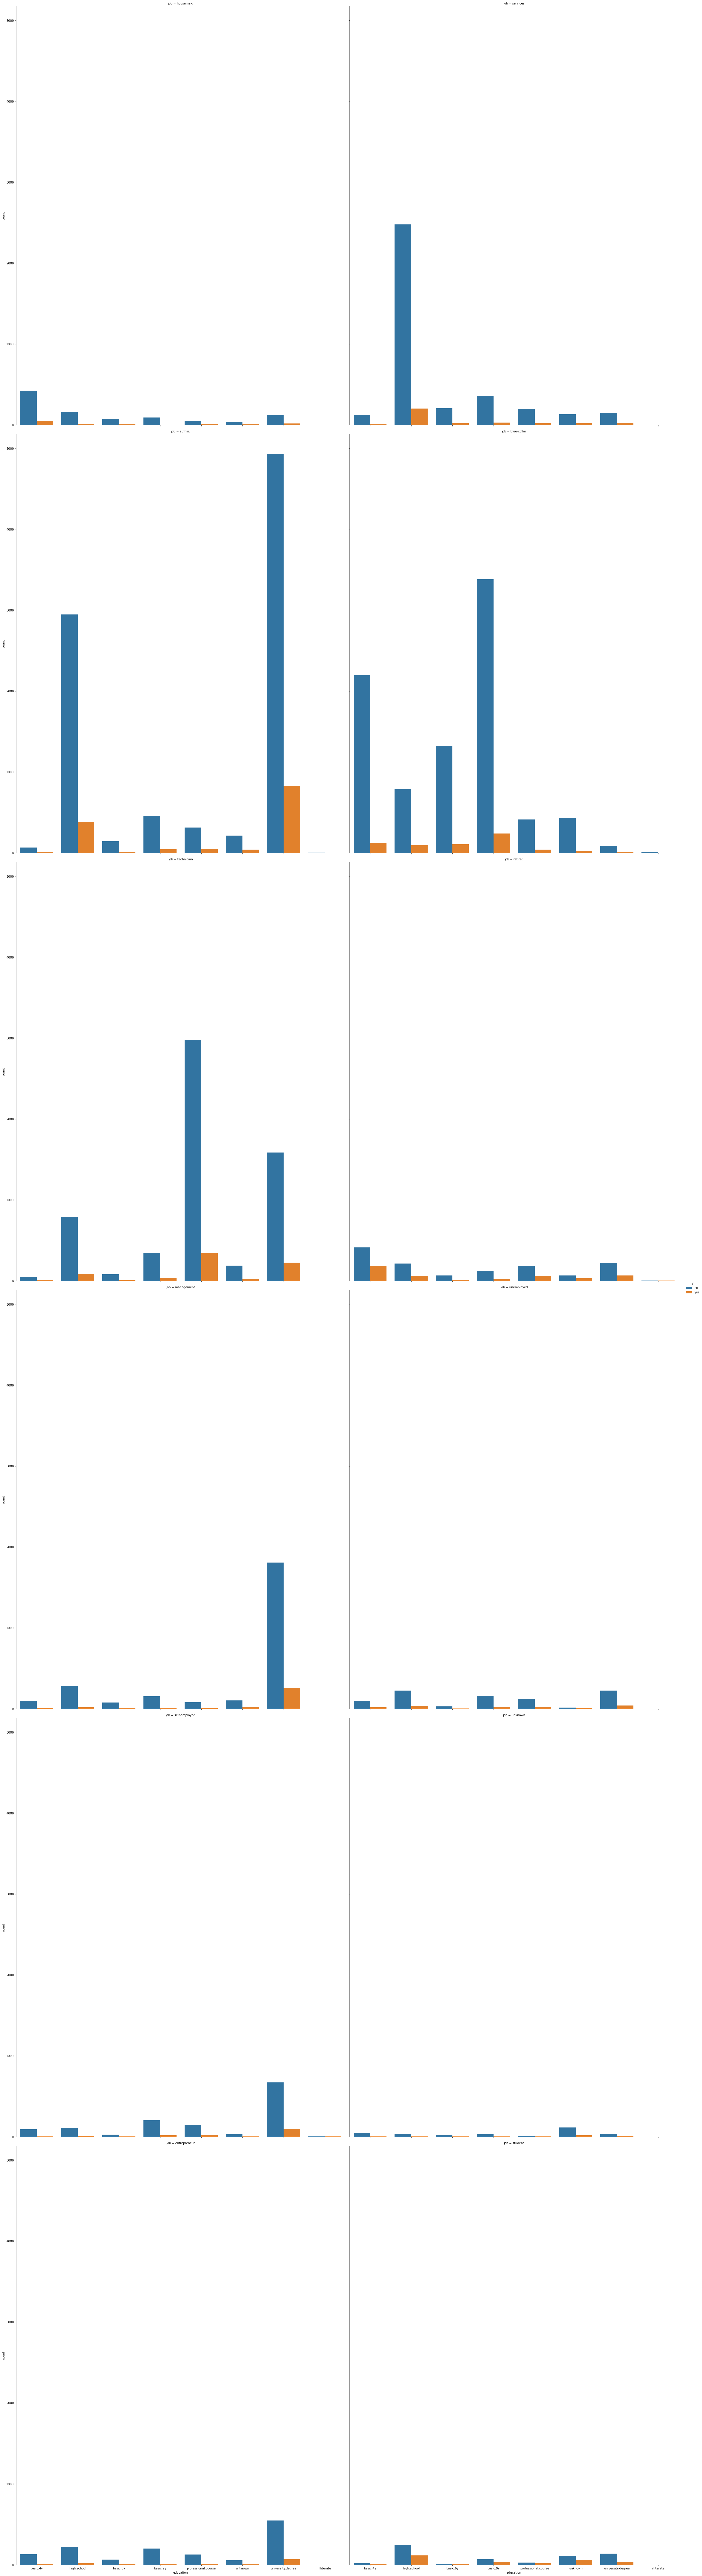

In [91]:
plotting_catplot('education','job',20)

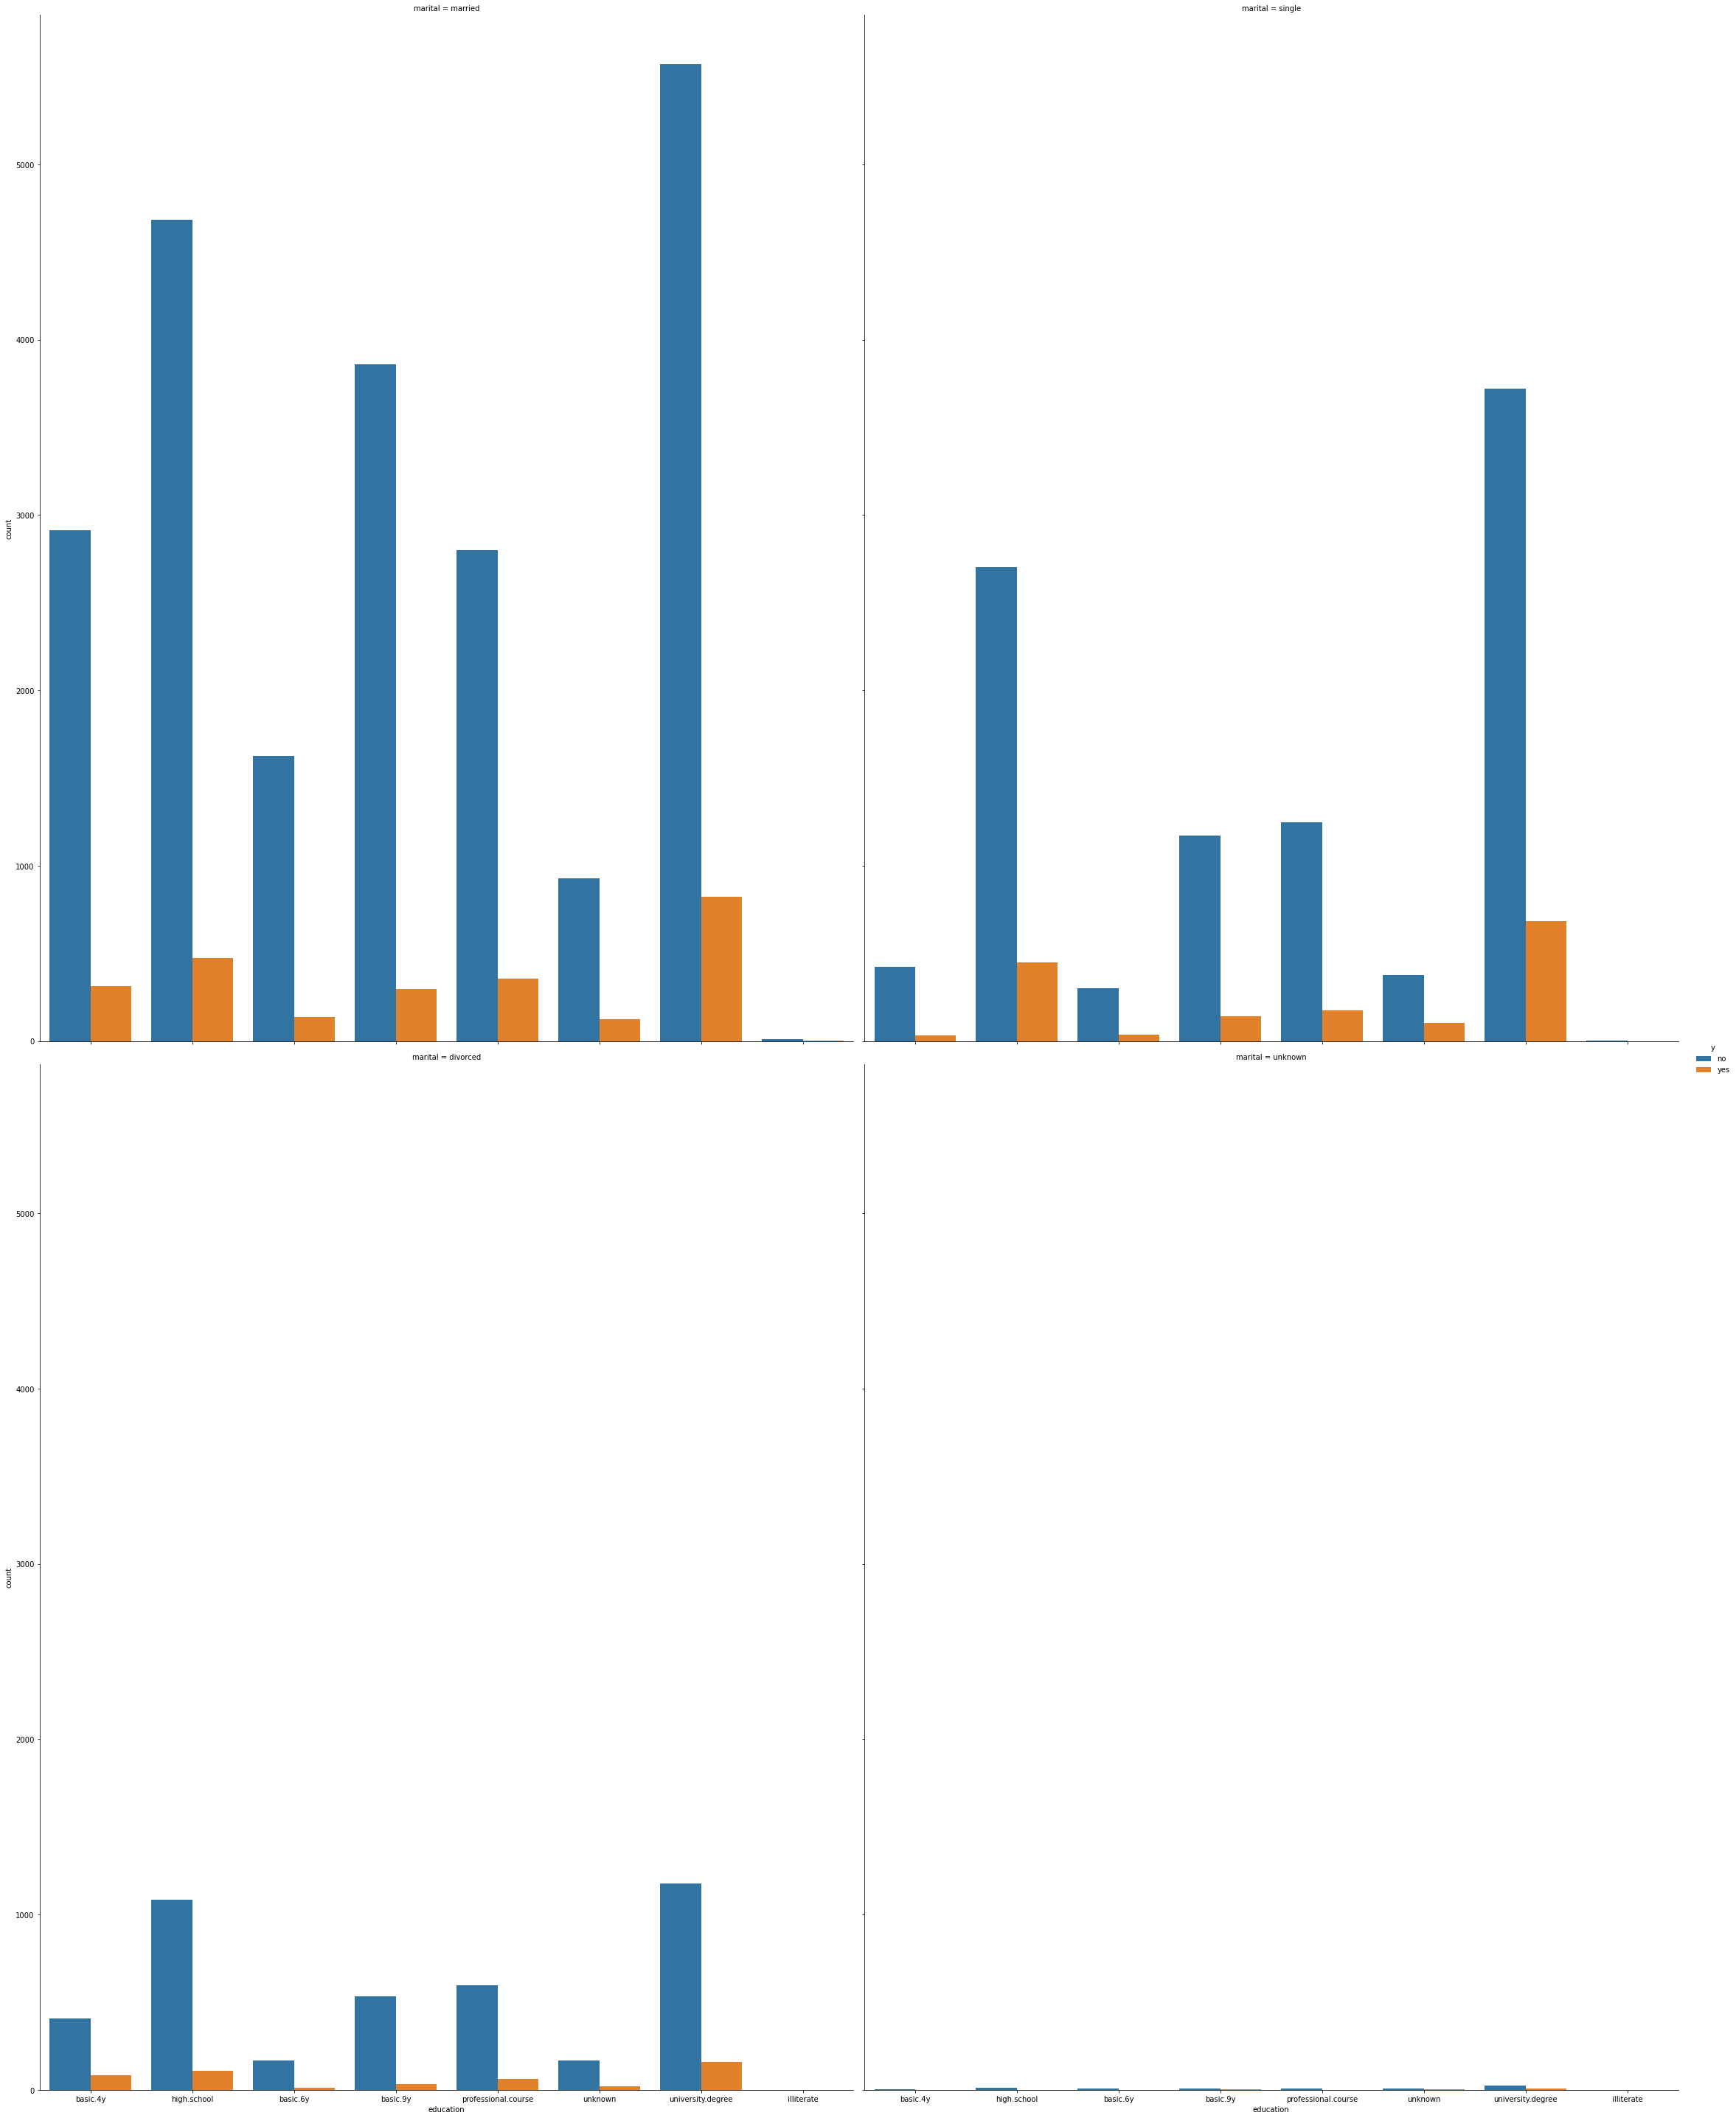

In [95]:
plotting_catplot('education','marital',20)

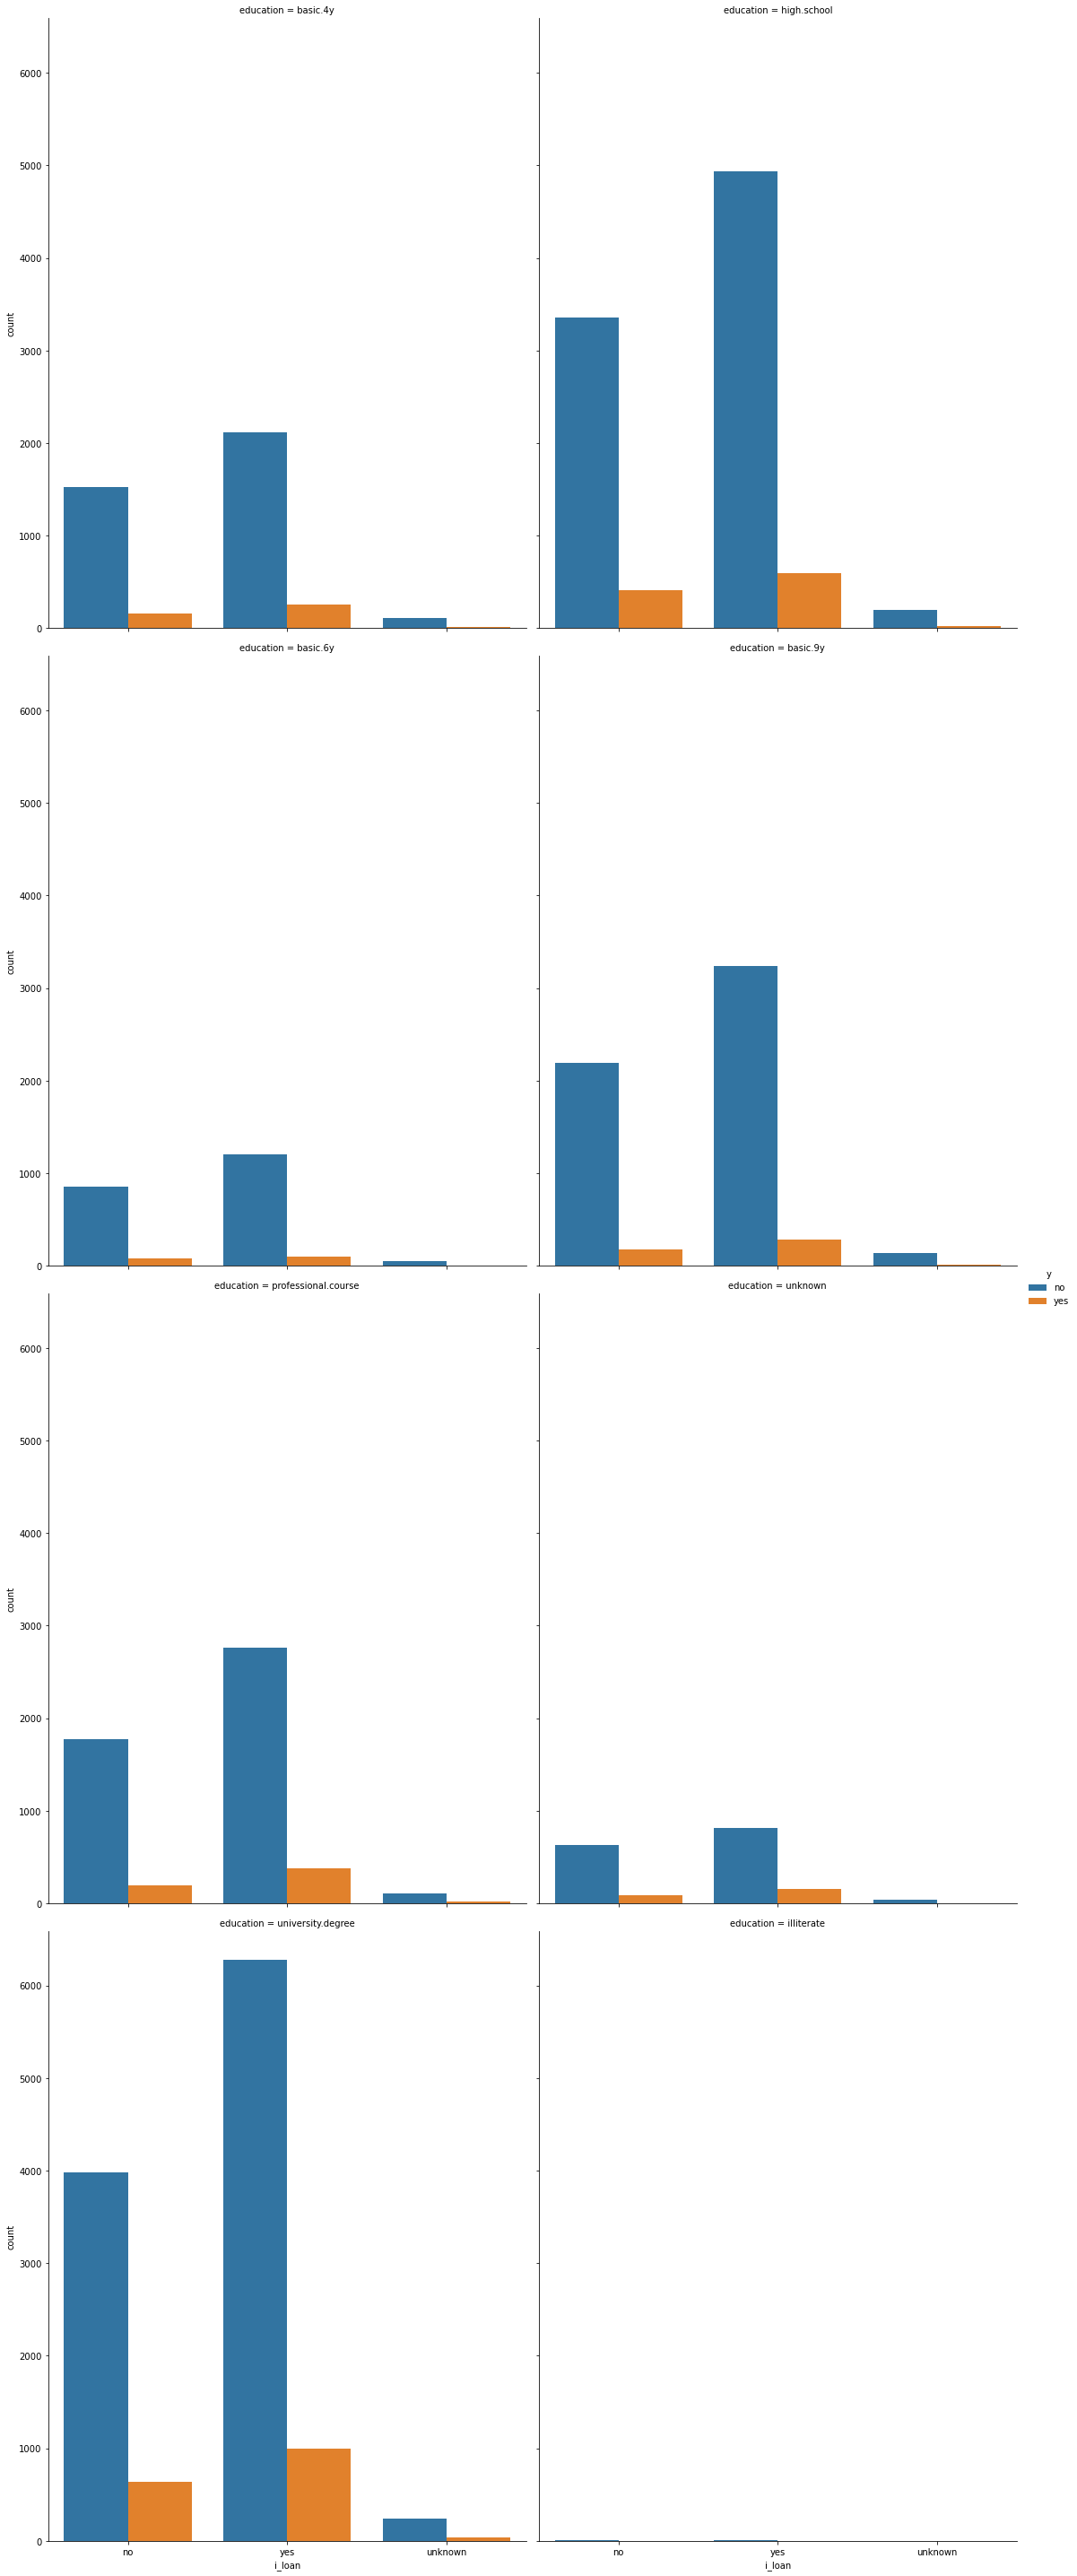

In [96]:
plotting_catplot('i_loan','education')

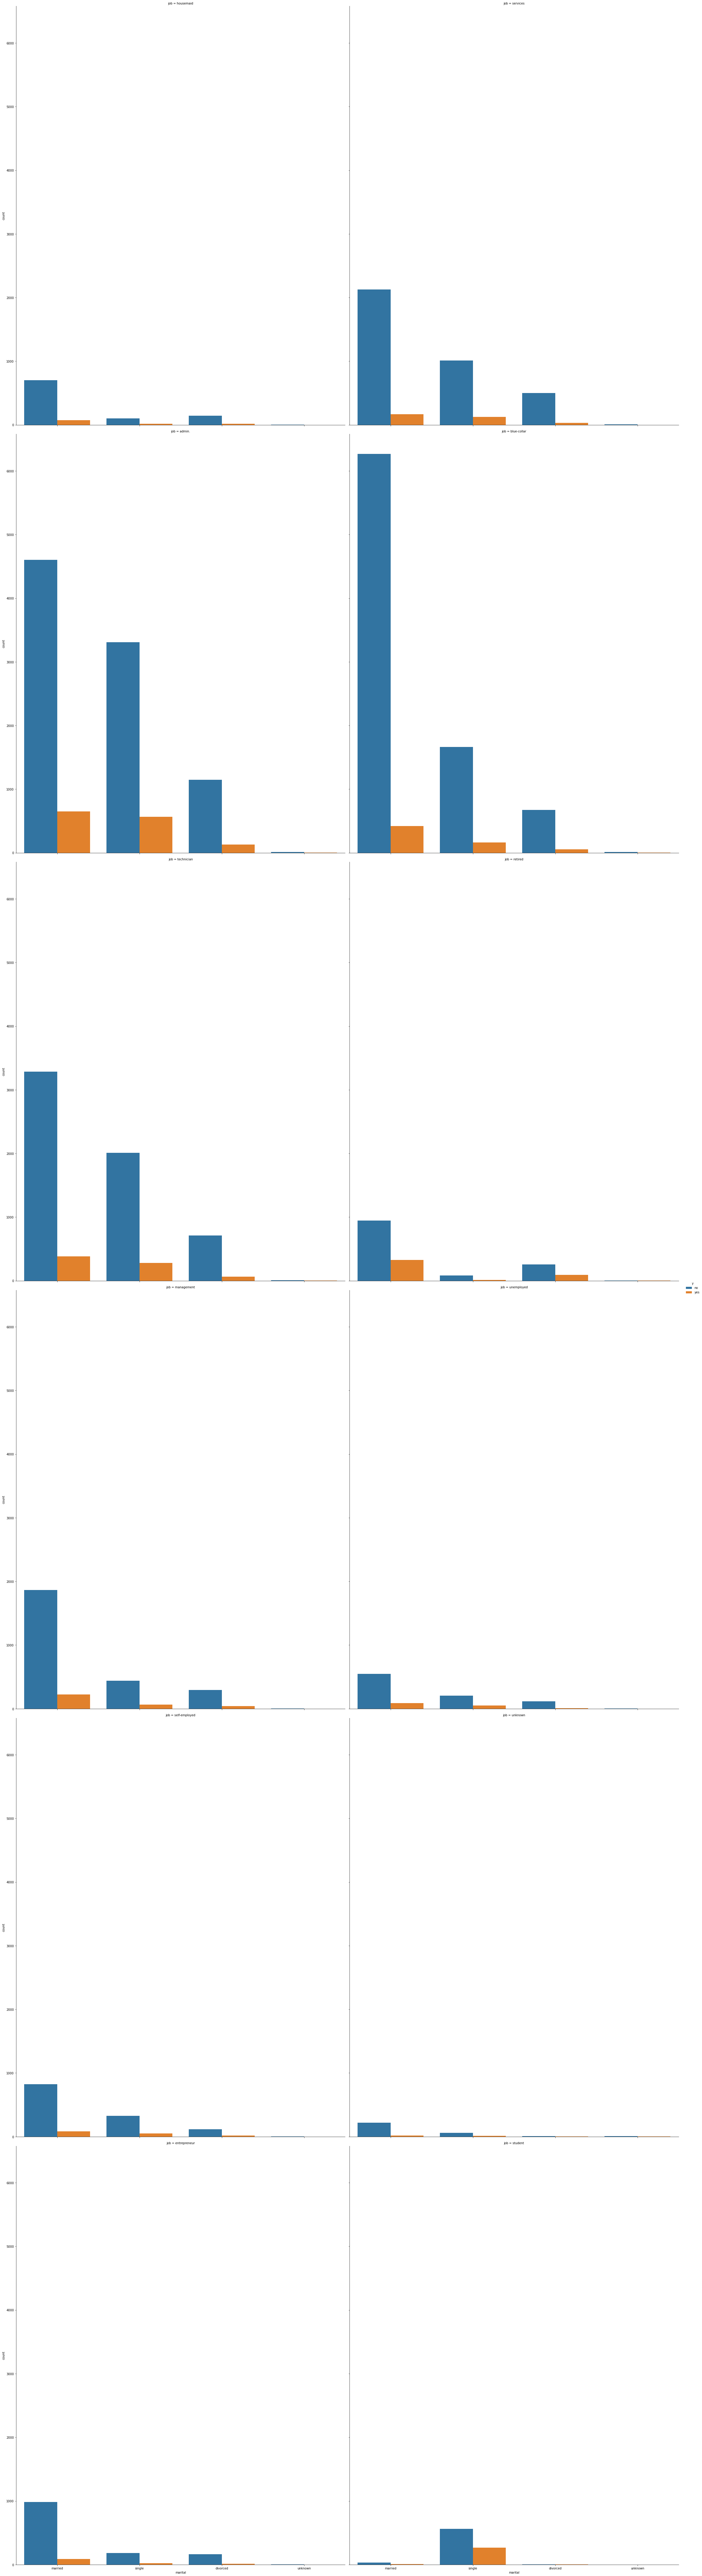

In [97]:
plotting_catplot('marital','job',20)

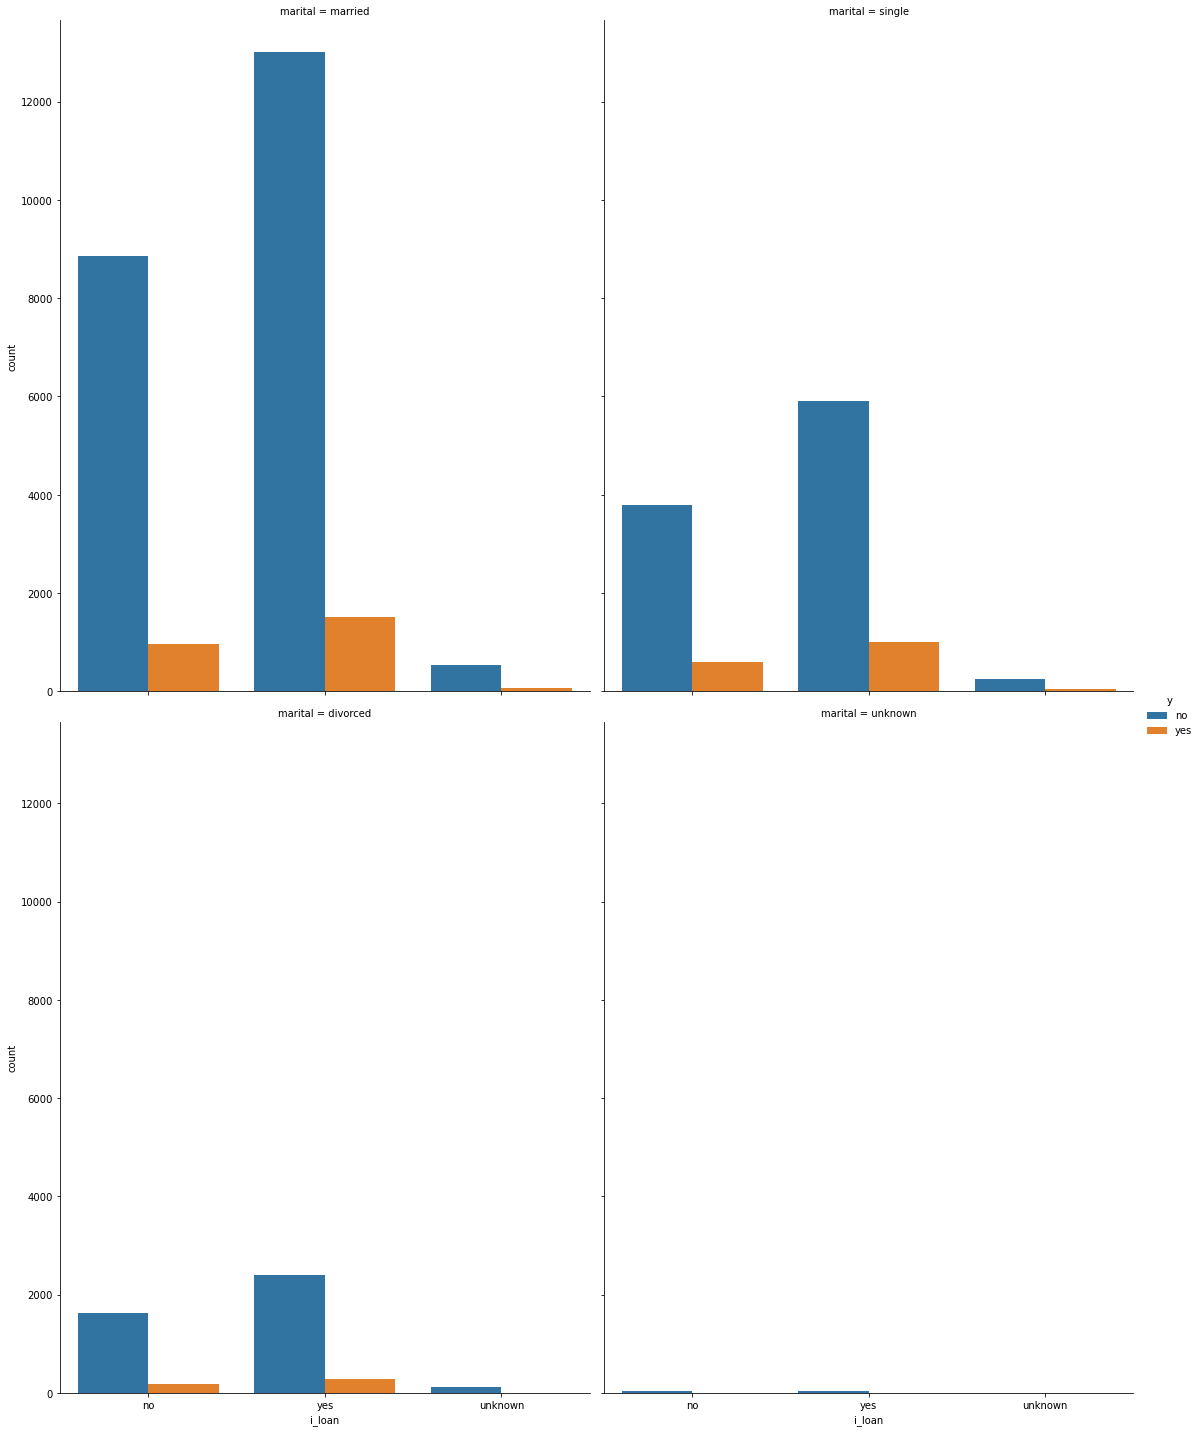

In [98]:
plotting_catplot('i_loan','marital')

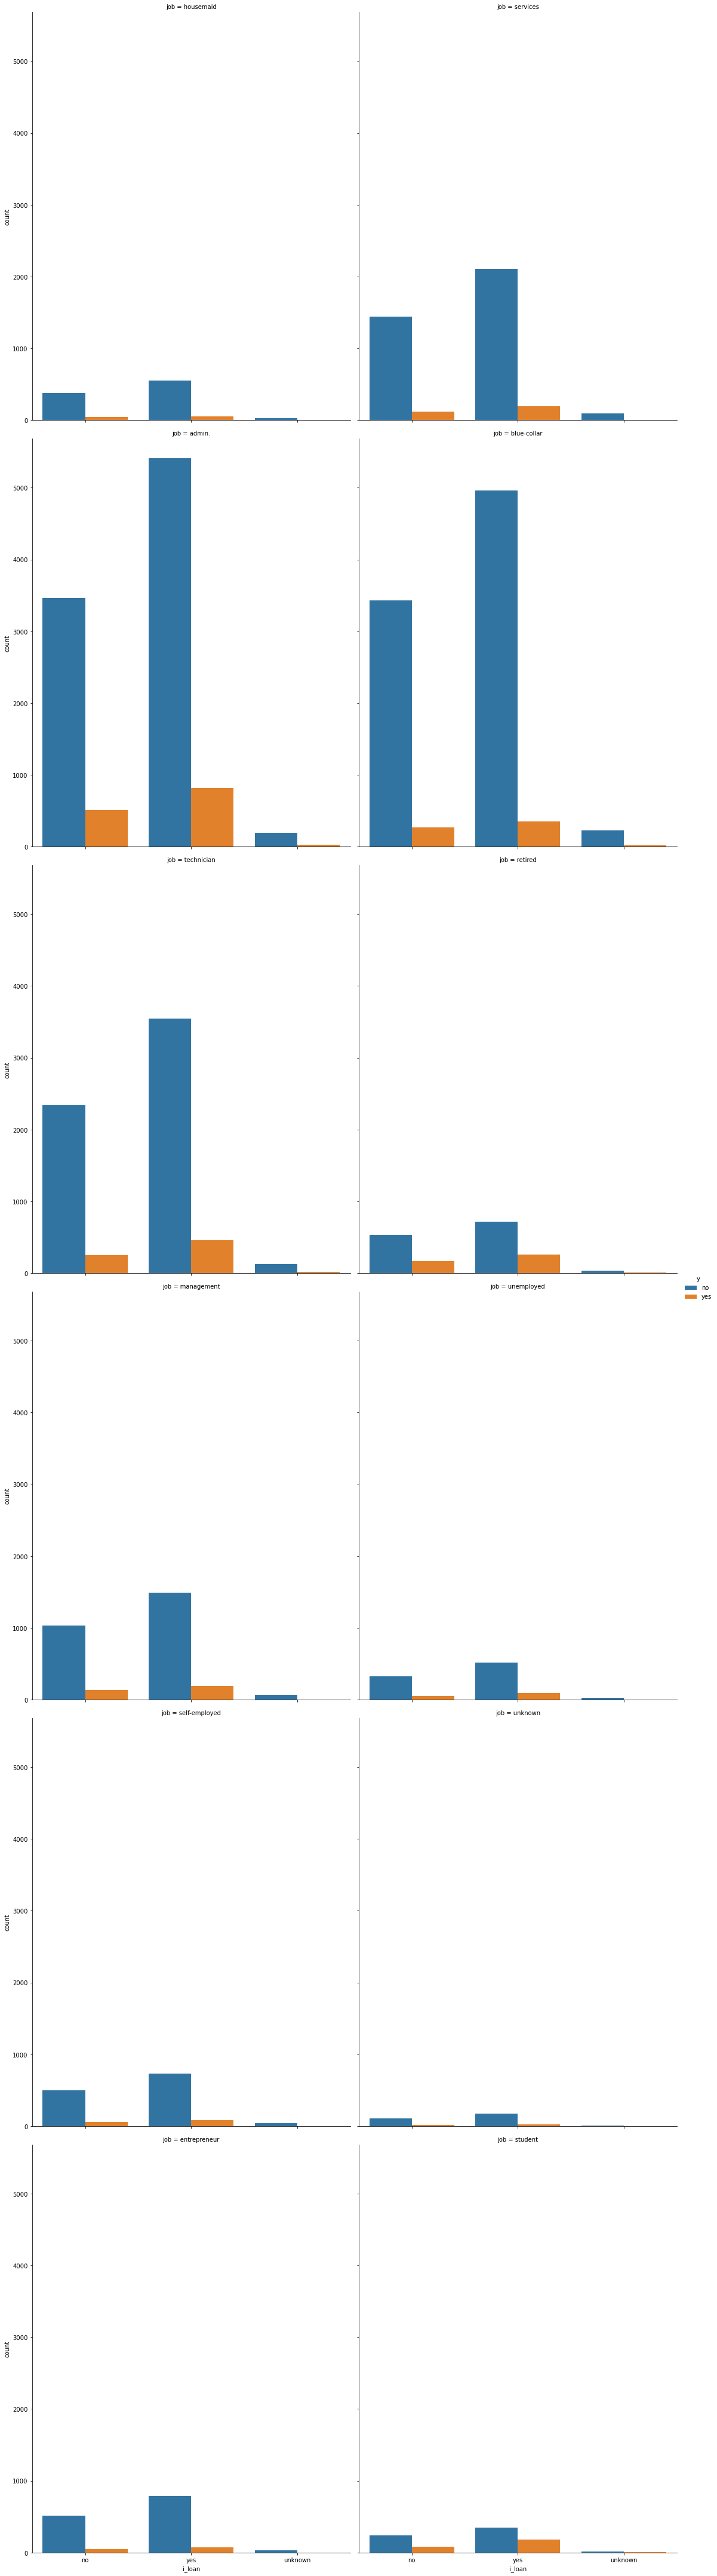

In [99]:
plotting_catplot('i_loan','job')

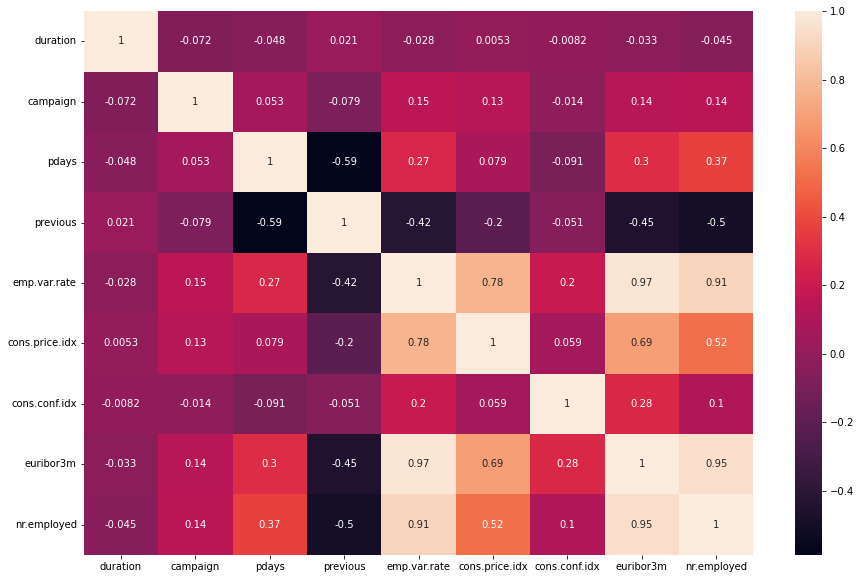

In [101]:
plotting_heatmap(df)

In [104]:
duplicate_data=df[df.duplicated(keep="last")]
print("Duplicate Data",duplicate_data.shape)
duplicate_data.head()

Duplicate Data (27, 20)


,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
440,30-39,technician,married,professional.course,unknown,yes,telephone,may,tue,264,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
737,40-49,admin.,married,high.school,no,no,telephone,may,tue,157,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1251,40-49,blue-collar,married,basic.4y,unknown,no,telephone,may,thu,190,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1265,30-39,blue-collar,married,basic.6y,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2011,30-39,admin.,married,high.school,no,yes,telephone,may,mon,115,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [105]:
df=df.drop_duplicates()
df.shape

(41161, 20)

In [106]:
#mapping the values into binary yes->1 and no->0
def target_variable_binary(y):
    y=y.replace({"yes":1,"no":0},inplace=True)

In [107]:
target_variable_binary(df['y'])

In [108]:
df.to_csv('age_iloan.csv',index=False)

In [109]:
df=pd.read_csv('age_iloan.csv',sep=",")
df.columns

Index(['age_group', 'job', 'marital', 'education', 'default', 'i_loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [110]:
df.tail()

,age_group,job,marital,education,default,i_loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41156,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41157,40-49,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41158,50-59,retired,married,university.degree,no,yes,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41159,40-49,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41160,70-79,retired,married,professional.course,no,yes,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [114]:
vif = df[['euribor3m', 'emp.var.rate', 'nr.employed','y']] 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif.values, i) 
                          for i in range(len(vif.columns))] 
  
print(vif_data)

        feature         VIF
0     euribor3m  105.020842
1  emp.var.rate   18.514590
2   nr.employed   83.194366
3             y    1.242344


In [115]:
target_variable = df['y']
df = df.drop('y',axis=1)

In [117]:
print("Target variable",target_variable.shape)
print("After dropping target variable",df.shape) 

Target variable (41161,)
After dropping target variable (41161, 19)


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df, target_variable, test_size=0.20, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(26342, 19)
(6586, 19)
(8233, 19)
(26342,)
(6586,)
(8233,)


In [124]:
#this function seperates the categorical and numerical columns which would be easier for us to encode and feature scaling.
""""this function takes the train dataset and based on the datatype it seperates the feature"""
def splitting_categorical_numerical_columns(data):
   
    categorical_feature=data.dtypes==object
    categorical_columns=data.columns[categorical_feature].tolist()
    numerical_feature=data.dtypes!=object
    numerical_columns=data.columns[numerical_feature].tolist()
    return categorical_columns,numerical_columns


In [125]:
catgeorical_columns,numerical_columns=splitting_categorical_numerical_columns(X_train)
print(catgeorical_columns)
print(numerical_columns)

['age_group', 'job', 'marital', 'education', 'default', 'i_loan', 'contact', 'month', 'day_of_week', 'poutcome']
['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [214]:
"""this function takes the train,cv and test dataset and first it converts it into log transformation and normalize the data
For log transformation we always need to add some constant to avoid getting infinity. Here I have considered 100 as constant."""
def feature_scaling_numerical(train,cv,test,required=False):
    
    train=np.log(100+train)
    cv=np.log(100+cv)
    test=np.log(100+test)
    if required==True:
        normalizer= Normalizer()
        
        normalizer.fit(train.values.reshape(-1,1))
        train=normalizer.transform(train.values.reshape(-1,1))
        train=train.reshape(-1,1)
        cv=normalizer.transform(cv.values.reshape(-1,1))
        cv=cv.reshape(-1,1)
        test=normalizer.transform(test.values.reshape(-1,1))
        test=test.reshape(-1,1)
    return train,cv,test


In [215]:
from sklearn.preprocessing import Normalizer

In [216]:
train_duration,cv_duration,test_duration=feature_scaling_numerical(X_train['duration'],X_cv['duration'],X_test['duration'],True)
train_campaign,cv_campaign,test_campaign=feature_scaling_numerical(X_train['campaign'],X_cv['campaign'],X_test['campaign'],True)

train_previous,cv_previous,test_previous=feature_scaling_numerical(X_train['previous'],X_cv['previous'],X_test['previous'],True)
train_emp,cv_emp,test_emp=feature_scaling_numerical(X_train['emp.var.rate'],X_cv['emp.var.rate'],X_test['emp.var.rate'],True)
train_cons_price,cv_cons_price,test_cons_price=feature_scaling_numerical(X_train['cons.price.idx'],X_cv['cons.price.idx'],X_test['cons.price.idx'],True)
train_cons_conf,cv_cons_conf,test_cons_conf=feature_scaling_numerical(X_train['cons.conf.idx'],X_cv['cons.conf.idx'],X_test['cons.conf.idx'],True)
train_euribor,cv_euribor,test_euribor=feature_scaling_numerical(X_train['euribor3m'],X_cv['euribor3m'],X_test['euribor3m'],True)
train_nr_employed,cv_nr_employed,test_nr_employed=feature_scaling_numerical(X_train['nr.employed'],X_cv['nr.employed'],X_test['nr.employed'],True)

In [217]:
def batch_predict(clf,data):
    y_data_pred=[]
    tr_loop=data.shape[0]-data.shape[0]%10000
    for i in range(0,tr_loop,10000):
        y_data_pred.extend(clf.predict_proba(data[i:i+10000])[:,1])
        
    if data.shape[0]%10000!=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [218]:
def find_best_threshold(threshold,fpr,tpr):
    t=threshold[np.argmax(tpr*(1-fpr))]
    
    #print("the maximum value of tpr*(1-fpr)",max(tpr*(1-fpr)),"for threshold",np.round(t,3))
    return t

def prediction_with_best_t(proba,threshold):
    #print("theshold",threshold)
    predictions=[]
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [238]:
from sklearn.metrics import confusion_matrix

In [219]:
"""this function takes the classifier object,train,test data send it to batch_predict function to calculate the class probablity
belonging to class 1 append the probablity to the list and return it as a list. Then we calculate tpr and fpr values and plot it 
also calculating to get auc score Along printing the confusion matrix of both train and test data of metaclassifier"""
def calculating_roc_auc_score(classifier,train,test,y_train,y_test):
    classifier.fit(train,y_train)
    y_train_predict=batch_predict(classifier,train)
    y_test_predict=batch_predict(classifier,test)
    train_fpr,train_tpr,train_threshold=roc_curve(y_train,y_train_predict)
    test_fpr,test_tpr,test_threshold=roc_curve(y_test,y_test_predict)
    plt.pyplot.plot(train_fpr,train_tpr,label='Train ROC Curve')
    plt.pyplot.plot(test_fpr,test_tpr,label='Test ROC Curve')
    plt.pyplot.legend()
    plt.pyplot.xlabel('FPR')
    plt.pyplot.ylabel('TPR')
    plt.pyplot.title('TPR vs FPR graph')
    plt.pyplot.grid()
    plt.pyplot.show()

 
    print("Train AUC Score",auc(train_fpr,train_tpr))
    print("Test AUC Score",auc(test_fpr,test_tpr))
    print()
    print()
  
  #Printing Confusion matrix on train and test dataset
    fig=plt.pyplot.figure()
    ax=fig.add_subplot(111)
    best_t= find_best_threshold(train_threshold,train_fpr,train_tpr)
    print("Train Confusion Matrix")
    y_train_predicti=prediction_with_best_t(y_train_predict,best_t)
    train_matrix=confusion_matrix(y_train,y_train_predicti)
    sns.heatmap(train_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax)
    print()
    fig=plt.pyplot.figure()
    ax1=fig.add_subplot(111)
    print("Test Cofusion Matrix")
    y_test_predicti=prediction_with_best_t(y_test_predict,best_t)
    test_matrix=confusion_matrix(y_test,y_test_predicti)
    sns.heatmap(test_matrix,annot=True,fmt='d')
    plt.pyplot.show(ax1)

In [220]:
def count_vectorizing_categorical(train,cv,test):
    """"token pattern is used because count vectorizer without token considers only
2 letters and use punctuation marks as seperator but in some of our categories in categorical columns
contains punctuations and we dont want to use it as seperator. """
   
    countVectorizer=CountVectorizer(token_pattern="[a-zA-Z0-9-.]+")
    train=countVectorizer.fit_transform(train)
    cv=countVectorizer.transform(cv)
    test=countVectorizer.transform(test)
    

    return train,cv,test

In [222]:
from sklearn.feature_extraction.text import CountVectorizer

In [223]:
train_age,cv_age,test_age=count_vectorizing_categorical(X_train['age_group'],X_cv['age_group'],X_test['age_group'])
train_job,cv_job,test_job=count_vectorizing_categorical(X_train['job'],X_cv['job'],X_test['job'])
train_marital,cv_marital,test_marital=count_vectorizing_categorical(X_train['marital'],X_cv['marital'],X_test['marital'])
train_education,cv_education,test_education=count_vectorizing_categorical(X_train['education'],X_cv['education'],X_test['education'])
train_default,cv_default,test_default=count_vectorizing_categorical(X_train['default'],X_cv['default'],X_test['default'])
train_iloan,cv_iloan,test_iloan=count_vectorizing_categorical(X_train['i_loan'],X_cv['i_loan'],X_test['i_loan'])
train_contact,cv_contact,test_contact=count_vectorizing_categorical(X_train['contact'],X_cv['contact'],X_test['contact'])
train_month,cv_month,test_month=count_vectorizing_categorical(X_train['month'],X_cv['month'],X_test['month'])
train_day,cv_day,test_day=count_vectorizing_categorical(X_train['day_of_week'],X_cv['day_of_week'],X_test['day_of_week'])
train_poutcome,cv_poutcome,test_poutcome=count_vectorizing_categorical(X_train['poutcome'],X_cv['poutcome'],X_test['poutcome'])

In [225]:
from scipy.sparse import hstack

In [226]:
x_train_ohe_d=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_duration,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe_d.shape)
x_cv_ohe_d=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_duration,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe_d.shape)
x_test_ohe_d=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_duration,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe_d.shape)

(26342, 67)
(6586, 67)
(8233, 67)


In [234]:
import tqdm.notebook as tq
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [235]:
strategy=["uniform","prior","stratified","most_frequent"]
cv_auc=[]
for star in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=star)
    
    sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")
    sig_clf.fit(x_train_ohe_d, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe_d)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/4 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


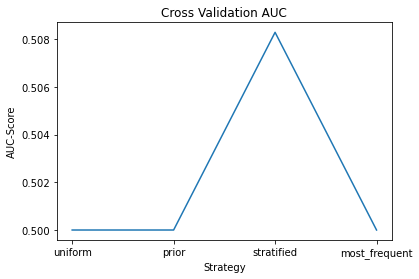

In [236]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(strategy,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Strategy")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


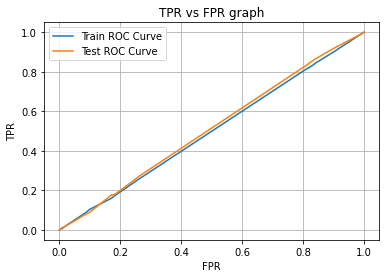

Train AUC Score 0.49892939727986013
Test AUC Score 0.5111444231610816


Train Confusion Matrix


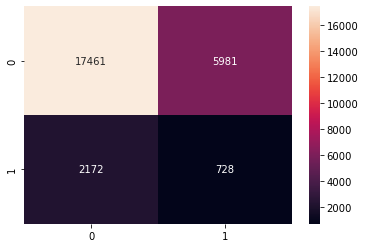


Test Cofusion Matrix


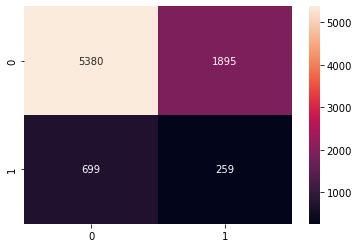

In [239]:
dummy_clf = DummyClassifier(strategy="stratified")
sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")

calculating_roc_auc_score(sig_clf,x_train_ohe_d,x_test_ohe_d,y_train,y_test)

In [241]:
from sklearn.metrics import f1_score

In [242]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe_d), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe_d), average='macro'))

Train F1-Score: 0.47087417644223045
Test F1-Score: 0.4691127160175393


In [243]:
x_train_ohe=hstack((train_age,train_job,train_marital,train_education,train_default,train_iloan,train_contact,train_month,train_day,train_poutcome,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed)).tocsr()
print(x_train_ohe.shape)
x_cv_ohe=hstack((cv_age,cv_job,cv_marital,cv_education,cv_default,cv_iloan,cv_contact,cv_month,cv_day,cv_poutcome,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed)).tocsr()
print(x_cv_ohe.shape)
x_test_ohe=hstack((test_age,test_job,test_marital,test_education,test_default,test_iloan,test_contact,test_month,test_day,test_poutcome,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed)).tocsr()
print(x_test_ohe.shape)

(26342, 66)
(6586, 66)
(8233, 66)


In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [246]:
neighbours=[k for k in range(1,23,2)]
cv_auc=[]
for k in neighbours:
    knn=KNeighborsClassifier(n_neighbors=k)
    print(k)
    sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
    sig_clf.fit(x_train_ohe, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

1
3
5
7
9
11
13
15
17
19
21


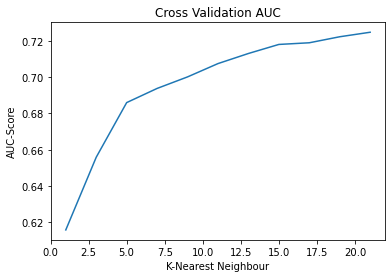

In [247]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(neighbours,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("K-Nearest Neighbour")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

In [248]:
index_of_best_auc=np.argmax(cv_auc)
print("Best K ",neighbours[index_of_best_auc])

Best K  21


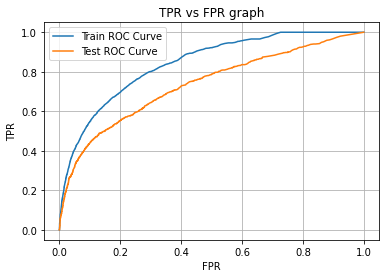

Train AUC Score 0.840503222921429
Test AUC Score 0.734461471134738


Train Confusion Matrix


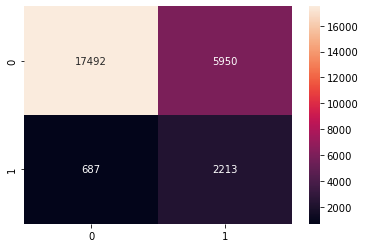


Test Cofusion Matrix


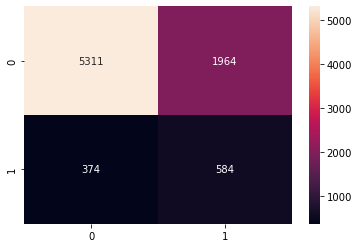

In [249]:
knn=KNeighborsClassifier(n_neighbors=21)

sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [250]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.5822355697971013
Test F1-Score: 0.5541114599974937


In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    lr=LogisticRegression(penalty='l2',C=value,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(x_train_ohe, y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/9 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

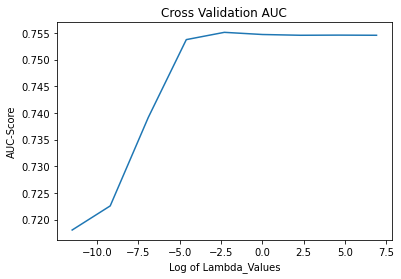

In [254]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

In [255]:
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

Best lambda 0.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

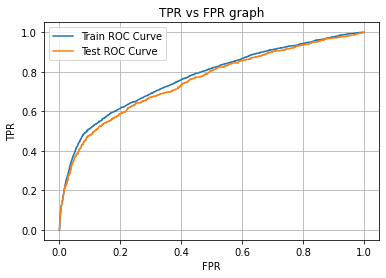

Train AUC Score 0.7704542759973994
Test AUC Score 0.7530122176068413


Train Confusion Matrix


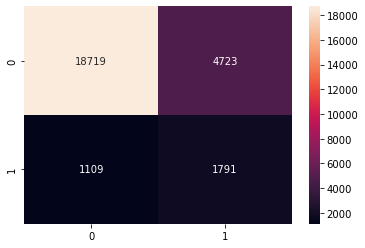


Test Cofusion Matrix


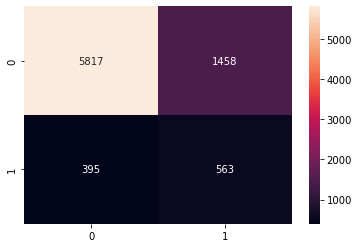

In [256]:
lr=LogisticRegression(penalty='l2',C=0.1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [257]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.6135634424150975
Test F1-Score: 0.6142478756159598


In [258]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier

In [259]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    log = SGDClassifier(loss='log',penalty='l2',alpha=value,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(log, method="sigmoid")
    sig_clf.fit(x_train_ohe,y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/9 [00:00<?, ?it/s]

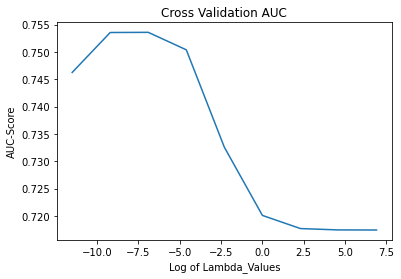

Best lambda 0.001


In [260]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

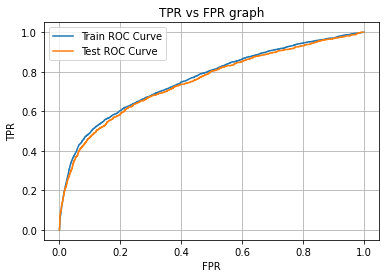

Train AUC Score 0.7629701258277951
Test AUC Score 0.7511047500161419


Train Confusion Matrix


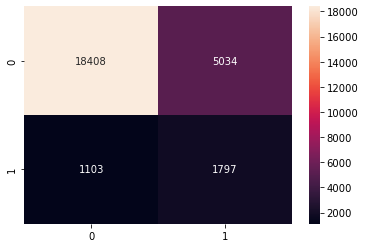


Test Cofusion Matrix


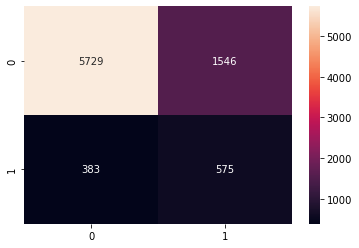

In [261]:
log=SGDClassifier(loss='log',penalty='l2',alpha=1e-05,class_weight='balanced')

sig_clf = CalibratedClassifierCV(log, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [262]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.573996829251267
Test F1-Score: 0.5784302169713433


In [263]:
from sklearn.svm import SVC

In [264]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    SVM = SGDClassifier(penalty='l2',alpha=value,class_weight='balanced')
   
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(x_train_ohe,y_train)
    predict_y = sig_clf.predict_proba(x_cv_ohe)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/9 [00:00<?, ?it/s]

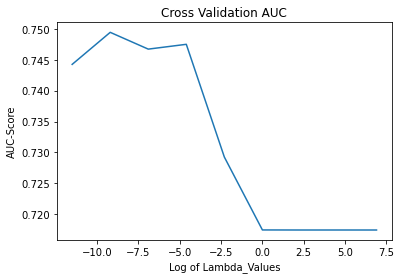

Best lambda 0.0001


In [265]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

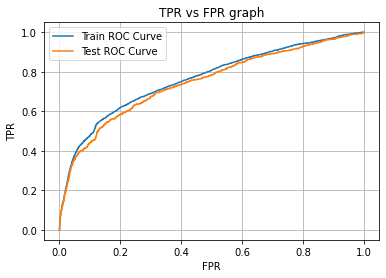

Train AUC Score 0.76402873269022
Test AUC Score 0.7460334746644283


Train Confusion Matrix


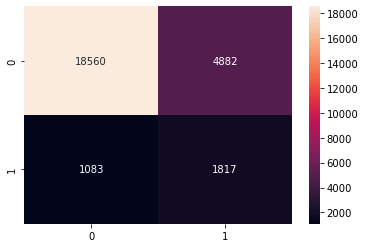


Test Cofusion Matrix


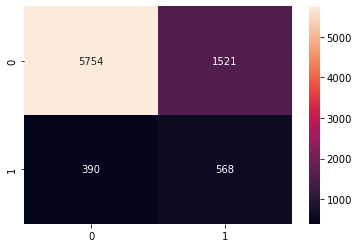

In [266]:
SVM=SGDClassifier(penalty='l2',alpha=0.001,class_weight='balanced')

sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
sig_clf.fit(x_train_ohe, y_train)
calculating_roc_auc_score(sig_clf,x_train_ohe,x_test_ohe,y_train,y_test)

In [267]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(x_train_ohe), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(x_test_ohe), average='macro'))

Train F1-Score: 0.5922824126393228
Test F1-Score: 0.589370880690202


In [268]:
train_dataset=np.hstack((train_age.toarray(),train_job.toarray(),train_marital.toarray(),train_education.toarray(),train_default.toarray(),train_iloan.toarray(),train_contact.toarray(),train_month.toarray(),train_day.toarray(),train_poutcome.toarray(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_dataset.shape)
cv_dataset=np.hstack((cv_age.toarray(),cv_job.toarray(),cv_marital.toarray(),cv_education.toarray(),cv_default.toarray(),cv_iloan.toarray(),cv_contact.toarray(),cv_month.toarray(),cv_day.toarray(),cv_poutcome.toarray(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_dataset.shape)
test_dataset=np.hstack((test_age.toarray(),test_job.toarray(),test_marital.toarray(),test_education.toarray(),test_default.toarray(),test_iloan.toarray(),test_contact.toarray(),test_month.toarray(),test_day.toarray(),test_poutcome.toarray(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_dataset.shape)

(26342, 66)
(6586, 66)
(8233, 66)


In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    random=RandomForestClassifier(n_estimators=estimator,random_state=42,n_jobs=-1,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(random, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/8 [00:00<?, ?it/s]

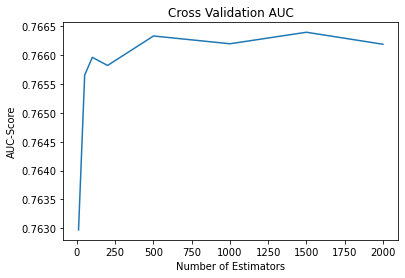

Best number of estimators 1500


In [271]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

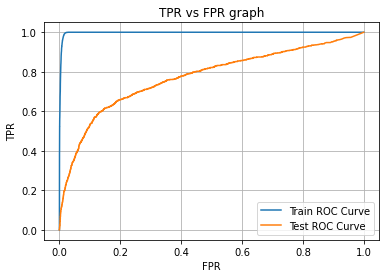

Train AUC Score 0.9977156459522989
Test AUC Score 0.772352552927419


Train Confusion Matrix


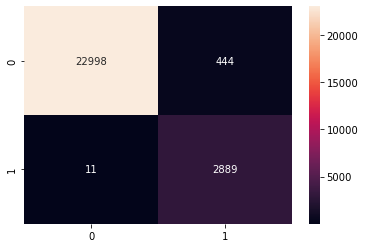


Test Cofusion Matrix


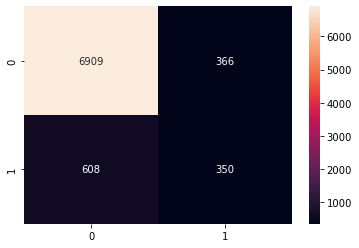

In [272]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,class_weight='balanced')
random.fit(train_dataset,y_train)
sig_clf = CalibratedClassifierCV(random, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [273]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.8564095167566708
Test F1-Score: 0.6029186732240597


In [275]:
from xgboost  import XGBClassifier

In [276]:
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    xgboost=XGBClassifier(n_estimators=estimator,random_state=42,n_thread=-1,class_weight='balanced')
    
    sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/8 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:46:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


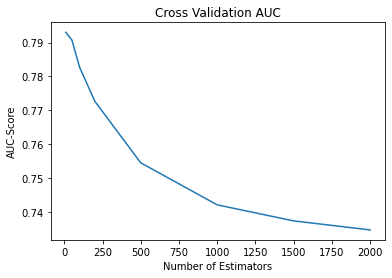

Best number of estimators 10


In [277]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:47:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


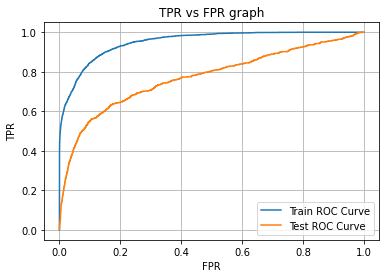

Train AUC Score 0.9513185220161867
Test AUC Score 0.771359217728802


Train Confusion Matrix


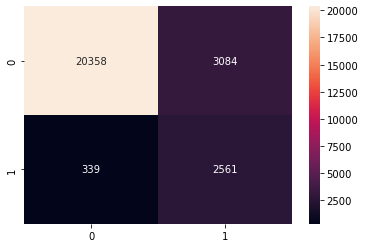


Test Cofusion Matrix


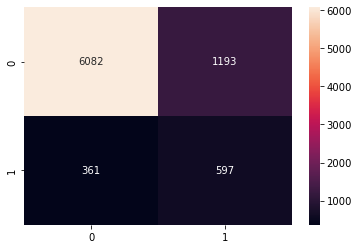

In [278]:
from xgboost  import XGBClassifier
xgboost=XGBClassifier(n_estimators=200,random_state=42,n_thread=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [279]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.767916659189958
Test F1-Score: 0.6230139139901992


In [280]:
from sklearn.ensemble import AdaBoostClassifier

In [281]:
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    adaboost=AdaBoostClassifier(n_estimators=estimator,random_state=42)
    
    sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
    sig_clf.fit(train_dataset,y_train)
    predict_y = sig_clf.predict_proba(cv_dataset)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/8 [00:00<?, ?it/s]

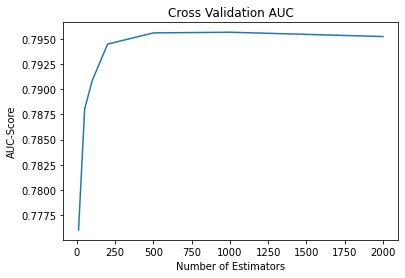

Best number of estimators 1000


In [282]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

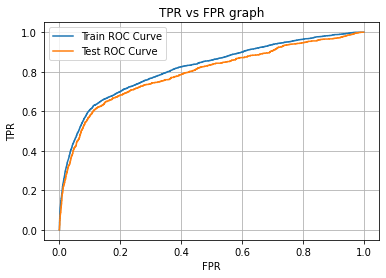

Train AUC Score 0.8179265553427536
Test AUC Score 0.7931101449899203


Train Confusion Matrix


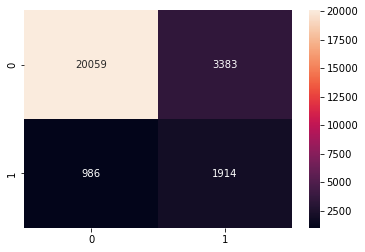


Test Cofusion Matrix


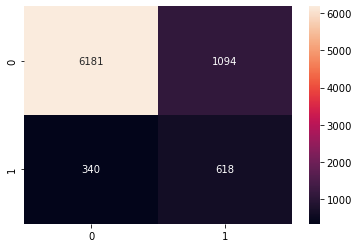

In [283]:
adaboost=AdaBoostClassifier(n_estimators=1000,random_state=42)
sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_dataset,test_dataset,y_train,y_test)

In [284]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_dataset), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_dataset), average='macro'))

Train F1-Score: 0.6478186179894485
Test F1-Score: 0.6392366552369025


In [285]:
"""this function takes the train dataset and tries to fit the categories and return the positve and negative probablity of each feature
This function is more like fit function that is present in sklearn count_vectoriser """
def response_encoding(feature,y_values):  
    #taking unique values from features and converting it into list.
    unique_values=np.unique(feature).tolist()
    
    y_values=pd.DataFrame(data=y_values)
    df=pd.DataFrame({'feature':feature.values.tolist(),'y_values':y_values.values.flatten().tolist()})
    negative={}
    positive={}
    for values in unique_values:
        count_positive=len(df[(df['feature']==values) & (df['y_values']==1)]) 
        count_negative=len(df[(df['feature']==values) & (df['y_values']==0)])
        negative[values]=count_negative/(count_negative+count_positive)
        positive[values]=count_positive/(count_negative+count_positive)
    return positive,negative

In [286]:
"""this function is used to transform our dataset based on our fit train dataset. If the category is present it will replace the it with
positive and negative probablity computed during fit function if category is not present it would it with 0.5 probablity for both
positive and negative."""
def transform_response_encoding(feature,positive,negative,y_test_values):
    unique_list=np.unique(feature).tolist()
   
    y_test_values=pd.DataFrame(data=y_test_values)
    dataframe=pd.DataFrame({'feature':feature.values.tolist(),'y_test_values':y_test_values.values.flatten().tolist()})
    
    negative_test={}
    positive_test={}
    for value in unique_list:
        #value which is not present in training data probablity values would be 0.5
        if value not in positive.keys() and negative.keys():
           
            negative_test[value]=0.5
            positive_test[value]=0.5
        else:
            negative_test[value]=negative[value]
            positive_test[value]=positive[value]
    return positive_test,negative_test

In [287]:
"""Creating the dataframe so as to store all the train cv and test response encoding"""
train_dataset=pd.DataFrame()
cv_dataset=pd.DataFrame()
test_dataset=pd.DataFrame()
print("Done...")

Done...


In [288]:
positive_values_train,negative_values_train=response_encoding(X_train['age_group'],y_train)

train_dataset['age_group_pos']=X_train['age_group'].map(positive_values_train)
train_dataset['age_group_neg']=X_train['age_group'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['age_group'],positive_values_train,negative_values_train,y_cv)
cv_dataset['age_group_pos']=X_cv['age_group'].map(positive_values_cv)
cv_dataset['age_group_neg']=X_cv['age_group'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['age_group'],positive_values_train,negative_values_train,y_test)
test_dataset['age_group_pos']=X_test['age_group'].map(positive_values)
test_dataset['age_group_neg']=X_test['age_group'].map(negative_values)
print(train_dataset['age_group_neg'].shape)
print(cv_dataset['age_group_neg'].shape)
print(test_dataset['age_group_neg'].shape)

(26342,)
(6586,)
(8233,)


In [289]:
positive_values_train,negative_values_train=response_encoding(X_train['job'],y_train)

train_dataset['job_pos']=X_train['job'].map(positive_values_train)
train_dataset['job_neg']=X_train['job'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['job'],positive_values_train,negative_values_train,y_cv)
cv_dataset['job_pos']=X_cv['job'].map(positive_values_cv)
cv_dataset['job_neg']=X_cv['job'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['job'],positive_values_train,negative_values_train,y_test)
test_dataset['job_pos']=X_test['job'].map(positive_values)
test_dataset['job_neg']=X_test['job'].map(negative_values)
print(train_dataset['job_neg'].shape)
print(cv_dataset['job_neg'].shape)
print(test_dataset['job_neg'].shape)

(26342,)
(6586,)
(8233,)


In [290]:
positive_values_train,negative_values_train=response_encoding(X_train['marital'],y_train)

train_dataset['marital_pos']=X_train['marital'].map(positive_values_train)
train_dataset['marital_neg']=X_train['marital'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['marital'],positive_values_train,negative_values_train,y_cv)
cv_dataset['marital_pos']=X_cv['marital'].map(positive_values_cv)
cv_dataset['marital_neg']=X_cv['marital'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['marital'],positive_values_train,negative_values_train,y_test)
test_dataset['marital_pos']=X_test['marital'].map(positive_values)
test_dataset['marital_neg']=X_test['marital'].map(positive_values)
print(train_dataset['marital_neg'].shape)
print(cv_dataset['marital_neg'].shape)
print(test_dataset['marital_neg'].shape)

(26342,)
(6586,)
(8233,)


In [291]:
positive_values_train,negative_values_train=response_encoding(X_train['education'],y_train)

train_dataset['education_pos']=X_train['education'].map(positive_values_train)
train_dataset['education_neg']=X_train['education'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['education'],positive_values_train,negative_values_train,y_cv)
cv_dataset['education_pos']=X_cv['education'].map(positive_values_cv)
cv_dataset['education_neg']=X_cv['education'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['education'],positive_values_train,negative_values_train,y_test)
test_dataset['education_pos']=X_test['education'].map(positive_values)
test_dataset['education_neg']=X_test['education'].map(negative_values)
print(train_dataset['education_neg'].shape)
print(cv_dataset['education_neg'].shape)
print(test_dataset['education_neg'].shape)

(26342,)
(6586,)
(8233,)


In [292]:
positive_values_train,negative_values_train=response_encoding(X_train['default'],y_train)

train_dataset['default_pos']=X_train['default'].map(positive_values_train)
train_dataset['default_neg']=X_train['default'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['default'],positive_values_train,negative_values_train,y_cv)
cv_dataset['default_pos']=X_cv['default'].map(positive_values_cv)
cv_dataset['default_neg']=X_cv['default'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['default'],positive_values_train,negative_values_train,y_test)
test_dataset['default_pos']=X_test['default'].map(positive_values)
test_dataset['default_neg']=X_test['default'].map(negative_values)
print(train_dataset['default_neg'].shape)
print(cv_dataset['default_neg'].shape)
print(test_dataset['default_neg'].shape)

(26342,)
(6586,)
(8233,)


In [293]:
positive_values_train,negative_values_train=response_encoding(X_train['i_loan'],y_train)

train_dataset['i_loan_pos']=X_train['i_loan'].map(positive_values_train)
train_dataset['i_loan_neg']=X_train['i_loan'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['i_loan'],positive_values_train,negative_values_train,y_cv)
cv_dataset['i_loan_pos']=X_cv['i_loan'].map(positive_values_cv)
cv_dataset['i_loan_neg']=X_cv['i_loan'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['i_loan'],positive_values_train,negative_values_train,y_test)
test_dataset['i_loan_pos']=X_test['i_loan'].map(positive_values)
test_dataset['i_loan_neg']=X_test['i_loan'].map(negative_values)
print(train_dataset['i_loan_neg'].shape)
print(cv_dataset['i_loan_neg'].shape)
print(test_dataset['i_loan_neg'].shape)

(26342,)
(6586,)
(8233,)


In [294]:
positive_values_train,negative_values_train=response_encoding(X_train['contact'],y_train)

train_dataset['contact_pos']=X_train['contact'].map(positive_values_train)
train_dataset['contact_neg']=X_train['contact'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['contact'],positive_values_train,negative_values_train,y_cv)
cv_dataset['contact_pos']=X_cv['contact'].map(positive_values_cv)
cv_dataset['contact_neg']=X_cv['contact'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['contact'],positive_values_train,negative_values_train,y_test)
test_dataset['contact_pos']=X_test['contact'].map(positive_values)
test_dataset['contact_neg']=X_test['contact'].map(negative_values)
print(train_dataset['contact_neg'].shape)
print(cv_dataset['contact_neg'].shape)
print(test_dataset['contact_neg'].shape)

(26342,)
(6586,)
(8233,)


In [295]:
positive_values_train,negative_values_train=response_encoding(X_train['month'],y_train)

train_dataset['month_pos']=X_train['month'].map(positive_values_train)
train_dataset['month_neg']=X_train['month'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['month'],positive_values_train,negative_values_train,y_cv)
cv_dataset['month_pos']=X_cv['month'].map(positive_values_cv)
cv_dataset['month_neg']=X_cv['month'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['month'],positive_values_train,negative_values_train,y_test)
test_dataset['month_pos']=X_test['month'].map(positive_values)
test_dataset['month_neg']=X_test['month'].map(negative_values)
print(train_dataset['month_neg'].shape)
print(cv_dataset['month_neg'].shape)
print(test_dataset['month_neg'].shape)

(26342,)
(6586,)
(8233,)


In [296]:
positive_values_train,negative_values_train=response_encoding(X_train['day_of_week'],y_train)

train_dataset['day_of_week_pos']=X_train['day_of_week'].map(positive_values_train)
train_dataset['day_of_week_neg']=X_train['day_of_week'].map(negative_values_train)

positive_values_cv,negative_values_cv=transform_response_encoding(X_cv['day_of_week'],positive_values_train,negative_values_train,y_cv)
cv_dataset['day_of_week_pos']=X_cv['day_of_week'].map(positive_values_cv)
cv_dataset['day_of_week_neg']=X_cv['day_of_week'].map(negative_values_cv)

positive_values,negative_values=transform_response_encoding(X_test['day_of_week'],positive_values_train,negative_values_train,y_test)
test_dataset['day_of_week_pos']=X_test['day_of_week'].map(positive_values)
test_dataset['day_of_week_neg']=X_test['day_of_week'].map(negative_values)
print(train_dataset['day_of_week_neg'].shape)
print(cv_dataset['day_of_week_neg'].shape)
print(test_dataset['day_of_week_neg'].shape)

(26342,)
(6586,)
(8233,)


In [297]:
train_duration=np.hstack((train_dataset.to_numpy(),train_duration,train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed))
print(train_duration.shape)
cv_duration=np.hstack((cv_dataset.to_numpy(),cv_duration,cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed))
print(cv_duration.shape)
test_duration=np.hstack((test_dataset.to_numpy(),test_duration,test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed))
print(test_duration.shape)

(26342, 26)
(6586, 26)
(8233, 26)


In [298]:
strategy=["uniform","prior","stratified","most_frequent"]
cv_auc=[]
for star in tq.tqdm(strategy):
    dummy_clf = DummyClassifier(strategy=star)
    
    sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")
    sig_clf.fit(train_duration, y_train)
    predict_y = sig_clf.predict_proba(cv_duration)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/4 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


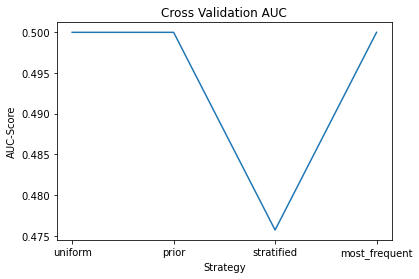

In [299]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(strategy,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Strategy")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


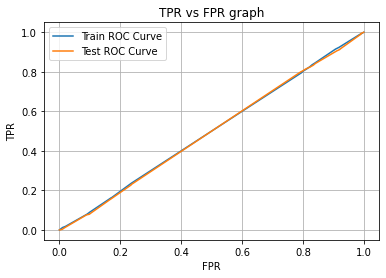

Train AUC Score 0.4993701623081472
Test AUC Score 0.4969959609438334


Train Confusion Matrix


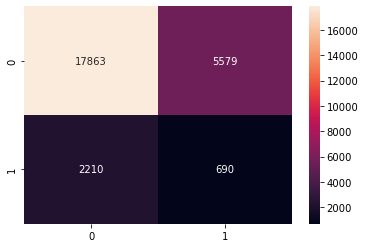


Test Cofusion Matrix


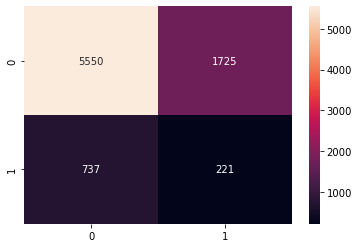

In [300]:
dummy_clf = DummyClassifier(strategy="stratified")
sig_clf = CalibratedClassifierCV(dummy_clf, method="sigmoid")

calculating_roc_auc_score(sig_clf,train_duration,test_duration,y_train,y_test)

In [301]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_duration), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_duration), average='macro'))

Train F1-Score: 0.47087417644223045
Test F1-Score: 0.4691127160175393


In [302]:
train=np.hstack((train_dataset.to_numpy(),train_campaign,train_previous,train_emp,train_cons_price,train_cons_conf,train_euribor,train_nr_employed))
print(train.shape)
cv=np.hstack((cv_dataset.to_numpy(),cv_campaign,cv_previous,cv_emp,cv_cons_price,cv_cons_conf,cv_euribor,cv_nr_employed))
print(cv.shape)
test=np.hstack((test_dataset.to_numpy(),test_campaign,test_previous,test_emp,test_cons_price,test_cons_conf,test_euribor,test_nr_employed))
print(test.shape)

(26342, 25)
(6586, 25)
(8233, 25)


In [303]:
neighbours=[k for k in range(1,23,2)]
cv_auc=[]
for k in tq.tqdm(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k)
   
    sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/11 [00:00<?, ?it/s]

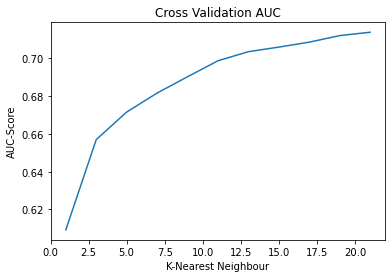

Best K  21


In [304]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(neighbours,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("K-Nearest Neighbour")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best K ",neighbours[index_of_best_auc])

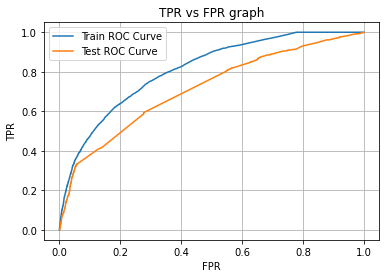

Train AUC Score 0.8095301536587735
Test AUC Score 0.7126309823587227


Train Confusion Matrix


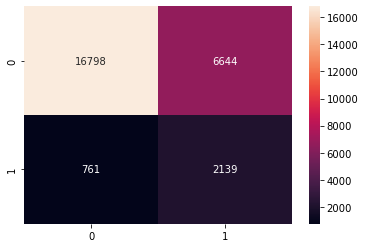


Test Cofusion Matrix


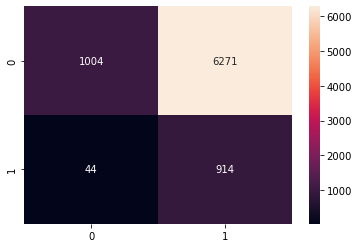

In [305]:
knn=KNeighborsClassifier(n_neighbors=21)

sig_clf = CalibratedClassifierCV(knn, method="sigmoid")
calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [306]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.5527202835088961
Test F1-Score: 0.516250409137468


In [307]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    lr=LogisticRegression(penalty='l2',C=value,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/9 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

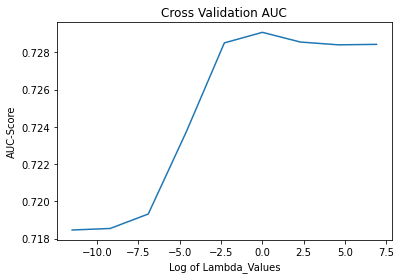

Best lambda 1


In [308]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

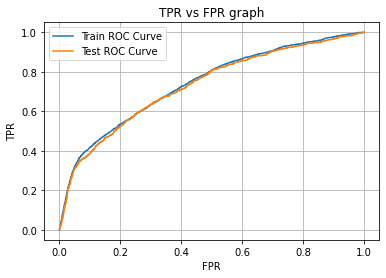

Train AUC Score 0.7387801367424811
Test AUC Score 0.7295523319630673


Train Confusion Matrix


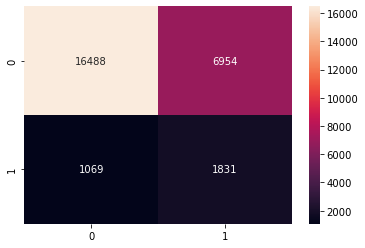


Test Cofusion Matrix


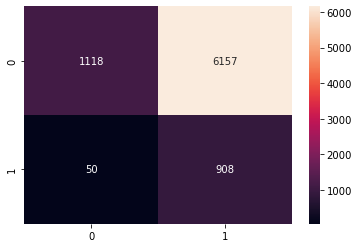

In [309]:
lr=LogisticRegression(penalty='l2',C=1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(lr, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [310]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.5408065509761479
Test F1-Score: 0.6320457623232598


In [311]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    log = SGDClassifier(loss='log',penalty='l2',alpha=value,class_weight='balanced')
 
    sig_clf = CalibratedClassifierCV(log, method="sigmoid")
    sig_clf.fit(train,y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/9 [00:00<?, ?it/s]

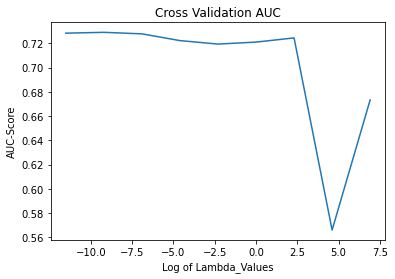

Best lambda 0.0001


In [312]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

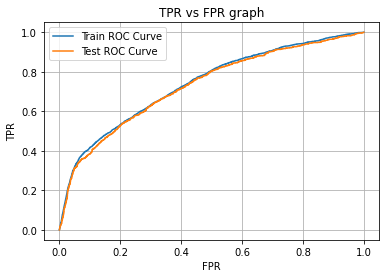

Train AUC Score 0.7385163308414899
Test AUC Score 0.7290492793548988


Train Confusion Matrix


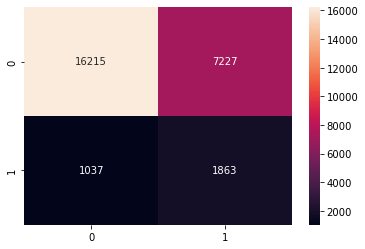


Test Cofusion Matrix


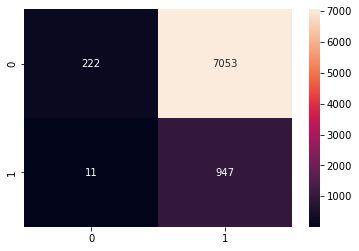

In [313]:
log=SGDClassifier(loss='log',penalty='l2',alpha=0.0001,class_weight='balanced')

sig_clf = CalibratedClassifierCV(log, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [314]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.5436324307527767
Test F1-Score: 0.6492721564076567


In [315]:
lambda_values=[10 ** lam for lam in range(-5,4)]
cv_auc=[]
for value in tq.tqdm(lambda_values):
    SVM = SGDClassifier(penalty='l2',alpha=value,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(train,y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/9 [00:00<?, ?it/s]

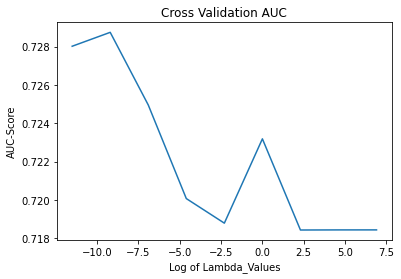

Best lambda 0.0001


In [317]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(np.log(lambda_values),cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Log of Lambda_Values")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best lambda",lambda_values[index_of_best_auc])

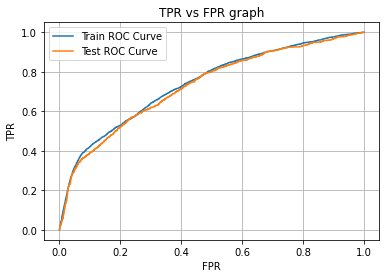

Train AUC Score 0.7391312307117494
Test AUC Score 0.7277714166828085


Train Confusion Matrix


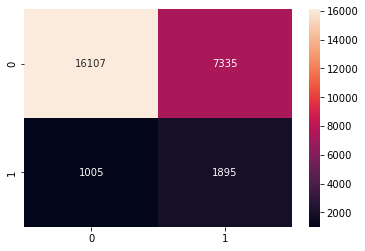


Test Cofusion Matrix


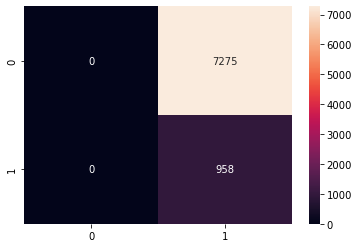

In [318]:
SVM=SGDClassifier(penalty='l2',alpha=1e-05,class_weight='balanced')

sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")

calculating_roc_auc_score(sig_clf,train,test,y_train,y_test)

In [319]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test), average='macro'))

Train F1-Score: 0.5344540999053402
Test F1-Score: 0.39771254855672244


In [320]:
train_r=np.hstack((train_dataset.to_numpy(),X_train['campaign'].to_numpy().reshape(len(X_train),1),X_train['previous'].to_numpy().reshape(len(X_train),1),X_train['emp.var.rate'].to_numpy().reshape(len(X_train),1),X_train['cons.price.idx'].to_numpy().reshape(len(X_train),1),X_train['cons.conf.idx'].to_numpy().reshape(len(X_train),1),X_train['euribor3m'].to_numpy().reshape(len(X_train),1),X_train['nr.employed'].to_numpy().reshape(len(X_train),1)))
print(train_r.shape)
cv_r=np.hstack((cv_dataset.to_numpy(),X_cv['campaign'].to_numpy().reshape(len(X_cv),1),X_cv['previous'].to_numpy().reshape(len(X_cv),1),X_cv['emp.var.rate'].to_numpy().reshape(len(X_cv),1),X_cv['cons.price.idx'].to_numpy().reshape(len(X_cv),1),X_cv['cons.conf.idx'].to_numpy().reshape(len(X_cv),1),X_cv['euribor3m'].to_numpy().reshape(len(X_cv),1),X_cv['nr.employed'].to_numpy().reshape(len(X_cv),1)))
print(cv_r.shape)
test_r=np.hstack((test_dataset.to_numpy(),X_test['campaign'].to_numpy().reshape(len(X_test),1),X_test['previous'].to_numpy().reshape(len(X_test),1),X_test['emp.var.rate'].to_numpy().reshape(len(X_test),1),X_test['cons.price.idx'].to_numpy().reshape(len(X_test),1),X_test['cons.conf.idx'].to_numpy().reshape(len(X_test),1),X_test['euribor3m'].to_numpy().reshape(len(X_test),1),X_test['nr.employed'].to_numpy().reshape(len(X_test),1)))
print(test_r.shape)

(26342, 25)
(6586, 25)
(8233, 25)


In [321]:
from sklearn.ensemble import RandomForestClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    random=RandomForestClassifier(n_estimators=estimator,random_state=42,n_jobs=-1,class_weight='balanced')

    sig_clf = CalibratedClassifierCV(random, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/8 [00:00<?, ?it/s]

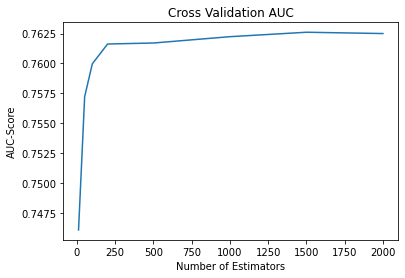

Best number of estimators 1500


In [322]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

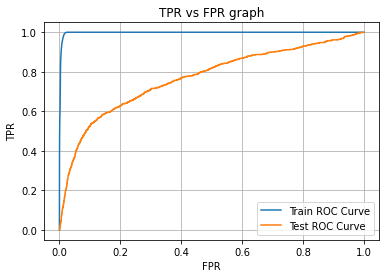

Train AUC Score 0.9977964396353142
Test AUC Score 0.7685782235327034


Train Confusion Matrix


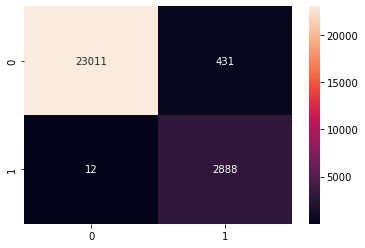


Test Cofusion Matrix


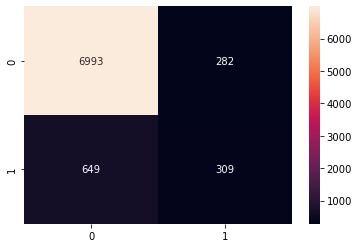

In [323]:
random=RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(random, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [324]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.8447036892632488
Test F1-Score: 0.5398088406899507


In [325]:
from xgboost  import XGBClassifier
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    xgboost=XGBClassifier(n_estimators=estimator,random_state=42,n_thread=-1,class_weight='balanced')
 
    sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/8 [00:00<?, ?it/s]

[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


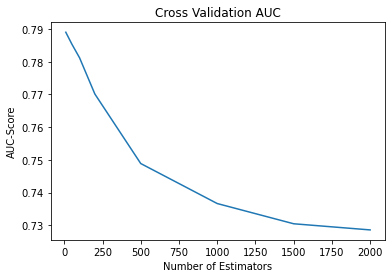

Best number of estimators 10


In [326]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

[21:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight", "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


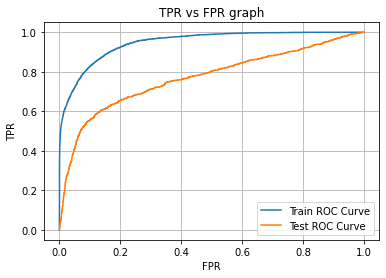

Train AUC Score 0.9478932449567384
Test AUC Score 0.7696636750389199


Train Confusion Matrix


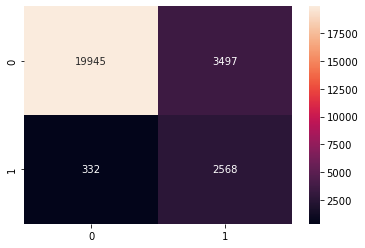


Test Cofusion Matrix


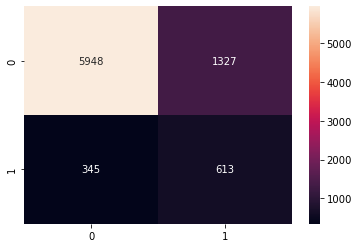

In [327]:
xgboost=XGBClassifier(n_estimators=200,random_state=42,n_thread=-1,class_weight='balanced')

sig_clf = CalibratedClassifierCV(xgboost, method="sigmoid")
calculating_roc_auc_score(sig_clf,train_r,test_r,y_train,y_test)

In [328]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.7615997069583728
Test F1-Score: 0.614833020879594


In [329]:
from joblib import dump, load
dump(sig_clf, 'bestmodel.joblib') 

['bestmodel.joblib']

In [334]:
import pic

['model.pkl']

In [330]:
number_of_estimators=[10,50,100,200,500,1000,1500,2000]
cv_auc=[]
for estimator in tq.tqdm(number_of_estimators):
    adaboost=AdaBoostClassifier(n_estimators=estimator,random_state=42)
    
    sig_clf = CalibratedClassifierCV(adaboost, method="sigmoid")
    sig_clf.fit(train_r,y_train)
    predict_y = sig_clf.predict_proba(cv_r)
    cv_auc.append(roc_auc_score(y_cv, predict_y[:,1]))

  0%|          | 0/8 [00:00<?, ?it/s]

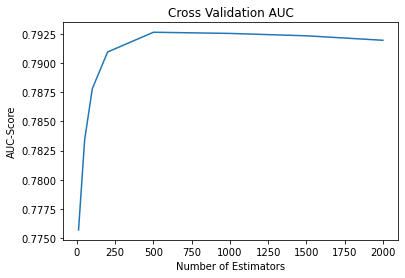

Best number of estimators 500


In [331]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

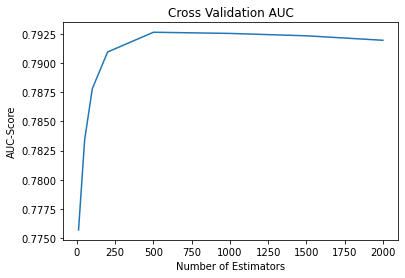

Best number of estimators 500


In [332]:
fig,ax=plt.pyplot.subplots()
plt.pyplot.plot(number_of_estimators,cv_auc)

plt.pyplot.title("Cross Validation AUC")
plt.pyplot.xlabel("Number of Estimators")
plt.pyplot.ylabel("AUC-Score")
plt.pyplot.show()
index_of_best_auc=np.argmax(cv_auc)
print("Best number of estimators",number_of_estimators[index_of_best_auc])

In [333]:
"""Printing F1-score"""
print("Train F1-Score:",f1_score(y_train, sig_clf.predict(train_r), average='macro'))
print("Test F1-Score:",f1_score(y_test, sig_clf.predict(test_r), average='macro'))

Train F1-Score: 0.6096749251845371
Test F1-Score: 0.6816887006216691
